 # Predict the power consumption of a building

## 1. Business Understanding

### 1.1 Project description

---

The aim of this project is to predict the power consumption and CO2 emissions of non-residential buildings in Seattle. The data was collected in 2015 and 2016 as part of Seattle's initiative to become a carbon-neutral city by 2050. Using regression and prediction methods, we'll forecast emissions for buildings that have not yet been measured. A secondary objective is to evaluate the significance of the ENERGYSTAR Score in predicting emissions.

---

### 1.2 Project objectives
---

* Develop a reliable machine learning model that accurately predicts the CO2 emissions and total energy consumption of non-residential buildings in Seattle, utilizing existing data while assessing the impact of the ENERGYSTAR Score, and optimizing the model's performance through systematic evaluation, cross-validation, and hyperparameter tuning.

---

## 2. Data Understanding

This snippet initializes the necessary Python libraries for data handling and visualization, then loads the 2015 and the 2016 building energy benchmarking dataset into a DataFrame and provides a quick preview of its top rows.

### 2.1. Importing data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

sns.set_style("whitegrid")


### 2.2. Data exploration

In [2]:
%matplotlib inline
data_2015 = pd.read_csv('./archive/2015-building-energy-benchmarking.csv')
data_2016 = pd.read_csv('./archive/2016-building-energy-benchmarking.csv')

Starting by exploring the dataset sizes for the years 2015 and 2016, to get a sense of the volume of data we are working with.

In [3]:
data_2015.shape

(3340, 47)

In [4]:
data_2016.shape

(3376, 46)

In [5]:
data_2015.dtypes

OSEBuildingID                                                      int64
DataYear                                                           int64
BuildingType                                                      object
PrimaryPropertyType                                               object
PropertyName                                                      object
TaxParcelIdentificationNumber                                     object
Location                                                          object
CouncilDistrictCode                                                int64
Neighborhood                                                      object
YearBuilt                                                          int64
NumberofBuildings                                                  int64
NumberofFloors                                                   float64
PropertyGFATotal                                                   int64
PropertyGFAParking                                 

In [6]:
data_2016.dtypes

OSEBuildingID                        int64
DataYear                             int64
BuildingType                        object
PrimaryPropertyType                 object
PropertyName                        object
Address                             object
City                                object
State                               object
ZipCode                            float64
TaxParcelIdentificationNumber       object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofBuildings                  float64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
ListOfAllPropertyUseTypes           object
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLarge

---

Result: The dataset blends numerical attributes (such as energy metrics classified as `float64`) with categorical features (`PrimaryPropertyType` designated as `object`), streamlining both quantitative evaluations of power consumption and CO2 emissions, and categorical breakdowns of building categories. Assessing `dtypes` is pivotal to confirm data accuracy and optimize regression modeling for the project's goals.

---

#### 2.2.1 Columns description

Now we want to get a glimpse of the data by viewing the first few rows of the datasets. '.head' provides a snapshot of what the data looks like, including column names and the type of data in each column.

In [7]:
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [8]:
data_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [9]:
# Calculate the total number of rows in the dataset
total_rows = len(data_2015)

# Count the number of rows with specified 'BuildingType' values
count = len(data_2015[data_2015['BuildingType'].isin(['NonResidential', 'Nonresidential COS', 'Nonresidential WA'])])

# Calculate the fraction of rows with the specified 'BuildingType' values
fraction = count / total_rows

print(f"The count of non residential 'BuildingType' rows is {count} out of {total_rows}, which is {fraction:.2%} of the total.")



The count of non residential 'BuildingType' rows is 1529 out of 3340, which is 45.78% of the total.


In [10]:
# Calculate the total number of rows in the dataset
total_rows = len(data_2016)

# Count the number of rows with specified 'BuildingType' values
count = len(data_2016[data_2016['BuildingType'].isin(['NonResidential', 'Nonresidential COS', 'Nonresidential WA'])])

# Calculate the fraction of rows with the specified 'BuildingType' values
fraction = count / total_rows

print(f"The count of specified 'BuildingType' rows is {count} out of {total_rows}, which is {fraction:.2%} of the total.")



The count of specified 'BuildingType' rows is 1546 out of 3376, which is 45.79% of the total.


---

**Conclusion**<BR>
The datasets provided pertain to buildings in Seattle for the years 2015 and 2016, encompassing a mix of residential and non-residential structures. In particular:

* For the year 2015, approximately 45.78% of the dataset (or 1529 out of 3340 entries) represent non-residential buildings.<br>
* For the year 2016, non-residential buildings constitute roughly 45.79% of the data, which translates to 1546 out of 3376 entries.<br>
* The datasets consist of 47 and 46 columns (features) respectively for the two years, encapsulating various attributes linked to the buildings.<br>

Upon delving deeper into the datasets, it becomes clear that certain columns exhibit a presence of NaN (missing) values. Columns such as ComplianceStatus, Outlier, Comment, and Seattle Police Department Micro Community Policing Plan Areas, in particular, display noticeable gaps in data. Given the objective of focusing on non-residential buildings, there may be a need to filter out the rows associated with other types of buildings to ensure a more precise and relevant analysis.
    
---

In [11]:
print("There is {} buildings for the year of 2015".format(data_2015["OSEBuildingID"].nunique()))
print("2015 Dataset:\n")
data_2015.head(6)

There is 3340 buildings for the year of 2015
2015 Dataset:



OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
0              1      2015      NonResidential               Hotel   
1              2      2015      NonResidential               Hotel   
2              3      2015      NonResidential               Hotel   
3              5      2015      NonResidential               Hotel   
4              8      2015      NonResidential               Hotel   
5              9      2015  Nonresidential COS               Other   

                     PropertyName TaxParcelIdentificationNumber  \
0            MAYFLOWER PARK HOTEL                     659000030   
1                 PARAMOUNT HOTEL                     659000220   
2                    WESTIN HOTEL                     659000475   
3                       HOTEL MAX                     659000640   
4           WARWICK SEATTLE HOTEL                     659000970   
5  WEST PRECINCT (SEATTLE POLICE)                     660000560   

                                            Location  CouncilDistrictCode  \
0  {'latitude': '47.61219025', 'longitude': '-122...                    7   
1  {'latitude': '47.61310583', 'longitude': '-122...                    7   
2  {'latitude': '47.61334897', 'longitude': '-122...                    7   
3  {'latitude': '47.61421585', 'longitude': '-122...                    7   
4  {'latitude': '47.6137544', 'longitude': '-122....                    7   
5  {'latitude': '47.6164389', 'longitude': '-122....                    7   

  Neighborhood  YearBuilt  ...  GHGEmissionsIntensity(kgCO2e/ft2)  \
0     DOWNTOWN       1927  ...                               2.64   
1     DOWNTOWN       1996  ...                               2.38   
2     DOWNTOWN       1969  ...                               1.92   
3     DOWNTOWN       1926  ...                              31.38   
4     DOWNTOWN       1980  ...                               4.02   
5     DOWNTOWN       1999  ...                               2.81   

   DefaultData  Comment  ComplianceStatus       Outlier 2010 Census Tracts  \
0           No      NaN         Compliant           NaN                NaN   
1           No      NaN         Compliant           NaN                NaN   
2          Yes      NaN         Compliant           NaN                NaN   
3           No      NaN         Compliant  High Outlier                NaN   
4           No      NaN         Compliant           NaN                NaN   
5           No      NaN         Compliant           NaN                NaN   

  Seattle Police Department Micro Community Policing Plan Areas  \
0                                               14.0              
1                                               14.0              
2                                               56.0              
3                                               56.0              
4                                               56.0              
5                                               56.0              

   City Council Districts SPD Beats  Zip Codes  
0                     NaN      31.0      18081  
1                     NaN      31.0      18081  
2                     NaN      31.0      18081  
3                     NaN      31.0      18081  
4                     NaN      31.0      19576  
5                     NaN       7.0      19576  

[6 rows x 47 columns]

In [12]:
print("There is {} buildings for the year of 2016".format(data_2016["OSEBuildingID"].nunique()))
print("\n2016 Dataset:\n")
data_2016.head()

There is 3376 buildings for the year of 2016

2016 Dataset:



OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  ...  Electricity(kWh) Electricity(kBtu)  \
0                    0659000030  ...      1.156514e+06         3946027.0   
1                    0659000220  ...      9.504252e+05         3242851.0   
2                    0659000475  ...      1.451544e+07        49526664.0   
3                    0659000640  ...      8.115253e+05         2768924.0   
4                    0659000970  ...      1.573449e+06         5368607.0   

   NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  Comments  \
0         12764.52930         1276453.0        False       NaN   
1         51450.81641         5145082.0        False       NaN   
2         14938.00000         1493800.0        False       NaN   
3         18112.13086         1811213.0        False       NaN   
4         88039.98438         8803998.0        False       NaN   

   ComplianceStatus  Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
0         Compliant      NaN             249.98                   2.83  
1         Compliant      NaN             295.86                   2.86  
2         Compliant      NaN            2089.28                   2.19  
3         Compliant      NaN             286.43                   4.67  
4         Compliant      NaN             505.01                   2.88  

[5 rows x 46 columns]

In [13]:
print(data_2015.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [14]:
print(data_2016.columns)

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

---

**Columns Description**:

1-**OSEBuildingID**: Unique identifier for each building.<br>

2-**DataYear**: The year of the dataset, in this case, 2015.<br>

3-**BuildingType**: Indicates if the building is nonresidential or of some other type.<br>

4-**PrimaryPropertyType**: Gives more specific data on building type, such as hotel, motel, etc.'.<br>

5-**Property Address**: The data includes the name (PropertyName), address, city, state, and ZIP code of the properties.<br>

6-**PropertyName**: Name of the property or building.<br>

7-**TaxParcelIdentificationNumber**: Unique tax parcel ID for each building.<br>

8-**Electricity(kBtu)**:Represents the amount of energy consumed by the property in kilo British Thermal Units (kBTU) from
electricity.<br>

9-**NaturalGas(Therms)** and **NaturalGas(kBtu)**: Show the consumption of natural gas in both Therms and kBTU.<br>

10-**GHGEmissionsIntensity(kgCO2e/ft2)**: Intensity of GHG emissions per square foot.<br>

11-**GHGEmissionsIntensity**: Greenhouse gas emission intensity for each property.<br>

12-**ComplianceStatus**: Indicates if the building is compliant with certain standards or regulations.<br>

13-**Outlier**: Indicates if the given building is an outlier in terms of energy consumption or emissions.<br>

14-**Location**: A dictionary containing the latitude and longitude coordinates of the building.<br>

15-**Neighborhood**: Specifies which neighborhood or area the building is located in.<br>

16-**CouncilDistrictCode**: Code to represent the district in which the building is located.<br>

17-**DefaultData**: A boolean column, possibly indicating whether the provided data is a default value or was actually
measured.<br>

18-**Comment**: Any additional comments or notes about the building.<br>

19-**TotalGHGEmissions**: Total greenhouse gas emissions from the building.<br>

20-**Seattle Police Department Micro Community Policing Plan Areas**: Represents specific policing areas and their codes.<br>

21-**City Council Districts**: The district in which the building is located.<br>

22-**SPD Beats**: Represents specific police beats or areas.<br>

23-**Zip Codes**: Zip code where the building is located.<br>

24-**NumberofBuildings**:The total number of buildings on the property.<br>

25-**NumberofFloors**: The total number of floors in the primary building on the property.<br>

26-**PropertyGFATotal**: The total gross floor area of the property.<br>

27-**PropertyGFAParking**:The gross floor area dedicated to parking.<br>

28-**PropertyGFABuilding(s)**: The gross floor area of the buildings.<br>

29-**ListOfAllPropertyUseTypes**:A list of all types of use the property has.<br>

30-**LargestPropertyUseType**:The primary use type that occupies the most gross floor area.<br>

31-**LargestPropertyUseTypeGFA** :The gross floor area occupied by the largest property use type.

32-**SecondLargestPropertyUseType**: The property use type that occupies the second-largest gross floor area on the property.

33-**SecondLargestPropertyUseTypeGFA**: The gross floor area associated with the second-largest property use type.

34-**ThirdLargestPropertyUseType**: The property use type that occupies the third-largest gross floor area on the property.

35-**ThirdLargestPropertyUseTypeGFA**: The gross floor area associated with the third-largest property use type.

36-**YearsENERGYSTARCertified**: The number of years the building has been certified as ENERGY STAR compliant.

37-**ENERGYSTARScore**: A score that reflects the energy efficiency of a building based on the ENERGY STAR guidelines.

38-**SiteEUI(kBtu/sf)**: The Energy Use Intensity of the property, measured as the amount of energy per square foot per year.

39-**SiteEUIWN(kBtu/sf)**: Weather-normalized Energy Use Intensity, which accounts for variations in weather between years.

40-**SourceEUI(kBtu/sf)**: The total amount of raw energy required to operate the building, including energy losses from generation and transmission.

41-**SourceEUIWN(kBtu/sf)**: Weather-normalized Source Energy Use Intensity.

42-**SiteEnergyUse(kBtu)**: The total amount of energy consumed by the property, measured in thousands of British Thermal Units.

43-**SiteEnergyUseWN(kBtu)**: Weather-normalized total site energy use.

44-**SteamUse(kBtu)**: The amount of steam used by the property, measured in thousands of British Thermal Units.

45-**Electricity(kWh)**: The total electricity consumption of the property, measured in kilowatt-hours.

46-**Electricity(kBtu)**: The total electricity consumption of the property, converted to thousands of British Thermal Units.

47-**NaturalGas(therms)**: The consumption of natural gas by the property, measured in therms.

48-**NaturalGas(kBtu)**: The consumption of natural gas by the property, converted to thousands of British Thermal Units.

49-**OtherFuelUse(kBtu)**: The amount of energy consumed from fuels other than electricity and natural gas, measured in thousands of British Thermal Units.

50-**DefaultData**: Indicates whether the data presented is based on actual measurements or default values.

51-**Comments**: Additional remarks or observations regarding the data or property.

52-**ComplianceStatus**: The compliance state of the property with regard to energy and emissions standards or regulations.

53-**Outlier**: Designation for any data points or buildings that stand out from the norm due to their energy use, size, or other factors.

54-**Latitude**: The geographical latitude coordinate of the property.

55-**Longitude**: The geographical longitude coordinate of the property.

56-**City**: The city in which the property is located.

57-**State**: The state in which the property is located.

58-**ZipCode**: The ZIP code for the property's location.

59-**Address**: The street address of the property.

60-**YearBuilt**: The year in which the primary

---

---

**Conclusion** <BR>
Upon examining the columns of the 2015 and 2016 datasets, it's evident that they share similar structures and feature sets. This uniformity is beneficial as it ensures consistency in analysis and allows for potential data merging or comparative studies without significant preprocessing. As we delve deeper into our research objectives, specifically around forecasting CO2 emissions and evaluating the significance of the ENERGYSTARScore, the similarity between these datasets will facilitate a more streamlined analytical process.
    
 ---   

**Displaying columns that are not common to both years.**

In [15]:
[col for col in data_2015 if col not in data_2016]


['Location',
 'OtherFuelUse(kBtu)',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Comment',
 '2010 Census Tracts',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'City Council Districts',
 'SPD Beats',
 'Zip Codes']

-> These are the list of columns present in 2015 and not in 2016

In [16]:
[col for col in data_2016 if col not in data_2015]


['Address',
 'City',
 'State',
 'ZipCode',
 'Latitude',
 'Longitude',
 'Comments',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

-> These are the list of columns present in 2016 and not in 2015

---
**Conclusion**

The datasets for 2015 and 2016 exhibit distinct columns. While 2015 includes columns related to location and policing areas, 2016 introduces geographical details like address and coordinates. Such disparities emphasize the necessity for meticulous preprocessing before merging or comparison.

---

In [17]:
data_2016[['Latitude', 'Longitude']]


Latitude  Longitude
0     47.61220 -122.33799
1     47.61317 -122.33393
2     47.61393 -122.33810
3     47.61412 -122.33664
4     47.61375 -122.34047
...        ...        ...
3371  47.56722 -122.31154
3372  47.59625 -122.32283
3373  47.63644 -122.35784
3374  47.52832 -122.32431
3375  47.53939 -122.29536

[3376 rows x 2 columns]

In [18]:
data_2015["Location"]

0       {'latitude': '47.61219025', 'longitude': '-122...
1       {'latitude': '47.61310583', 'longitude': '-122...
2       {'latitude': '47.61334897', 'longitude': '-122...
3       {'latitude': '47.61421585', 'longitude': '-122...
4       {'latitude': '47.6137544', 'longitude': '-122....
                              ...                        
3335    {'latitude': '47.59950256', 'longitude': '-122...
3336    {'latitude': '47.65752471', 'longitude': '-122...
3337    {'latitude': '47.61649845', 'longitude': '-122...
3338    {'latitude': '47.68396954', 'longitude': '-122...
3339    {'latitude': '47.68396954', 'longitude': '-122...
Name: Location, Length: 3340, dtype: object

---
**Result**<br>
In the `data_2016` dataset, the latitude and longitude of buildings are represented in separate columns, `Latitude` and `Longitude`. However, in the `data_2015` dataset, these coordinates are combined in a single column named `Location`, formatted as a string containing both 'latitude' and 'longitude' values. For consistent data preparation and analysis, it would be beneficial to transform the `Location` column in the `data_2015` dataset, splitting it into separate `Latitude` and `Longitude` columns to match the format of the `data_2016` dataset.

---

**Displaying columns that are common to both years.**

In [19]:
common_columns = [col for col in data_2016 if col in data_2015]
num_common_columns = len(common_columns)
print(f'Number of common columns: {num_common_columns}')
print("--------------------------------------")
common_columns

Number of common columns: 37
--------------------------------------


['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'DefaultData',
 'ComplianceStatus',
 'Outlier']

**Identifying Buildings Unique to the 2015 Survey**

In [20]:
# Get buildings from the 2015 dataset whose 'OSEBuildingID' is not in the 2016 dataset
OSEBuildingID = [OSEBuildingID for OSEBuildingID in data_2015["OSEBuildingID"] if OSEBuildingID not in data_2016["OSEBuildingID"].values]

# Print the number of buildings in the 2015 dataset that don't exist in the 2016 dataset
print("For the 2015 survey: There are {} buildings that do not exist in the 2016 survey".format(len(OSEBuildingID)))

For the 2015 survey: There are 56 buildings that do not exist in the 2016 survey


---

The analysis identifies buildings that were surveyed in 2015 but not in 2016. Specifically, there are 56 buildings from the 2015 dataset that were not included in the 2016 survey.

---

**Calculate Percentage of Missing Values for Each Column:**

In [21]:
missing_percentage = data_2015.isnull().sum() / len(data_2015) * 100
missing_data = pd.DataFrame({'Column': missing_percentage.index, 'Missing Percentage': missing_percentage.values})
print(missing_data.sort_values(by='Missing Percentage', ascending=False))


                                               Column  Missing Percentage
39                                            Comment           99.610778
41                                            Outlier           97.485030
22                           YearsENERGYSTARCertified           96.706587
44                             City Council Districts           93.622754
42                                 2010 Census Tracts           93.293413
21                     ThirdLargestPropertyUseTypeGFA           83.233533
20                        ThirdLargestPropertyUseType           83.233533
19                    SecondLargestPropertyUseTypeGFA           53.323353
18                       SecondLargestPropertyUseType           53.323353
23                                    ENERGYSTARScore           23.353293
17                          LargestPropertyUseTypeGFA            4.071856
16                             LargestPropertyUseType            4.071856
15                          ListOfAllP

---
Columns with over 80% missing data:['YearsENERGYSTARCertified', 'City Council Districts', 'ThirdLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA'] <br>
Consideration may be given to removing these columns in subsequent steps due to their substantial missing data.

---

**Conclusion**<br>
The analysis of missing values in the dataset reveals that some columns have significant portions of their data missing:

* Comments has the highest missing percentage with approximately 99.81% of its values absent.
* YearsENERGYSTARCertified and City Council Districts follow next with missing percentages around 95.49% and 93.26%, respectively.
* Other columns like ThirdLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, and SecondLargestPropertyUseType have missing data around the range of 33-35%.
* Many columns have 0% missing values, implying they are fully populated.

In [22]:
missing_percentage = data_2016.isnull().sum() / len(data_2015) * 100
missing_data = pd.DataFrame({'Column': missing_percentage.index, 'Missing Percentage': missing_percentage.values})
print(missing_data.sort_values(by='Missing Percentage', ascending=False))

                             Column  Missing Percentage
41                         Comments          101.077844
43                          Outlier          100.119760
27         YearsENERGYSTARCertified           97.514970
25      ThirdLargestPropertyUseType           83.233533
26   ThirdLargestPropertyUseTypeGFA           83.233533
23     SecondLargestPropertyUseType           50.808383
24  SecondLargestPropertyUseTypeGFA           50.808383
28                  ENERGYSTARScore           25.239521
22        LargestPropertyUseTypeGFA            0.598802
21           LargestPropertyUseType            0.598802
8                           ZipCode            0.479042
20        ListOfAllPropertyUseTypes            0.269461
32             SourceEUIWN(kBtu/sf)            0.269461
31               SourceEUI(kBtu/sf)            0.269461
36                 Electricity(kWh)            0.269461
37                Electricity(kBtu)            0.269461
38               NaturalGas(therms)            0

---
Columns having more than 80% of null values may be considered for removal in later stages due to their high missing value count.

---

In the next step we will see how many null columns we have in the 2015 dataset

In [23]:
# Calculate columns with null values for the 2015 dataset
null_columns_2015 = data_2015.isnull().sum()
null_columns_2015 = null_columns_2015[null_columns_2015 > 0]
# Display results
print("2015 Dataset: Columns with Null Values")
print("--------------------------------------")
print(null_columns_2015)

2015 Dataset: Columns with Null Values
--------------------------------------
TaxParcelIdentificationNumber                                       2
NumberofFloors                                                      8
ListOfAllPropertyUseTypes                                         127
LargestPropertyUseType                                            136
LargestPropertyUseTypeGFA                                         136
SecondLargestPropertyUseType                                     1781
SecondLargestPropertyUseTypeGFA                                  1781
ThirdLargestPropertyUseType                                      2780
ThirdLargestPropertyUseTypeGFA                                   2780
YearsENERGYSTARCertified                                         3230
ENERGYSTARScore                                                   780
SiteEUI(kBtu/sf)                                                   10
SiteEUIWN(kBtu/sf)                                                 10
SourceEUI(kB

Result: In the provided dataset, most columns are adequately populated, but some exhibit considerable missing values. Notably, columns `SecondLargestPropertyUseType`, `ThirdLargestPropertyUseType`, `YearsENERGYSTARCertified`, and `ENERGYSTARScore` stand out with 1781, 2780, 3230, and 780 missing values respectively. Addressing these gaps is essential for a robust analysis, especially when aiming for precise predictions related to power consumption and CO2 emissions.

In [24]:
# Calculate columns with null values for the 2016 dataset
null_columns_2016 = data_2016.isnull().sum()
null_columns_2016 = null_columns_2016[null_columns_2016 > 0]
# Display results
print("2016 Dataset: Columns with Null Values")
print("--------------------------------------")
print(null_columns_2016)

2016 Dataset: Columns with Null Values
--------------------------------------
ZipCode                              16
NumberofBuildings                     8
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697
ThirdLargestPropertyUseType        2780
ThirdLargestPropertyUseTypeGFA     2780
YearsENERGYSTARCertified           3257
ENERGYSTARScore                     843
SiteEUI(kBtu/sf)                      7
SiteEUIWN(kBtu/sf)                    6
SourceEUI(kBtu/sf)                    9
SourceEUIWN(kBtu/sf)                  9
SiteEnergyUse(kBtu)                   5
SiteEnergyUseWN(kBtu)                 6
SteamUse(kBtu)                        9
Electricity(kWh)                      9
Electricity(kBtu)                     9
NaturalGas(therms)                    9
NaturalGas(kBtu)                      9
Comments                           3376
Ou

Result: In the 2016 dataset, while many columns seem to have been well-maintained, certain columns have significant gaps in their data. Specifically, the columns SecondLargestPropertyUseType and ThirdLargestPropertyUseType have a notable number of missing entries, with 1697 and 2780 null values, respectively. Additionally, the YearsENERGYSTARCertified column is missing 3257 entries, and the ENERGYSTARScore is devoid of 843 data points. These gaps could be critical, especially when conducting in-depth analyses or predictions pertaining to energy consumption and greenhouse gas emissions. Further columns like Comments and Outlier have 3376 and 3344 missing values respectively, suggesting they may not have been a primary focus during data collection. Addressing and potentially filling these missing values would be paramount for ensuring the dataset's reliability and comprehensiveness in any subsequent analysis.

In [25]:
# Assuming 'GHGEmissions(MetricTonsCO2e)' and 'SiteEnergyUse(kBtu)' are the target columns
# Calculate the correlation matrix
correlation_matrix = data_2015.corr()

# Get correlations of all features with the target columns
co2_corr = correlation_matrix['GHGEmissions(MetricTonsCO2e)'].sort_values(ascending=False)
energy_corr = correlation_matrix['SiteEnergyUse(kBtu)'].sort_values(ascending=False)

print("Correlation with CO2 Emissions:\n", co2_corr, "\n")
print("Correlation with Site Energy Use:\n", energy_corr)

# Based on this, you can decide which columns are significant.
# Columns with correlation values closer to 0 might be less relevant, but it's not a definitive metric to drop them.


Correlation with CO2 Emissions:
 GHGEmissions(MetricTonsCO2e)                                     1.000000
SiteEnergyUseWN(kBtu)                                            0.896825
SiteEnergyUse(kBtu)                                              0.890748
SteamUse(kBtu)                                                   0.759186
Electricity(kBtu)                                                0.692973
Electricity(kWh)                                                 0.692973
NaturalGas(kBtu)                                                 0.679878
NaturalGas(therms)                                               0.679878
LargestPropertyUseTypeGFA                                        0.583793
PropertyGFABuilding(s)                                           0.553595
PropertyGFATotal                                                 0.518440
SecondLargestPropertyUseTypeGFA                                  0.488924
GHGEmissionsIntensity(kgCO2e/ft2)                                0.411265
SiteE

C:\Users\Ines Ayari\AppData\Local\Temp\ipykernel_4020\3612057982.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_2015.corr()


**Correlation Analysis Summary**:

* GHGEmissions(MetricTonsCO2e):

-Strongly correlated with energy consumption metrics like SiteEnergyUse(kBtu) and Electricity(kWh).<br>
-Moderate correlation with property type areas and ENERGYSTARScore.<br>
-Low correlation with features like DefaultData and CouncilDistrictCode.<br>

* SiteEnergyUse(kBtu):

-Strong correlation with GHGEmissions(MetricTonsCO2e) and other energy-related columns.<br>
-Moderate correlation with property areas and ENERGYSTARScore.<br>
-Low correlation with CouncilDistrictCode and YearBuilt.<br>
=>Energy consumption metrics are key indicators for both GHG emissions and site energy use. Low correlation columns might be less impactful for the analysis.

In [26]:
# Assuming 'GHGEmissions(MetricTonsCO2e)' and 'SiteEnergyUse(kBtu)' are your target columns
# Calculate the correlation matrix
correlation_matrix = data_2016.corr()

# Get correlations of all features with the target columns
co2_corr = correlation_matrix['TotalGHGEmissions'].sort_values(ascending=False)
energy_corr = correlation_matrix['SiteEnergyUse(kBtu)'].sort_values(ascending=False)

print("Correlation with CO2 Emissions:\n", co2_corr, "\n")
print("Correlation with Site Energy Use:\n", energy_corr)

# Based on this, you can decide which columns are significant.
# Columns with correlation values closer to 0 might be less relevant, but it's not a definitive metric to drop them.

Correlation with CO2 Emissions:
 TotalGHGEmissions                  1.000000
SiteEnergyUse(kBtu)                0.862668
SiteEnergyUseWN(kBtu)              0.859042
NaturalGas(therms)                 0.732294
NaturalGas(kBtu)                   0.732294
Electricity(kWh)                   0.691111
Electricity(kBtu)                  0.691111
SteamUse(kBtu)                     0.683254
ThirdLargestPropertyUseTypeGFA     0.677722
LargestPropertyUseTypeGFA          0.578487
PropertyGFABuilding(s)             0.545503
PropertyGFATotal                   0.531436
SecondLargestPropertyUseTypeGFA    0.506537
GHGEmissionsIntensity              0.470212
NumberofBuildings                  0.405261
SiteEUI(kBtu/sf)                   0.286608
SiteEUIWN(kBtu/sf)                 0.274616
SourceEUI(kBtu/sf)                 0.230243
SourceEUIWN(kBtu/sf)               0.216232
NumberofFloors                     0.136014
PropertyGFAParking                 0.088625
Longitude                          0.037411

C:\Users\Ines Ayari\AppData\Local\Temp\ipykernel_4020\1328063165.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_2016.corr()


**Correlation Analysis Summary:**

- Correlation with CO2 Emissions:

Strong positive correlations: SiteEnergyUse(kBtu), NaturalGas, Electricity, and SteamUse.
Significant positive links: Area measurements like ThirdLargestPropertyUseTypeGFA.
Negative correlation: ENERGYSTARScore.

- Correlation with Site Energy Use:

High positive correlations: Electricity(kWh) and TotalGHGEmissions.
Strong positive links: Building size metrics like LargestPropertyUseTypeGFA.
Negative correlation: ENERGYSTARScore.
Overall, energy sources and building size are key influencers for emissions and energy consumption.

In [27]:
# 1. Check Unique Values
unique_counts = data_2015.nunique()
single_unique = unique_counts[unique_counts == 1].index.tolist()
print(f"Columns with a single unique value: {single_unique}")

Columns with a single unique value: ['DataYear']


In [28]:
unique_counts = data_2016.nunique()
single_unique = unique_counts[unique_counts == 1].index.tolist()
print(f"Columns with a single unique value: {single_unique}")

Columns with a single unique value: ['DataYear', 'City', 'State']


**Result**:<br>
Columns with only one unique value can be dropped since they won't be helpful in predictive modeling. In the 2015 dataset we have DataYear and in 2016 we have DataYear, City and State with a single unique value that might not be helpful.

In [29]:
# 2. Check Variance
numeric_data = data_2015.select_dtypes(include=['float64', 'int64'])
low_variance_cols = numeric_data.columns[numeric_data.var() < 0.01]  
print(f"Columns with low variance: {low_variance_cols.tolist()}")

Columns with low variance: ['DataYear']


In [30]:
numeric_data = data_2016.select_dtypes(include=['float64', 'int64'])
low_variance_cols = numeric_data.columns[numeric_data.var() < 0.01]  
print(f"Columns with low variance: {low_variance_cols.tolist()}")

Columns with low variance: ['DataYear', 'Latitude', 'Longitude']


**Result**:<br>
Columns with very low variance might not be that useful.

In [31]:
# 3. Revisit Correlation
corr_with_targets = data_2015.corr()[['GHGEmissions(MetricTonsCO2e)', 'SiteEnergyUse(kBtu)']]
low_corr_cols = corr_with_targets[(corr_with_targets['GHGEmissions(MetricTonsCO2e)'].abs() < 0.1) & (corr_with_targets['SiteEnergyUse(kBtu)'].abs() < 0.1)].index.tolist()
print(f"Columns with low correlation with both targets: {low_corr_cols}")

Columns with low correlation with both targets: ['CouncilDistrictCode', 'YearBuilt', 'ENERGYSTARScore', 'OtherFuelUse(kBtu)', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats', 'Zip Codes']


C:\Users\Ines Ayari\AppData\Local\Temp\ipykernel_4020\3627342148.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_targets = data_2015.corr()[['GHGEmissions(MetricTonsCO2e)', 'SiteEnergyUse(kBtu)']]


In [32]:
corr_with_targets = data_2016.corr()[['TotalGHGEmissions', 'SiteEnergyUse(kBtu)']]
low_corr_cols = corr_with_targets[(corr_with_targets['TotalGHGEmissions'].abs() < 0.1) & (corr_with_targets['SiteEnergyUse(kBtu)'].abs() < 0.1)].index.tolist()
print(f"Columns with low correlation with both targets: {low_corr_cols}")

Columns with low correlation with both targets: ['ZipCode', 'CouncilDistrictCode', 'Latitude', 'Longitude', 'YearBuilt', 'DefaultData']


C:\Users\Ines Ayari\AppData\Local\Temp\ipykernel_4020\1159079354.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_with_targets = data_2016.corr()[['TotalGHGEmissions', 'SiteEnergyUse(kBtu)']]


**Result**:<br>
Columns like 'CouncilDistrictCode', 'YearBuilt', 'ENERGYSTARScore', 'OtherFuelUse(kBtu)', '2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats', 'Zip Codes', 'Zip Code', 'Latitude', 'Longitude', 'DefaultData' have low correlation with 'GHGEmissions(MetricTonsCO2e)/TotalGHGEmissions' and 'SiteEnergyUse(kBtu)'

C:\Users\Ines Ayari\AppData\Local\Temp\ipykernel_4020\1761753364.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_2015.corr()


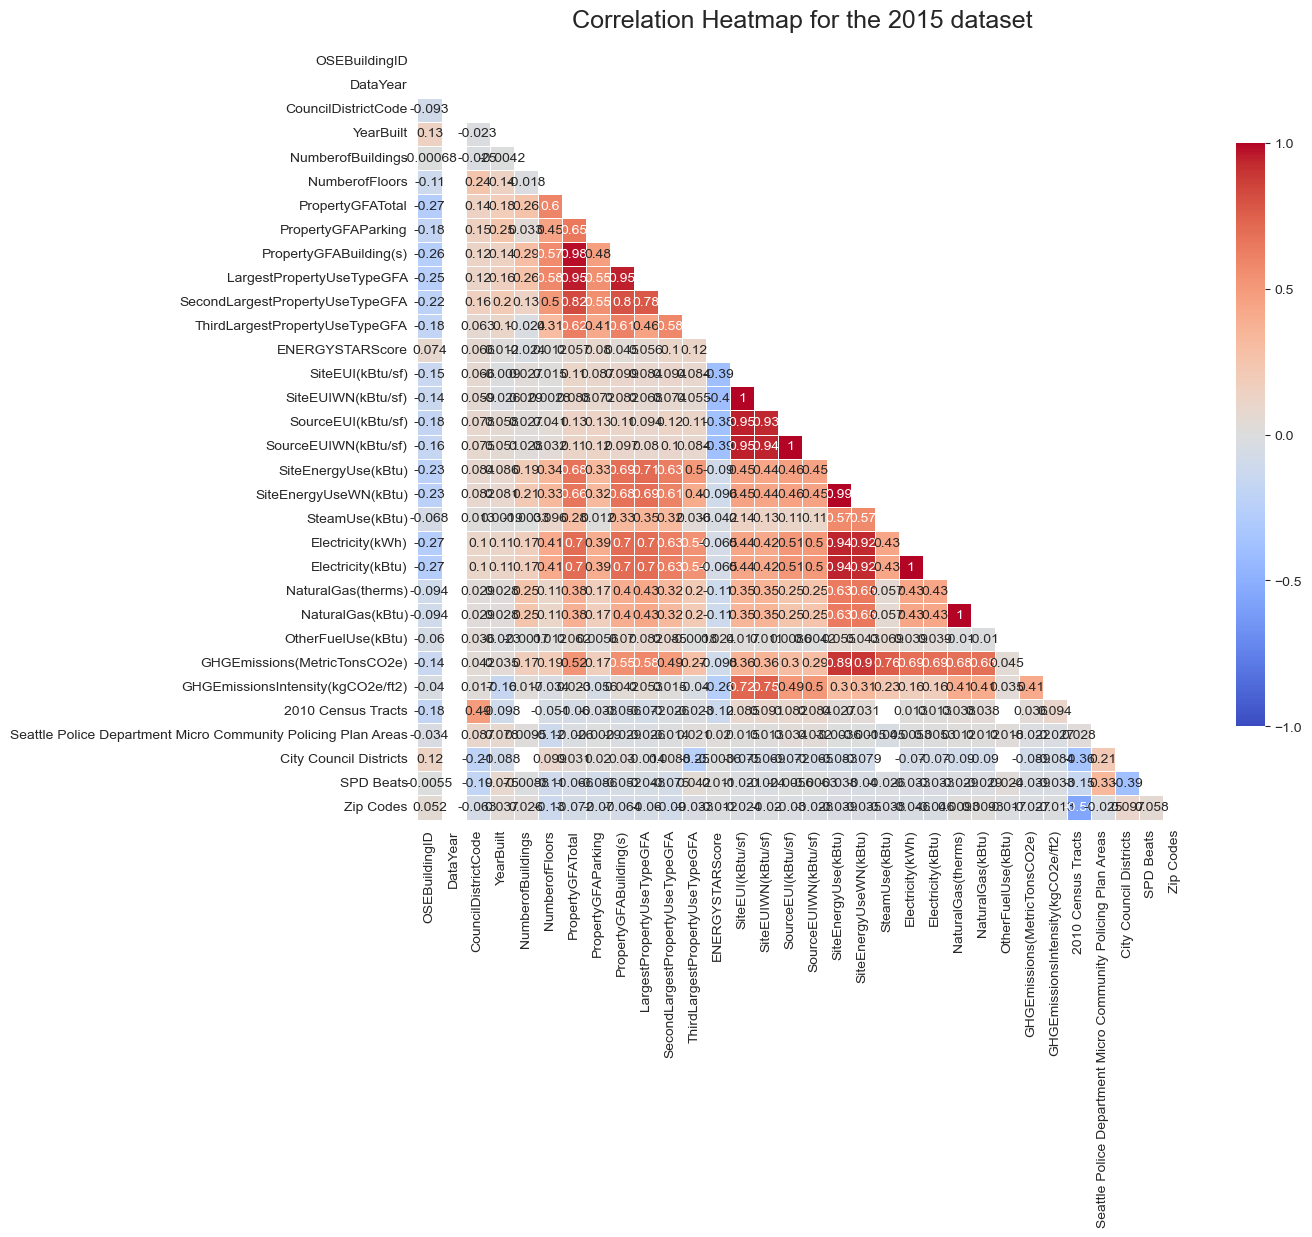

In [33]:
# Compute the correlation matrix
corr = data_2015.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the seaborn heatmap parameters
sns.set_style("white")
heatmap = sns.heatmap(
    corr, 
    mask=mask,
    vmin=-1, vmax=1, 
    annot=True, 
    annot_kws={"size": 10}, # Font size of the annotations
    cmap='coolwarm', 
    linewidths=.5, 
    cbar_kws={"shrink": .75, "ticks": [-1, -0.5, 0, 0.5, 1]}, 
    square=True
)

# Set the title and adjust layout
heatmap.set_title('Correlation Heatmap for the 2015 dataset', fontdict={'fontsize':18}, pad=16)
plt.tight_layout()
plt.show()

**Result**<br>
This correlation matrix shows the strong and weak relationships betweeen the features of the 2015 dataset. And this is similar for 2016. We can clearly see that these features are not well filtered. We will see at the end of the preprocessing process how this heatmap will be more concise and focusing only on the needed features for prediction.

**Conclusion**

**Must Keep:**

**GHGEmissions(MetricTonsCO2e)**: This is our target column for CO2 emissions.<br>
**SiteEnergyUse(kBtu)**: This is our target column for energy consumption.<br>
**ENERGYSTARScore**: As per our objectives, we are assessing the impact of the ENERGYSTAR Score, so this is crucial.<br>
**OSEBuildingID**: Unique identifier for each building which can be useful for tracking buildings and potentially for indexing purposes in later analysis.<br>

**Likely Relevant (based on intuition and understanding of the data):**

Building characteristics like PrimaryPropertyType, PropertyGFATotal, NumberofBuildings, NumberofFloors, and BuildingType: These will likely have an impact on energy consumption and CO2 emissions.<br>
Energy usage data columns such as SteamUse(kBtu), Electricity(kWh), NaturalGas(therms), and others: Directly related to energy consumption.<br>
YearBuilt: Age of the building might impact energy efficiency.<br>

**Possibly Irrelevant:**

DataYear: Likely the year the data was recorded. It could be redundant if all the data is from the same year or if the year does not affect the emission/energy values.<br>
Geographic data like Zip Codes, City Council Districts, and Seattle Police Department Micro Community Policing Plan Areas: While geographic data can sometimes be used for location-based insights, they might not be immediately relevant for your specific objectives.<br>
SPD Beats and 2010 Census Tracts: Specific geographic categorizations that might not offer substantial insights into energy usage or CO2 emissions.<br>
DefaultData, Comment, ComplianceStatus, Outlier: These seem more administrative or commentary in nature. They might not be directly relevant for predictive modeling.<br>

**Requires Further Inspection:**

The rest of the columns should be further inspected, possibly during the feature engineering phase. You might discover relationships or patterns that aren't immediately evident during initial EDA.

## 3. Data preparation and pre-processing

### 3.1. Data cleaning

**Renaming the columns 'GHGEmissions(MetricTonsCO2e)' and 'GHGEmissionsIntensity(kgCO2e/ft2)**

In [34]:
data_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)': 'TotalGHGEmissions',
                          'GHGEmissionsIntensity(kgCO2e/ft2)': 'GHGEmissionsIntensity'},
                 inplace=True)

**Renaming the column 'Comment'**

In [35]:
data_2015.rename(columns={'Comment': 'Comments'},
                 inplace=True)

---

The code snippet is renaming columns in the `data_2015` dataset to match the 2016 dataset for better clarity and consistency:

- The column `GHGEmissions(MetricTonsCO2e)` is renamed to `TotalGHGEmissions`.
- The column `GHGEmissionsIntensity(kgCO2e/ft2)` is renamed to `GHGEmissionsIntensity`.
- Additionally, the column `Comment` is renamed to `Comments` for uniformity.

---

**Integrating the Latitude and Longitude of the building, obtained from the 'Location' column**

In [36]:
latitudes = []
longitudes = []

for loc in data_2015["Location"]:
    try:
        # Extracting latitude
        lat = float(loc.split('"latitude":')[1].split(',')[0].strip())
        latitudes.append(lat)

        # Extracting longitude
        long = float(loc.split('"longitude":')[1].split('}')[0].strip())
        longitudes.append(long)
    except:
        latitudes.append(None)
        longitudes.append(None)

data_2015.drop(columns='Location', inplace=True)
data_2015["Latitude"] = latitudes
data_2015["Longitude"] = longitudes

---

This code extracts latitude and longitude data from the 'Location' column of the 'data_2015' dataset, converting and adding them as separate 'Latitude' and 'Longitude' columns, enabling more straightforward geographic analysis.

---

**Treatment of OtherFuelUse(kBtu)**

In [37]:
# Add the column "OtherFuelUse(kBtu)" filled with 0 for the year 2016
data_2016["OtherFuelUse(kBtu)"] = 0

# Retrieve all buildings where the difference between total energy usage
# and the sum of different energy sources is greater than 1e3 (a threshold beyond which it's assumed not to be due to measurement errors)
cond_to_fill = (data_2016["SiteEnergyUse(kBtu)"]
                - data_2016["SteamUse(kBtu)"]
                - data_2016["Electricity(kBtu)"]
                - data_2016["NaturalGas(kBtu)"]) > 1e3

# Replace the values of buildings that meet the above condition with the calculated difference
data_2016.loc[cond_to_fill, "OtherFuelUse(kBtu)"] = (data_2016["SiteEnergyUse(kBtu)"]
                                                    - data_2016["SteamUse(kBtu)"]
                                                    - data_2016["Electricity(kBtu)"]
                                                    - data_2016["NaturalGas(kBtu)"])

# For the year 2015, missing values in the "OtherFuelUse(kBtu)" column are replaced with 0
data_2015["OtherFuelUse(kBtu)"].fillna(0, inplace=True)


---

**Conclusion:**
The provided script focuses on ensuring consistency in energy usage data for the years 2015 and 2016. The main steps include:

- **Initialization**: A new column, "OtherFuelUse(kBtu)", is added to the 2016 dataset and set with initial values of zeros.
  
- **Identifying Differences**: The script finds buildings in 2016 where the total energy usage doesn't match the sum of specific energy sources by a margin greater than 1e3.
  
- **Data Adjustment**: For buildings with these differences, the "OtherFuelUse(kBtu)" column is updated to account for the mismatch.
  
- **Handling Missing Data**: In the 2015 dataset, any missing entries in the "OtherFuelUse(kBtu)" column are filled with zeros.

These steps help make sure that both datasets have consistent energy usage data, setting them up for any further analysis or combined use.

---

**Checking which columns are present in 2016 but not in 2015**

In [38]:
[col for col in data_2016 if col not in data_2015]

['Address', 'City', 'State', 'ZipCode']

In [39]:
data_2016.shape

(3376, 47)

In [40]:
data_2016.drop(columns=[col for col in data_2016 if col not in data_2015],
               inplace=True)

In [41]:
data_2016.shape

(3376, 43)

---
Result: The code identifies and removes columns present in the 2016 dataset but not in the 2015 dataset, ensuring consistency between the two.

---

In [42]:
data_2015['BuildingType']

0             NonResidential
1             NonResidential
2             NonResidential
3             NonResidential
4             NonResidential
                ...         
3335    Multifamily LR (1-4)
3336    Multifamily MR (5-9)
3337    Multifamily HR (10+)
3338    Multifamily LR (1-4)
3339    Multifamily LR (1-4)
Name: BuildingType, Length: 3340, dtype: object

In [43]:
# Replace all variations of 'Nonresidential' with 'NonResidential'
data_2015['BuildingType'] = data_2015['BuildingType'].str.replace('^Nonresidential.*', 'NonResidential', case=False)
data_2015['BuildingType'] = data_2015['BuildingType'].replace({
    'Multifamily LR (1-4)': 'Residential',
    'Multifamily MR (5-9)': 'Residential',
    'Multifamily HR (10+)': 'Residential'
})


# Replace 'SPS-District K-12' with 'School'
data_2015['BuildingType'] = data_2015['BuildingType'].replace('SPS-District K-12', 'NonResidential')



C:\Users\Ines Ayari\AppData\Local\Temp\ipykernel_4020\3390931400.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data_2015['BuildingType'] = data_2015['BuildingType'].str.replace('^Nonresidential.*', 'NonResidential', case=False)


In [44]:
data_2015['BuildingType']

0       NonResidential
1       NonResidential
2       NonResidential
3       NonResidential
4       NonResidential
             ...      
3335       Residential
3336       Residential
3337       Residential
3338       Residential
3339       Residential
Name: BuildingType, Length: 3340, dtype: object

In [45]:
unique_types = data_2015['BuildingType'].unique()
print(unique_types)



['NonResidential' 'Residential' 'Campus']


---

**Result**<BR>
The code standardizes the building type classifications, ensuring that all entries are consistently labeled as 'NonResidential', 'Residential', 'School', or 'Campus'. This simplification will facilitate our objective to focus solely on the 'NonResidential' category for further analysis. 

---

In [46]:
data_2016['BuildingType']

0           NonResidential
1           NonResidential
2           NonResidential
3           NonResidential
4           NonResidential
               ...        
3371    Nonresidential COS
3372    Nonresidential COS
3373    Nonresidential COS
3374    Nonresidential COS
3375    Nonresidential COS
Name: BuildingType, Length: 3376, dtype: object

In [47]:
# Replace all variations of 'Nonresidential' with 'NonResidential'
data_2016['BuildingType'] = data_2016['BuildingType'].str.replace('^Nonresidential.*', 'NonResidential', case=False)

# Replace specified Multifamily values with 'Residential'
multifamily_values = ['Multifamily LR (1-4)', 'Multifamily HR (10+)', 'Multifamily MR (5-9)']
for value in multifamily_values:
    data_2016['BuildingType'] = data_2016['BuildingType'].replace(value, 'Residential')

# Replace 'SPS-District K-12' with 'NonResidential'
data_2016['BuildingType'] = data_2016['BuildingType'].replace('SPS-District K-12', 'NonResidential')



C:\Users\Ines Ayari\AppData\Local\Temp\ipykernel_4020\2191692774.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data_2016['BuildingType'] = data_2016['BuildingType'].str.replace('^Nonresidential.*', 'NonResidential', case=False)


In [48]:
unique_types = data_2015['BuildingType'].unique()
print(unique_types)



['NonResidential' 'Residential' 'Campus']


---

**Result**:<br>
The code has successfully transformed variations of building types into standardized categories: 'Residential', 'NonResidential', and 'School', which will facilitate our objective of focusing solely on 'NonResidential' properties. Additionally, 'Campus' has been identified as another distinct category.

---

In [49]:
# Count the number of rows in 'BuildingType' different from 'Nonresidential' and 'NonResidential'
different_building_type_count = len(data_2015[(data_2015['BuildingType'] != 'NonResidential')])

# Calculate the total number of rows in the 'BuildingType' column
total_rows = len(data_2015['BuildingType'])

if different_building_type_count > 0:
    # Calculate the fraction of rows with different values
    fraction = different_building_type_count / total_rows
    print(f"There are {different_building_type_count} rows with different 'BuildingType' than non residential values out of {total_rows}, which is {fraction:.2%} of the total.")
else:
    print("All rows in 'BuildingType' are 'Nonresidential' or 'NonResidential'.")

There are 1712 rows with different 'BuildingType' than non residential values out of 3340, which is 51.26% of the total.


In [50]:
data_2015_Cleaned1 = data_2015[data_2015['BuildingType'] != 'Residential']

In [51]:
unique_types = data_2015_Cleaned1['BuildingType'].unique()
print(unique_types)

['NonResidential' 'Campus']


In [52]:
data_2015_Cleaned1[data_2015_Cleaned1['BuildingType'] == 'Campus']

OSEBuildingID  DataYear BuildingType   PrimaryPropertyType  \
105             172      2015       Campus    College/University   
127             211      2015       Campus    College/University   
161             261      2015       Campus          Large Office   
195             315      2015       Campus                 Other   
290             419      2015       Campus    Mixed Use Property   
302             432      2015       Campus    Mixed Use Property   
341             477      2015       Campus                 Other   
665           19491      2015       Campus                 Other   
967           20325      2015       Campus           K-12 School   
1308          21478      2015       Campus    Mixed Use Property   
1311          21481      2015       Campus  Low-Rise Multifamily   
1312          21482      2015       Campus        Restaurant\r\n   
1508          22062      2015       Campus    College/University   
1752          23265      2015       Campus                 Other   
1881          23622      2015       Campus                 Other   
2015          24086      2015       Campus                 Other   
2297          25069      2015       Campus           K-12 School   
2351          25251      2015       Campus    College/University   
3031          27799      2015       Campus           K-12 School   
3061          27901      2015       Campus           K-12 School   
3272          49859      2015       Campus                 Other   
3293          49909      2015       Campus    College/University   

                                           PropertyName  \
105   SOUTH SEATTLE COMMUNITY COLLEGE - CAMPUS MASTE...   
127    NORTH SEATTLE COMMUNITY COLLEGE CAMPUS MASTER ID   
161                     BOEING SOUTH PARK CAMPUS REPORT   
195   PORT OF SEATTLE  BELL HARBOR COMPLEX  & CONFER...   
290                                         MAIN MARKET   
302                 SECURITIES & MARKET BUILDING CAMPUS   
341    FHCRC - Weintraub/Hutchinson/Thomas Bldgs Campus   
665                     PACIFIC MULTIFORMS INC - CAMPUS   
967             UNIVERSITY PREPARATORY ACADEMY - CAMPUS   
1308                        PIKE PLACE - ECONOMY MARKET   
1311  SANITARY MARKET - MASTER CAMPUS FOR PIKE PLACE...   
1312                         PIKE PLACE - CORNER MARKET   
1508                   SEATTLE UNIVERSITY (MAIN CAMPUS)   
1752              TERMINAL 102 PORT OF SEATTLE - CAMPUS   
1881                      FISHERMAN'S TERMINAL - CAMPUS   
2015  KING COUNTY METRO TRANSIT ATLANTIC-CENTRAL BAS...   
2297                                  O'DEA HIGH SCHOOL   
2351         SEATTLE PACIFIC UNIVERSITY - MASTER CAMPUS   
3031   THE BUSH SCHOOL - MIDDLE AND LOWER SCHOOL CAMPUS   
3061              THE BUSH SCHOOL - UPPER SCHOOL CAMPUS   
3272                           AMGEN INC. MASTER CAMPUS   
3293  SOUTH SEATTLE COLLEGE - GEORGETOWN CAMPUS MAST...   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
105                     6171900005                    1   
127                     3226049021                    5   
161                     7883608601                    1   
195                     7666202325                    7   
290                     1976200205                    7   
302                     1977201315                    7   
341                     1984200455                    3   
665                        5200056                    2   
967                     1513800010                    4   
1308                    1976200105                    7   
1311                    1976200210                    7   
1312                    1976200230                    7   
1508                    2254500880                    3   
1752                    7666701220                    1   
1881                    7666200105                    7   
2015                    7666203387                    2   
2297                    5392100055                    3   
2351                 

In [53]:
# Count the number of rows in 'BuildingType' different from 'Nonresidential' and 'NonResidential'
different_building_type_count = len(data_2016[ (data_2016['BuildingType'] != 'NonResidential')])

# Calculate the total number of rows in the 'BuildingType' column
total_rows = len(data_2016['BuildingType'])

if different_building_type_count > 0:
    # Calculate the fraction of rows with different values
    fraction = different_building_type_count / total_rows
    print(f"There are {different_building_type_count} rows with different 'BuildingType' values out of {total_rows}, which is {fraction:.2%} of the total.")
else:
    print("All rows in 'BuildingType' are 'Nonresidential' or 'NonResidential'.")


There are 1732 rows with different 'BuildingType' values out of 3376, which is 51.30% of the total.


**Removing the classified rows to be dropped in the data preparation section**

In [54]:
data_2015.shape

(3340, 48)

In [55]:
data_2015_Cleaned1.shape

(1650, 48)

In [56]:
cols_to_drop_2015 = data_2015_Cleaned1.columns[data_2015_Cleaned1.isnull().mean() > 0.8].tolist()
cols_to_drop_2015

['YearsENERGYSTARCertified',
 'Comments',
 'Outlier',
 '2010 Census Tracts',
 'City Council Districts',
 'Latitude',
 'Longitude']

In [57]:
data_2015_Cleaned1.drop(columns=cols_to_drop_2015).shape

(1650, 41)

In [58]:
data_2016.shape

(3376, 43)

In [59]:
cols_to_drop_2016 = data_2016.columns[data_2016.isnull().mean() > 0.8].tolist()
data_2016.drop(columns=cols_to_drop_2016).shape

(3376, 38)

---

**Results:**<br>
* The initial dataset for 2015 had dimensions (3348, 48), implying there were 3348 entries with 48 features.

* After dropping columns with more than 80% missing values, the shape was reduced to (3348, 39). This indicates that 9 columns were removed due to insufficient data.

* The initial dataset for 2016 had dimensions (3376, 43), suggesting 3376 entries with 43 features.

* After a similar cleaning process, the dataset shape was reduced to (3376, 38), meaning 5 columns from the 2016 dataset were removed for the same reason.

=> This cleaning process is essential to ensure that the datasets only include relevant features with sufficient data, which will be beneficial for further analysis and modeling.

---

**Converting Numerical Labels to Categorical Strings**

In [60]:
data_2015_Cleaned1["CouncilDistrictCode"]

0       7
1       7
2       7
3       7
4       7
       ..
3313    2
3314    7
3319    2
3322    4
3334    7
Name: CouncilDistrictCode, Length: 1650, dtype: int64

In [61]:
# Convert 'CouncilDistrictCode' to a categorical variable
data_2015_Cleaned1["CouncilDistrictCode"] = data_2015_Cleaned1["CouncilDistrictCode"].apply(str)
data_2016["CouncilDistrictCode"] = data_2016["CouncilDistrictCode"].apply(str)


C:\Users\Ines Ayari\AppData\Local\Temp\ipykernel_4020\1630921843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2015_Cleaned1["CouncilDistrictCode"] = data_2015_Cleaned1["CouncilDistrictCode"].apply(str)


In [62]:
data_2015_Cleaned1.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'DefaultData', 'Comments', 'ComplianceStatus', 'Outlier',


In [63]:
print(data_2015_Cleaned1["CouncilDistrictCode"])


0       7
1       7
2       7
3       7
4       7
       ..
3313    2
3314    7
3319    2
3322    4
3334    7
Name: CouncilDistrictCode, Length: 1650, dtype: object


In [64]:
data_2016.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'Comments', 'ComplianceStatus', 'Outlier',
       'TotalGHGEmissions', 'GHGEmissionsIn

---
**Result**: The variable 'CouncilDistrictCode' is of type "int" but it's more appropriate to consider it a categorical variable, so it's converted to "string".

---

In [65]:
columns_to_drop = [
    'DataYear', 'Zip Codes', 'City Council Districts', 
    'Seattle Police Department Micro Community Policing Plan Areas', 
    'SPD Beats', '2010 Census Tracts', 
    'Comments', 'Outlier', 
    'YearsENERGYSTARCertified', 
    'ThirdLargestPropertyUseType',
    'TaxParcelIdentificationNumber',
    'SecondLargestPropertyUseType','Latitude', 'Longitude'
]
data_2015_Cleaned2 =data_2015_Cleaned1 .drop(columns=columns_to_drop)

In [66]:
columns_to_drop = [
    'DataYear',  
    'Comments', 'Outlier', 
    'YearsENERGYSTARCertified', 
    'ThirdLargestPropertyUseType', 
    'SecondLargestPropertyUseType','Latitude', 'Longitude'
]
data_2016_C1 = data_2016.drop(columns=columns_to_drop)

In [67]:
data_2015_Cleaned2.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'DefaultData', 'ComplianceStatus'],
      dtype='object')

In [68]:
data_2015_Cleaned2.shape

(1650, 34)

**Conclusion**<br>
Columns unrelated to our objective were removed. We then visualized energy data columns. Upcoming steps include addressing missing values, outliers, and potential duplicates.

In [69]:
data_2015_Cleaned2['ENERGYSTARScore'].fillna(data_2015_Cleaned2['ENERGYSTARScore'].median(), inplace=True)


In [70]:
data_2016['ENERGYSTARScore'].fillna(data_2016['ENERGYSTARScore'].median(), inplace=True)


In [71]:
for column in data_2015_Cleaned2.columns:
    if data_2015_Cleaned2[column].isnull().any() and (data_2015_Cleaned2[column].dtype == 'float64' or data_2015_Cleaned2[column].dtype == 'int64'):
        data_2015_Cleaned2[column].fillna(data_2015_Cleaned2[column].median(), inplace=True)

In [72]:
for column in data_2016.columns:
    if data_2016[column].isnull().any() and (data_2016[column].dtype == 'float64' or data_2016[column].dtype == 'int64'):
        data_2016[column].fillna(data_2016[column].median(), inplace=True)

**Result**<br>
Missing values in the 'ENERGYSTARScore' column were filled using its median. Subsequently, any remaining missing values in other columns were also filled with their respective median values.

Now we will check if there still exist missing values for the non-numerical columns that could not be handled:

In [73]:
missing_values = data_2015_Cleaned2.isnull().sum()
print(missing_values[missing_values > 0])

ListOfAllPropertyUseTypes    61
LargestPropertyUseType       65
DefaultData                   1
dtype: int64


In [74]:
missing_values = data_2016.isnull().sum()
print(missing_values[missing_values > 0])

ListOfAllPropertyUseTypes          9
LargestPropertyUseType            20
SecondLargestPropertyUseType    1697
ThirdLargestPropertyUseType     2780
YearsENERGYSTARCertified        3257
Comments                        3376
Outlier                         3344
dtype: int64


In [75]:
# For each column with object (string) type
for column in data_2015_Cleaned2.select_dtypes(include=['object']).columns:
    # Fill NA with the string 'Unknown'
    data_2015_Cleaned2[column].fillna('Unknown', inplace=True)


In [76]:
# For each column with object (string) type
for column in data_2016.select_dtypes(include=['object']).columns:
    # Fill NA with the string 'Unknown'
    data_2016[column].fillna('Unknown', inplace=True)

In [77]:
missing_values = data_2015_Cleaned2.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [78]:
missing_values = data_2016.isnull().sum()
print(missing_values[missing_values > 0])

Comments    3376
dtype: int64


---

**Result**<br>
Missing values in the categorical columns have been filled with the string "Unknown". This approach ensures that we retain information regarding the absence of data in these columns without introducing potentially misleading data points.


---

In [79]:
data_2015_Cleaned2.shape

(1650, 34)

In [80]:
data_2016.shape

(3376, 43)

In [81]:
data_2015_Cleaned2.columns


Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'DefaultData', 'ComplianceStatus'],
      dtype='object')

In [82]:
data_2016.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'Comments', 'ComplianceStatus', 'Outlier',
       'TotalGHGEmissions', 'GHGEmissionsIn

### 3.2. Data visualization

C:\Users\Ines Ayari\AppData\Local\Temp\ipykernel_4020\3374073329.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_2015_Cleaned2.corr()


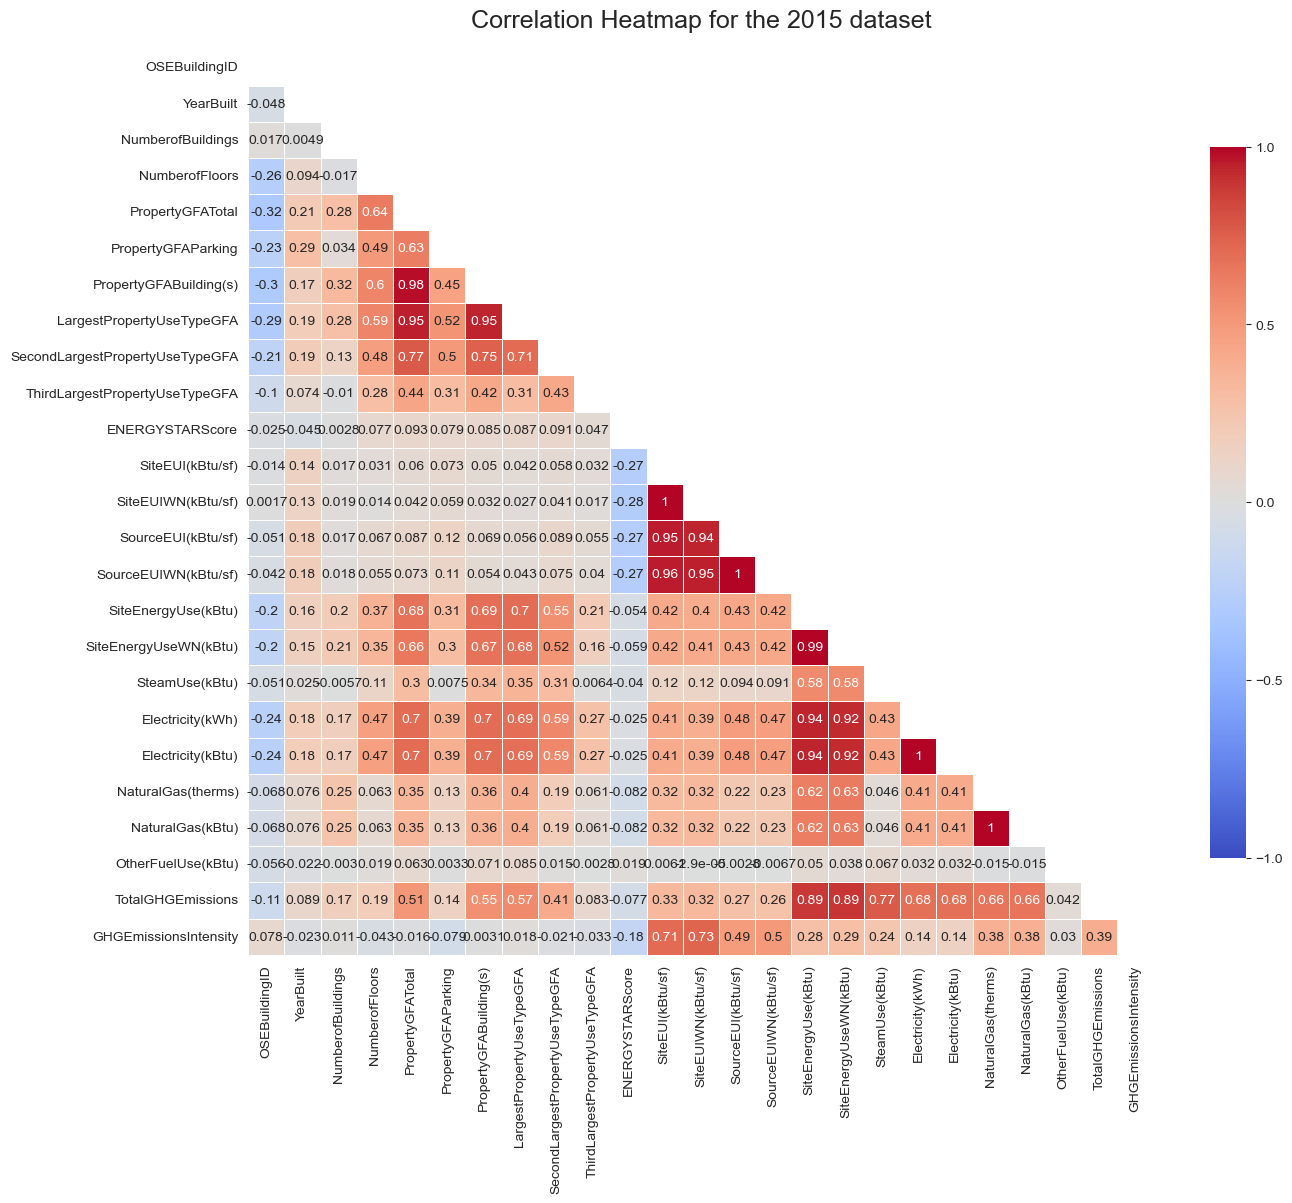

In [83]:
# Compute the correlation matrix
corr = data_2015_Cleaned2.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the seaborn heatmap parameters
sns.set_style("white")
heatmap = sns.heatmap(
    corr, 
    mask=mask,
    vmin=-1, vmax=1, 
    annot=True, 
    annot_kws={"size": 10}, # Font size of the annotations
    cmap='coolwarm', 
    linewidths=.5, 
    cbar_kws={"shrink": .75, "ticks": [-1, -0.5, 0, 0.5, 1]}, 
    square=True
)

# Set the title and adjust layout
heatmap.set_title('Correlation Heatmap for the 2015 dataset', fontdict={'fontsize':18}, pad=16)
plt.tight_layout()
plt.show()


**Result**<BR>
    From the previous correlation matrix, we can clearly see that the correlation matrix have improved after the cleaning process. In the next part after feature engineering, it will only include the features we will be focusing on in the prediction of CO2 emissions and to achieve our objective.

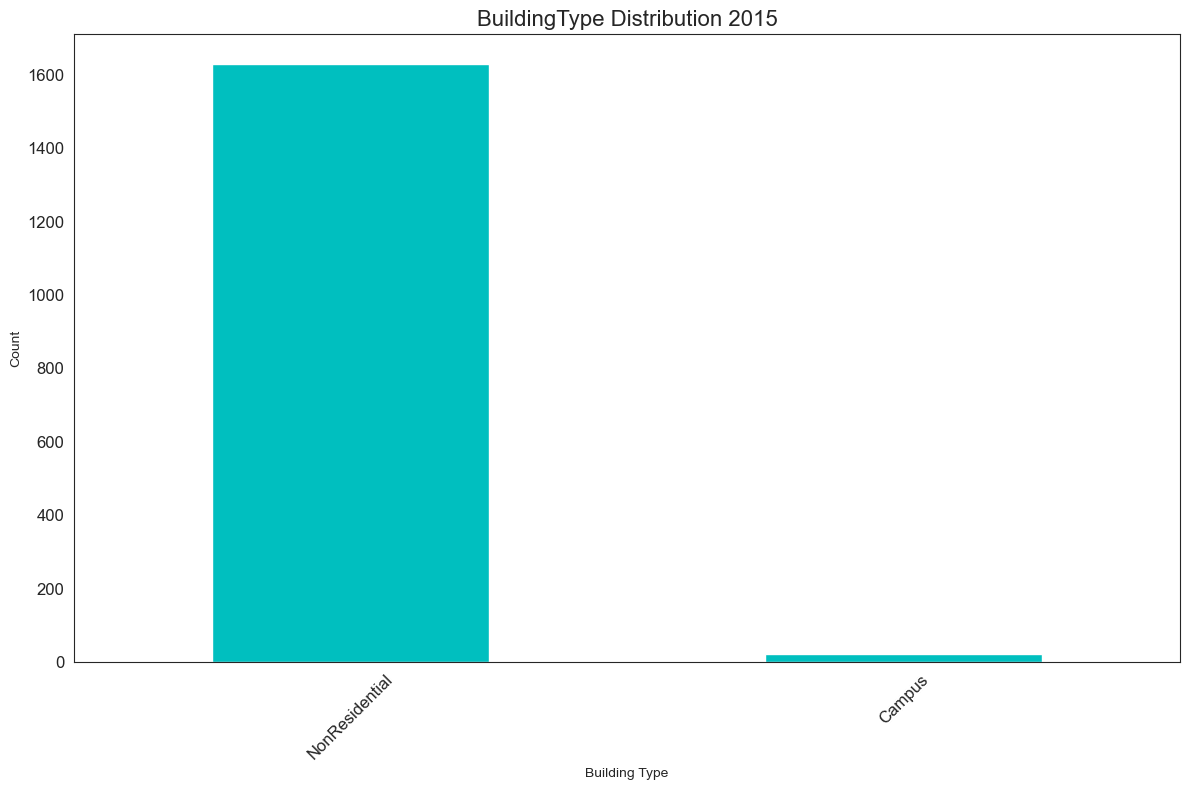

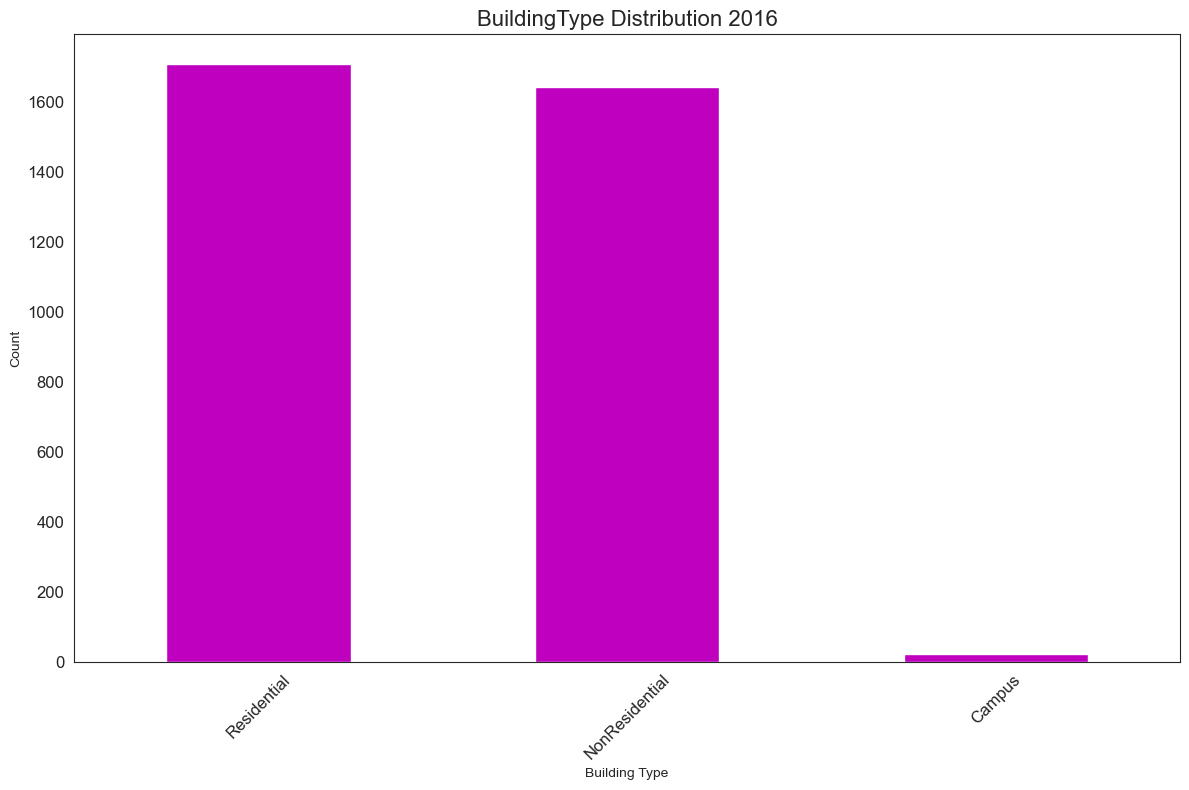

In [84]:
# Increase the figure size
plt.figure(figsize=(12, 8))

# Visualization of BuildingType distribution for 2015
data_2015_Cleaned2['BuildingType'].value_counts().plot(kind='bar', title='BuildingType Distribution 2015', color='c')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylabel('Count')  # Add y-axis label
plt.xlabel('Building Type')  # Add x-axis label
plt.title('BuildingType Distribution 2015', fontsize=16)  # Increase title font size
plt.xticks(fontsize=12)  # Increase x-tick font size
plt.yticks(fontsize=12)  # Increase y-tick font size
plt.tight_layout()  # Adjust spacing for better layout
plt.show()

# Increase the figure size
plt.figure(figsize=(12, 8))

# Visualization of BuildingType distribution for 2016
data_2016['BuildingType'].value_counts().plot(kind='bar', title='BuildingType Distribution 2016', color='m')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylabel('Count')  # Add y-axis label
plt.xlabel('Building Type')  # Add x-axis label
plt.title('BuildingType Distribution 2016', fontsize=16)  # Increase title font size
plt.xticks(fontsize=12)  # Increase x-tick font size
plt.yticks(fontsize=12)  # Increase y-tick font size
plt.tight_layout()  # Adjust spacing for better layout
plt.show()



) missing from current font.Local\Temp\ipykernel_4020\2557750447.py:12: UserWarning: Glyph 13 (
  plt.tight_layout()  # Adjust spacing for better layout
) missing from current font.s\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


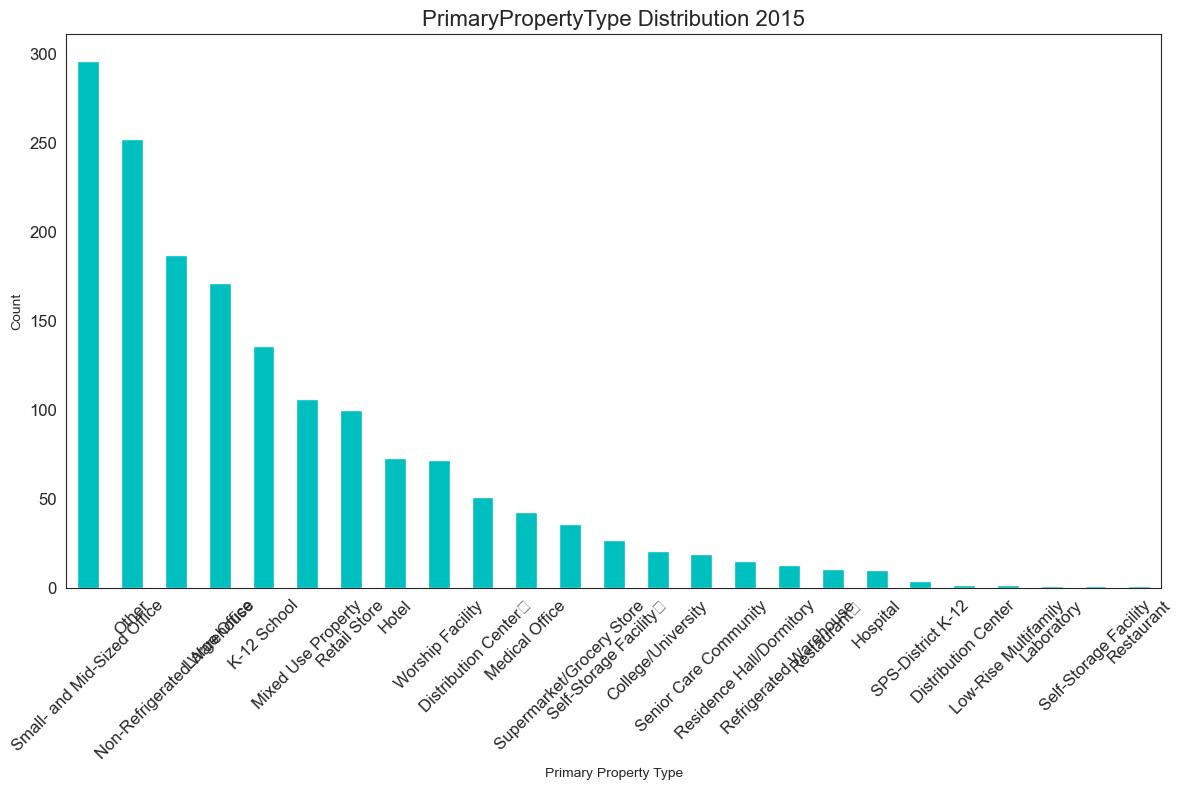

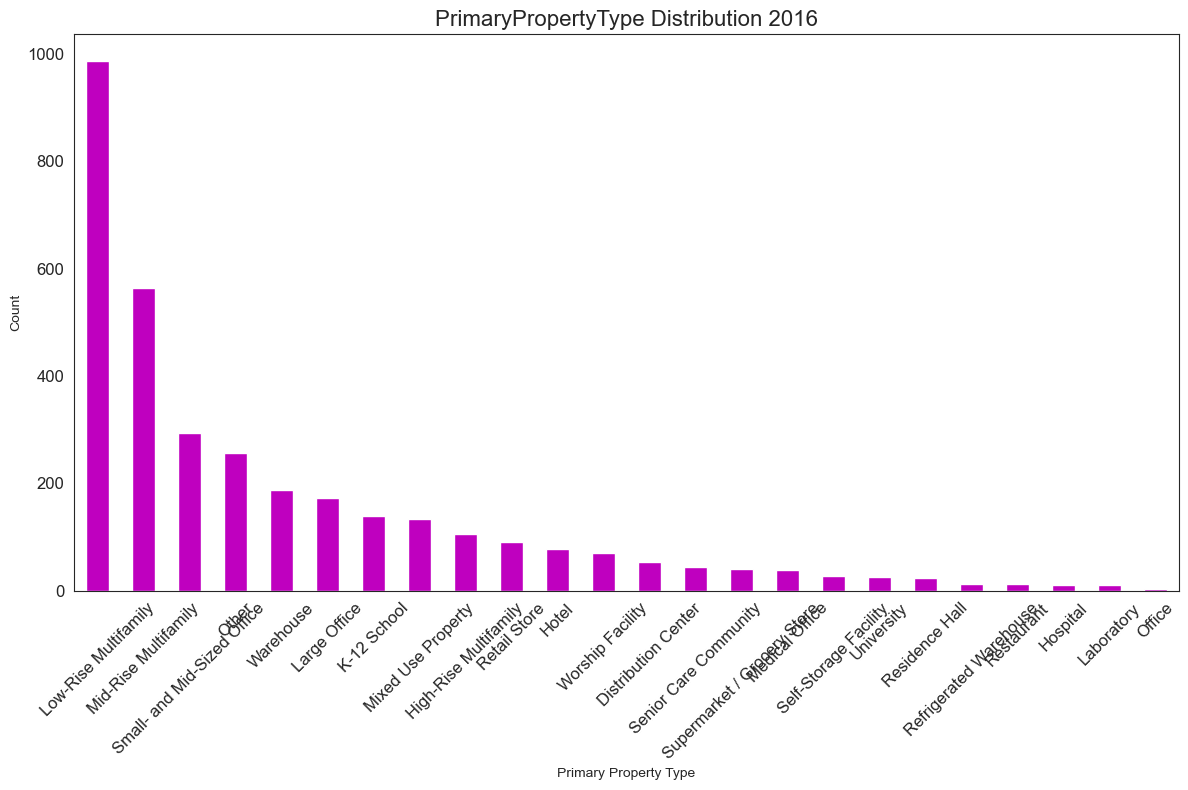

In [85]:
# Increase the figure size
plt.figure(figsize=(12, 8))

# Visualization of PrimaryPropertyType distribution for 2015
data_2015_Cleaned2['PrimaryPropertyType'].value_counts().plot(kind='bar', color='c')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylabel('Count')  # Add y-axis label
plt.xlabel('Primary Property Type')  # Add x-axis label
plt.title('PrimaryPropertyType Distribution 2015', fontsize=16)  # Increase title font size
plt.xticks(fontsize=12)  # Increase x-tick font size
plt.yticks(fontsize=12)  # Increase y-tick font size
plt.tight_layout()  # Adjust spacing for better layout
plt.show()

# Increase the figure size
plt.figure(figsize=(12, 8))

# Visualization of PrimaryPropertyType distribution for 2016
data_2016['PrimaryPropertyType'].value_counts().plot(kind='bar', color='m')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylabel('Count')  # Add y-axis label
plt.xlabel('Primary Property Type')  # Add x-axis label
plt.title('PrimaryPropertyType Distribution 2016', fontsize=16)  # Increase title font size
plt.xticks(fontsize=12)  # Increase x-tick font size
plt.yticks(fontsize=12)  # Increase y-tick font size
plt.tight_layout()  # Adjust spacing for better layout
plt.show()


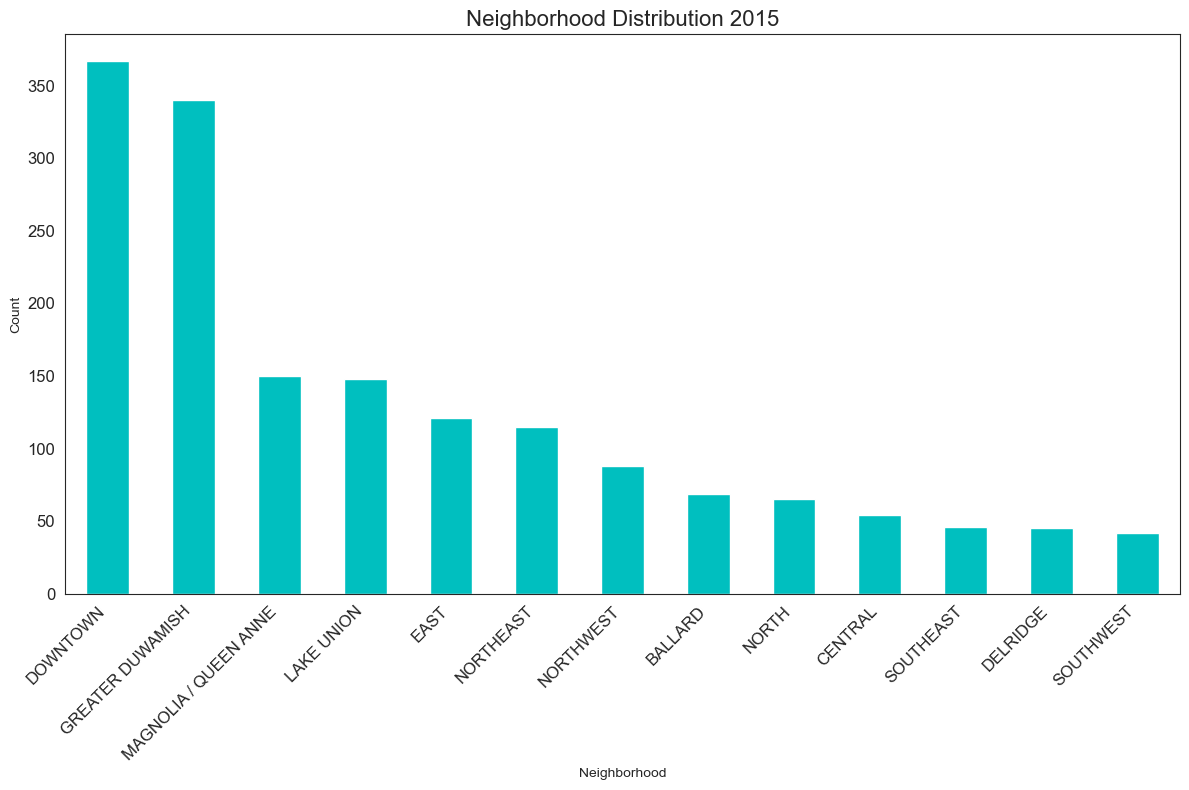

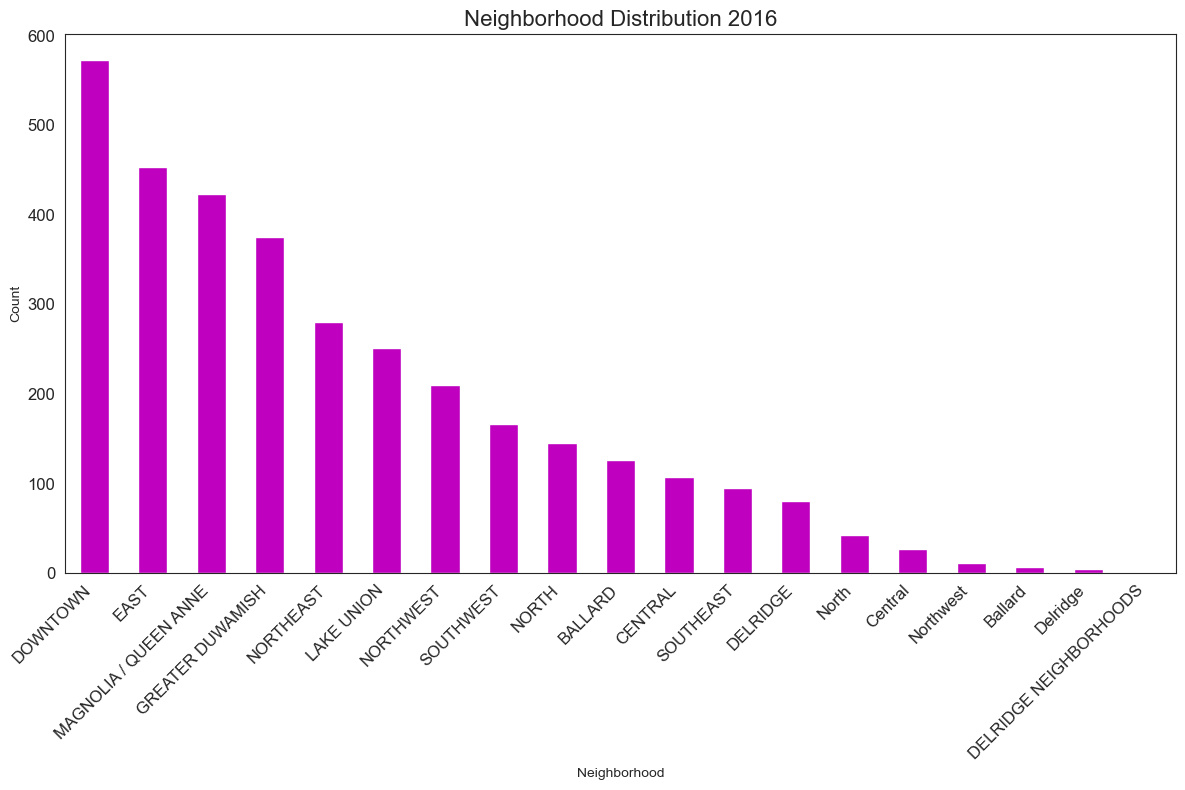

In [86]:
# Increase the figure size
plt.figure(figsize=(12, 8))

# Visualization of Neighborhood distribution for 2015
data_2015_Cleaned2['Neighborhood'].value_counts().plot(kind='bar', color='c')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylabel('Count')  # Add y-axis label
plt.xlabel('Neighborhood')  # Add x-axis label
plt.title('Neighborhood Distribution 2015', fontsize=16)  # Increase title font size
plt.xticks(fontsize=12)  # Increase x-tick font size
plt.yticks(fontsize=12)  # Increase y-tick font size
plt.tight_layout()  # Adjust spacing for better layout
plt.show()

# Increase the figure size
plt.figure(figsize=(12, 8))

# Visualization of Neighborhood distribution for 2016
data_2016['Neighborhood'].value_counts().plot(kind='bar', color='m')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ylabel('Count')  # Add y-axis label
plt.xlabel('Neighborhood')  # Add x-axis label
plt.title('Neighborhood Distribution 2016', fontsize=16)  # Increase title font size
plt.xticks(fontsize=12)  # Increase x-tick font size
plt.yticks(fontsize=12)  # Increase y-tick font size
plt.tight_layout()  # Adjust spacing for better layout
plt.show()


---

**Conclusion**<br>
Understanding the dataset's composition reveals that most buildings are Residential, located in the DOWNTOWN area, and are Low-Rise Multifamily types. This distribution is essential for accurate forecasting, especially if unmeasured buildings share similar characteristics. Additionally, the skewed dataset could influence the evaluation of the ENERGYSTAR Score's predictive power across various building types and neighborhoods. In essence, the dataset's composition plays a critical role in both forecasting emissions and assessing the relevance of the ENERGYSTAR Score.

---

**Data Distribution & Null Values Analysis for Relevant Columns**

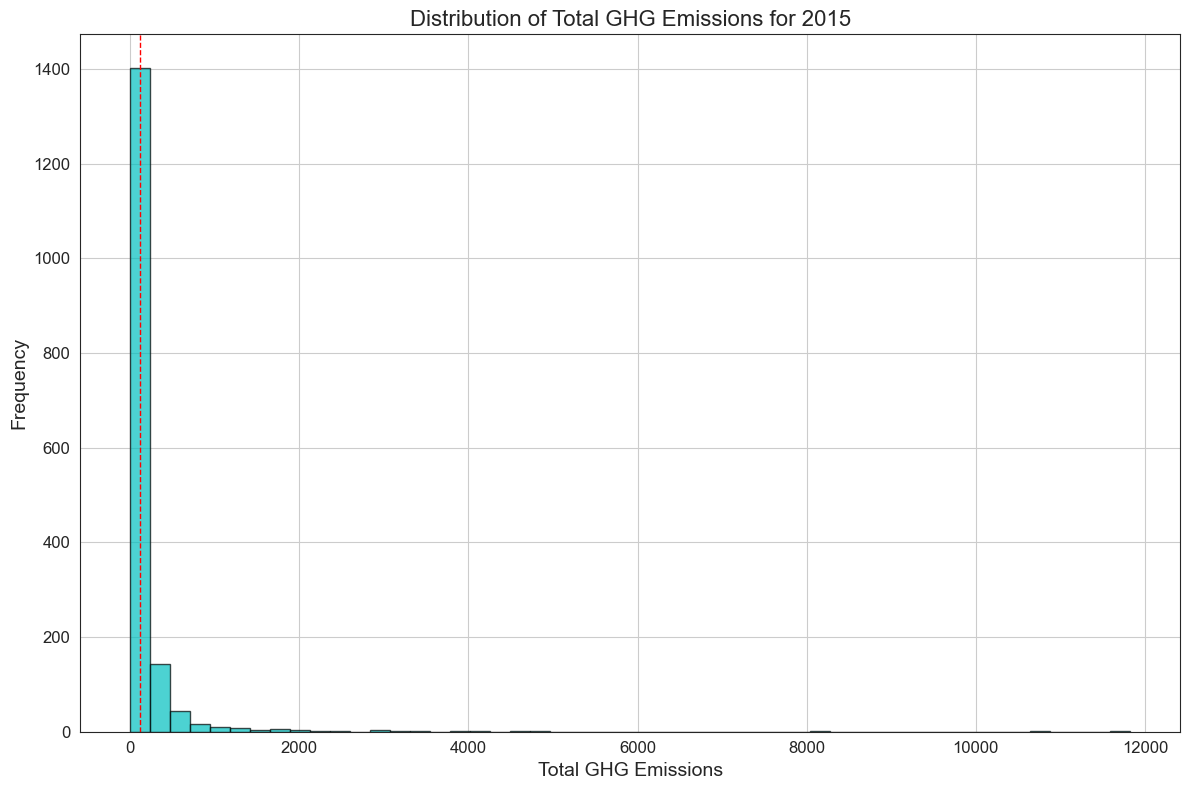

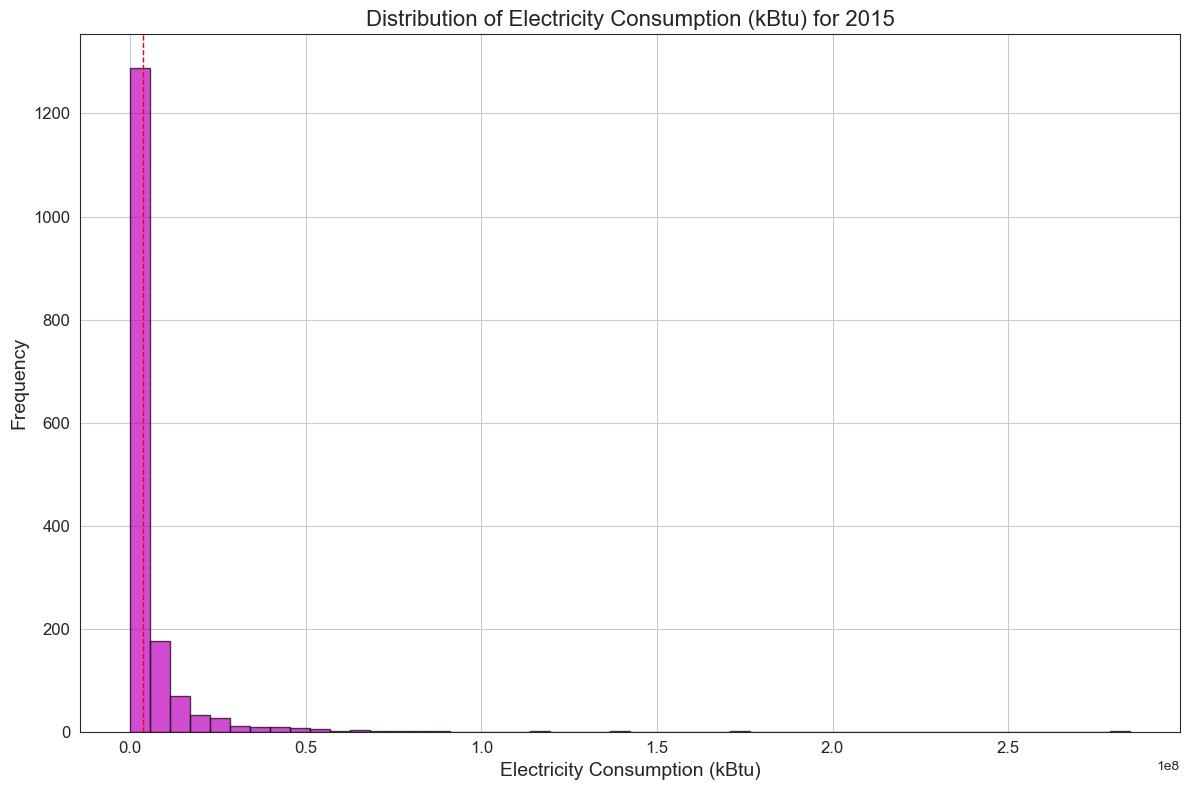

The following are the count of the null values for each essential column in the 2016 dataset:


TotalGHGEmissions    0
Electricity(kBtu)    0
ENERGYSTARScore      0
dtype: int64

In [87]:
# Distribution of CO2 Emissions for 2016
plt.figure(figsize=(12, 8))
plt.hist(data_2015_Cleaned2['TotalGHGEmissions'], bins=50, color='c', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(data_2016['TotalGHGEmissions']), color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Total GHG Emissions for 2015', fontsize=16)
plt.xlabel('Total GHG Emissions', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Distribution of Electricity consumption for 2016
plt.figure(figsize=(12, 8))
plt.hist(data_2015_Cleaned2['Electricity(kBtu)'], bins=50, color='m', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(data_2016['Electricity(kBtu)']), color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Electricity Consumption (kBtu) for 2015', fontsize=16)
plt.xlabel('Electricity Consumption (kBtu)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Check null values for essential columns in 2016 dataset
essential_columns = ['TotalGHGEmissions', 'Electricity(kBtu)', 'ENERGYSTARScore']
null_values = data_2015_Cleaned2[essential_columns].isnull().sum()

print('The following are the count of the null values for each essential column in the 2016 dataset:')
null_values


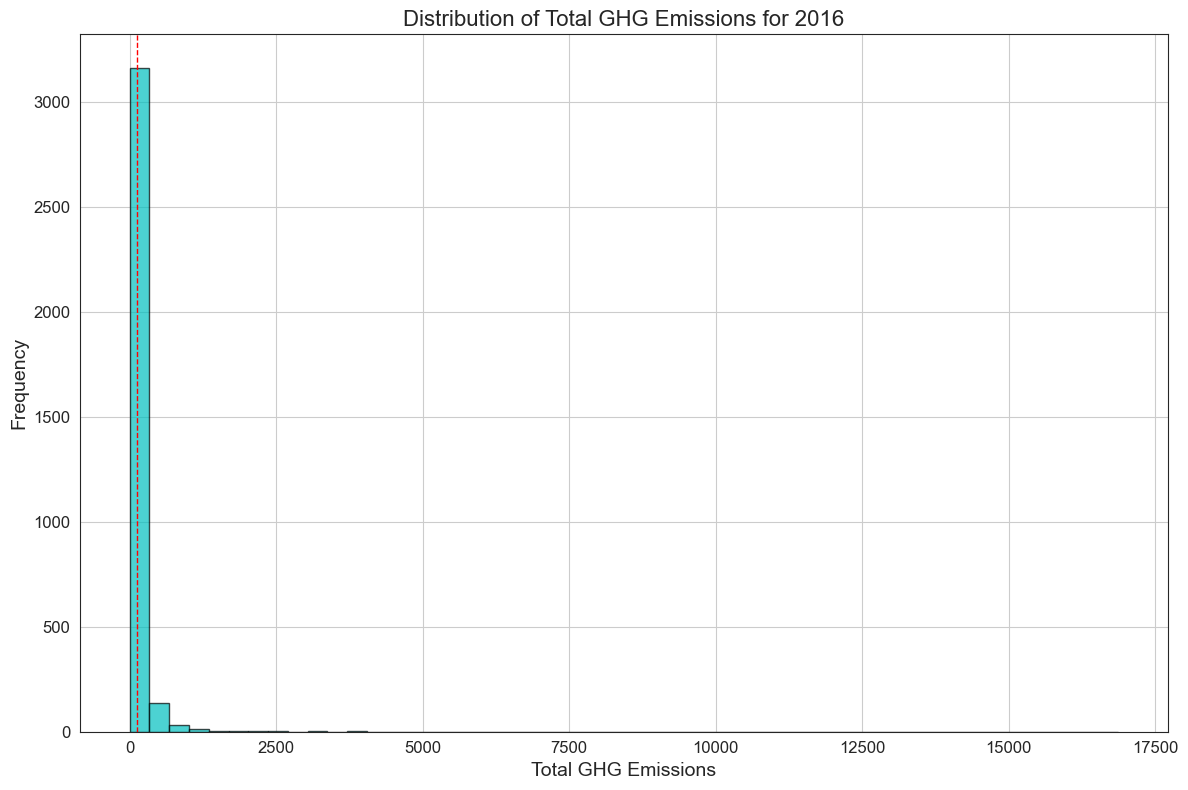

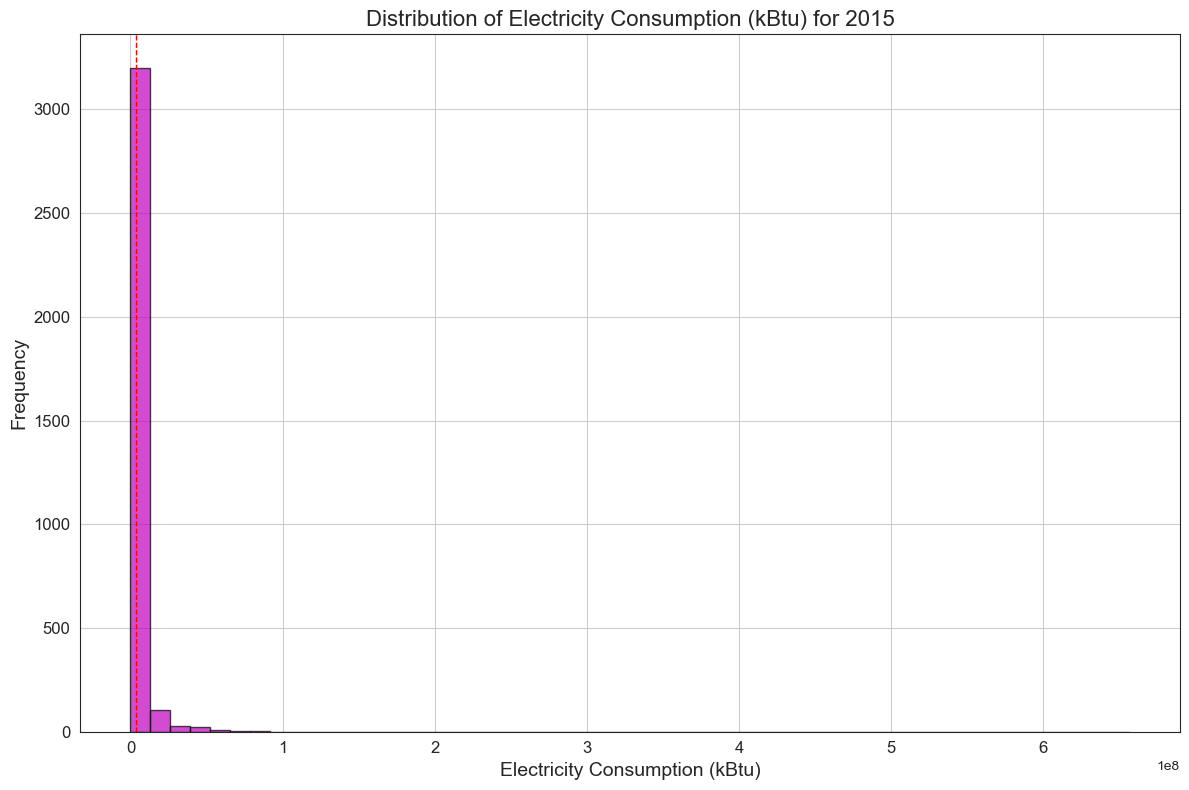

The following are the count of the null values for each essential column in the 2016 dataset:


TotalGHGEmissions    0
Electricity(kBtu)    0
ENERGYSTARScore      0
dtype: int64

In [88]:
# Distribution of CO2 Emissions for 2016
plt.figure(figsize=(12, 8))
plt.hist(data_2016['TotalGHGEmissions'], bins=50, color='c', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(data_2016['TotalGHGEmissions']), color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Total GHG Emissions for 2016', fontsize=16)
plt.xlabel('Total GHG Emissions', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Distribution of Electricity consumption for 2016
plt.figure(figsize=(12, 8))
plt.hist(data_2016['Electricity(kBtu)'], bins=50, color='m', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(data_2016['Electricity(kBtu)']), color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Electricity Consumption (kBtu) for 2015', fontsize=16)
plt.xlabel('Electricity Consumption (kBtu)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Check null values for essential columns in 2016 dataset
essential_columns = ['TotalGHGEmissions', 'Electricity(kBtu)', 'ENERGYSTARScore']
null_values = data_2016[essential_columns].isnull().sum()

print('The following are the count of the null values for each essential column in the 2016 dataset:')
null_values


**Conclusion**<br>
- **Distribution of Total GHG Emissions for 2015**: Most properties emit between 0 and 20 units of GHG with few high outliers.
- **Distribution of Electricity Consumption (kBtu) for 2015**: The majority of properties consume electricity between 0 to 0.25e7 kBtu.
- **Distribution of Total GHG Emissions for 2016**: A large spike in properties emits very low GHG, with some extreme outliers beyond 2500 units.
- **Distribution of Electricity Consumption (kBtu) for 2016**: Most properties have extremely low electricity consumption, with a few consuming up to 6e8 kBtu.

**Explore the Distribution of ENERGYSTARScore**

we want to understand the distribution of the ENERGYSTARScore since it's one of the features we're interested in assessing its impact on CO2 emissions and total energy consumption.

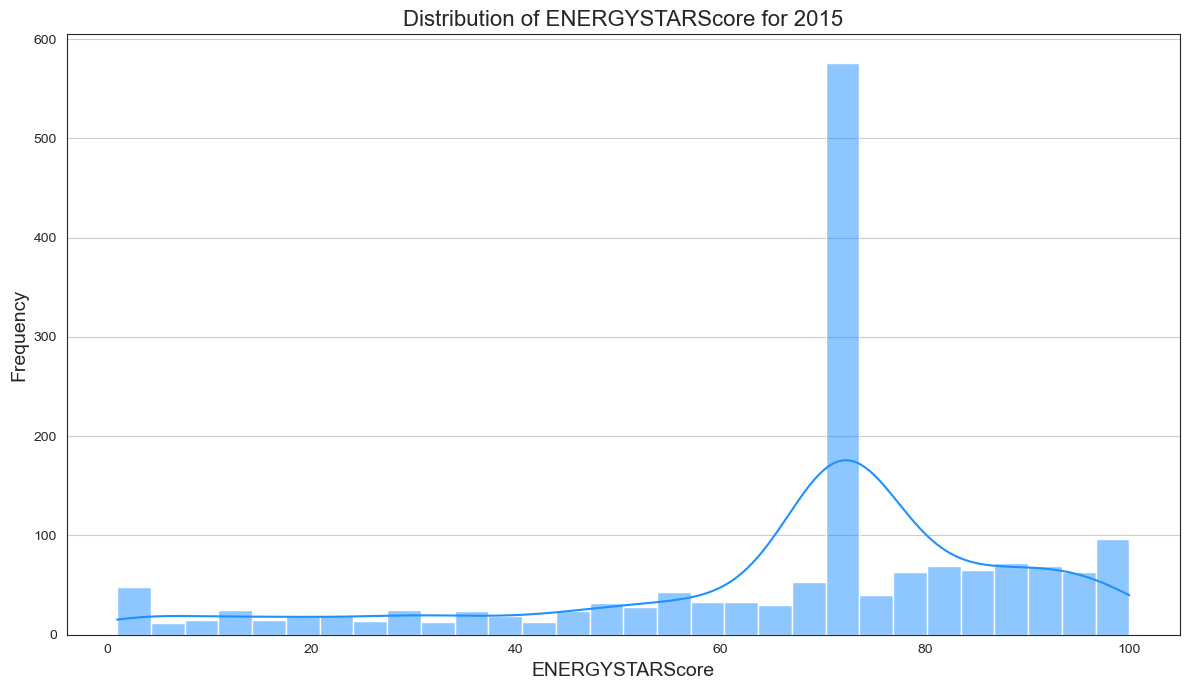

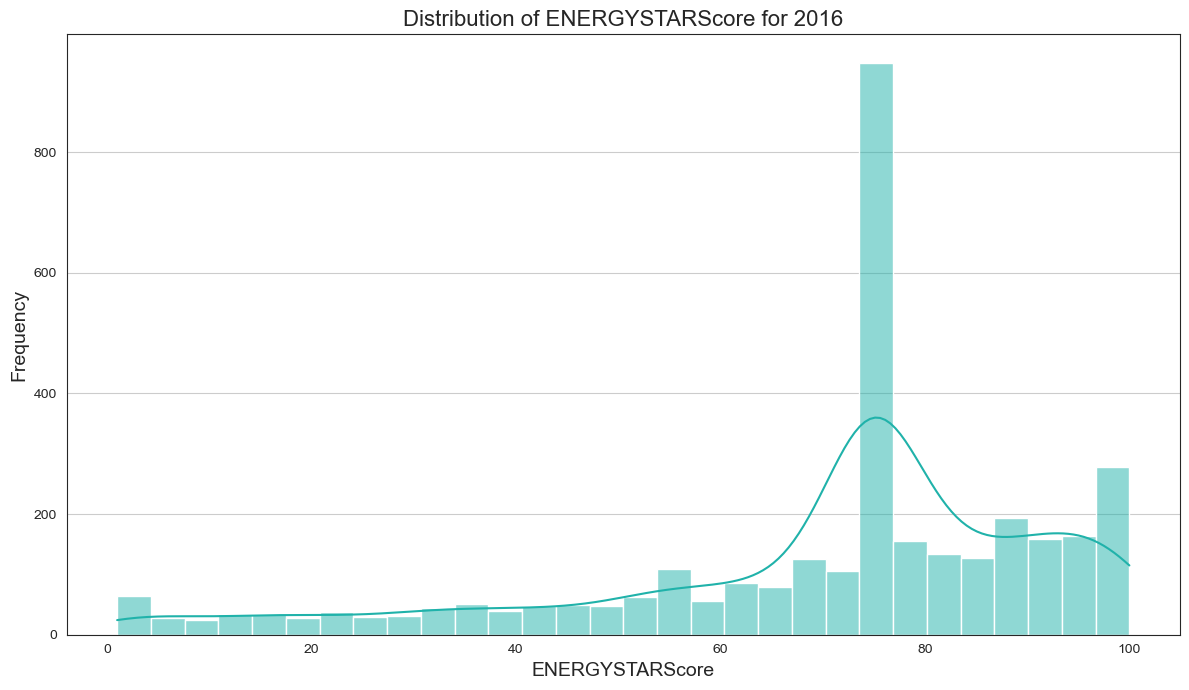

In [89]:
# Plotting for data_2015
plt.figure(figsize=(12,7))
sns.histplot(data_2015_Cleaned2['ENERGYSTARScore'].dropna(), kde=True, bins=30, color='dodgerblue')
plt.title("Distribution of ENERGYSTARScore for 2015", fontsize=16)
plt.xlabel("ENERGYSTARScore", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plotting for data_2016
plt.figure(figsize=(12,7))
sns.histplot(data_2016['ENERGYSTARScore'].dropna(), kde=True, bins=30, color='lightseagreen')
plt.title("Distribution of ENERGYSTARScore for 2016", fontsize=16)
plt.xlabel("ENERGYSTARScore", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


---

**Conclusion:**

- Both 2015 and 2016 distributions peak around an ENERGYSTARScore of 100.
- A significant number of buildings in 2015 and 2016 exhibit high energy efficiency.
- Low scores (below 40) are minimal in both years.
- A trend towards higher energy efficiency is evident across both years.


---

**Explore the Relationship between ENERGYSTARScore and Energy Consumption**

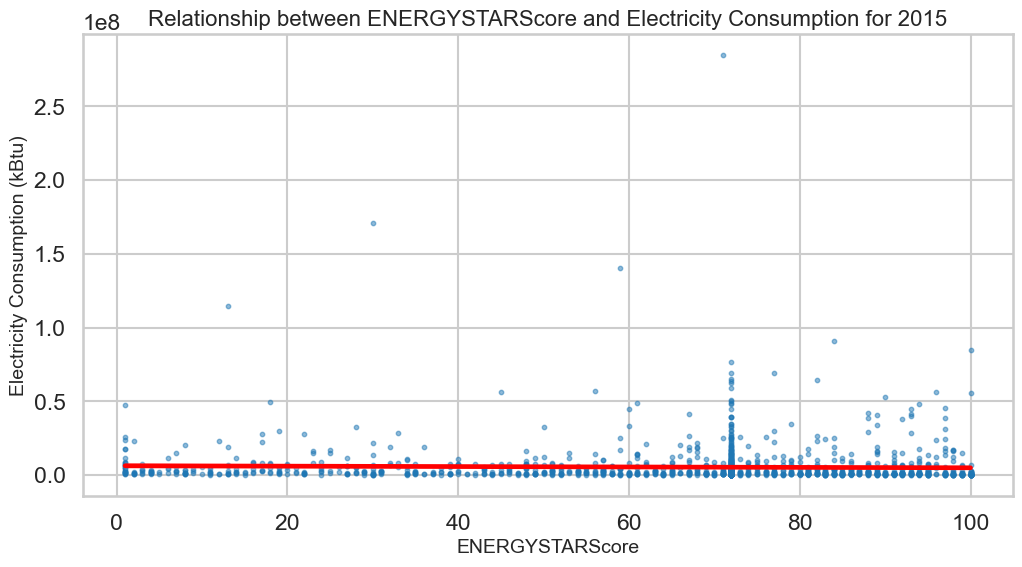

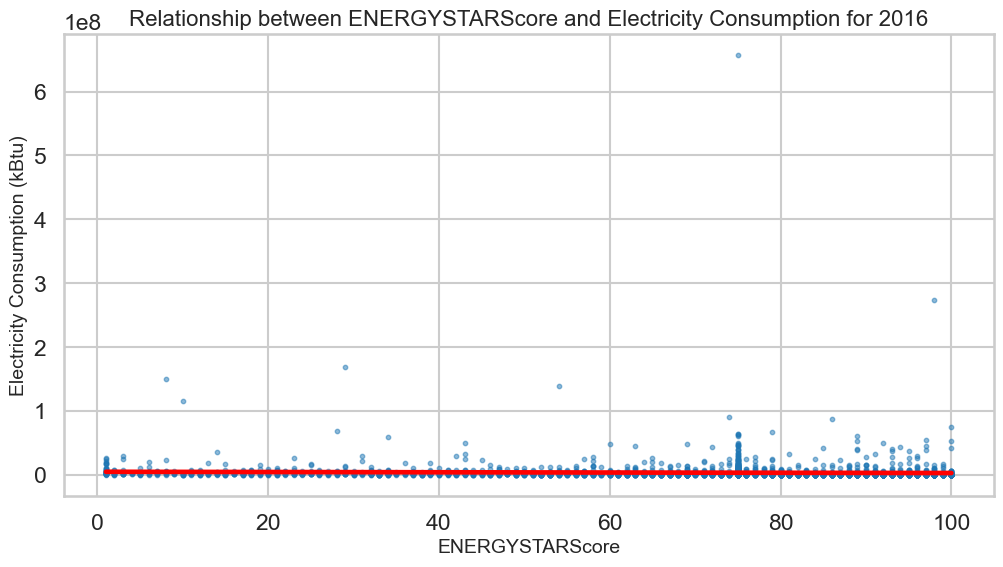

In [90]:
# Set the style and context to improve the font scale
sns.set_style("whitegrid")
sns.set_context("talk")

# For 2015 data
plt.figure(figsize=(12,6))
sns.regplot(x=data_2015_Cleaned2['ENERGYSTARScore'], y=data_2015_Cleaned2['Electricity(kBtu)'], scatter_kws={'alpha':0.5, 's':10}, line_kws={'color':'red'})
plt.title("Relationship between ENERGYSTARScore and Electricity Consumption for 2015", fontsize=16)
plt.ylabel("Electricity Consumption (kBtu)", fontsize=14)
plt.xlabel("ENERGYSTARScore", fontsize=14)
plt.show()

# For 2016 data
plt.figure(figsize=(12,6))
sns.regplot(x=data_2016['ENERGYSTARScore'], y=data_2016['Electricity(kBtu)'], scatter_kws={'alpha':0.5, 's':10}, line_kws={'color':'red'})
plt.title("Relationship between ENERGYSTARScore and Electricity Consumption for 2016", fontsize=16)
plt.ylabel("Electricity Consumption (kBtu)", fontsize=14)
plt.xlabel("ENERGYSTARScore", fontsize=14)
plt.show()


---
**Result**

For both 2015 and 2016, there's a weak negative correlation between ENERGYSTARScore and electricity consumption, with many buildings having low consumption irrespective of their score.

---

**Explore the Relationship between ENERGYSTARScore and GHG Emissions**

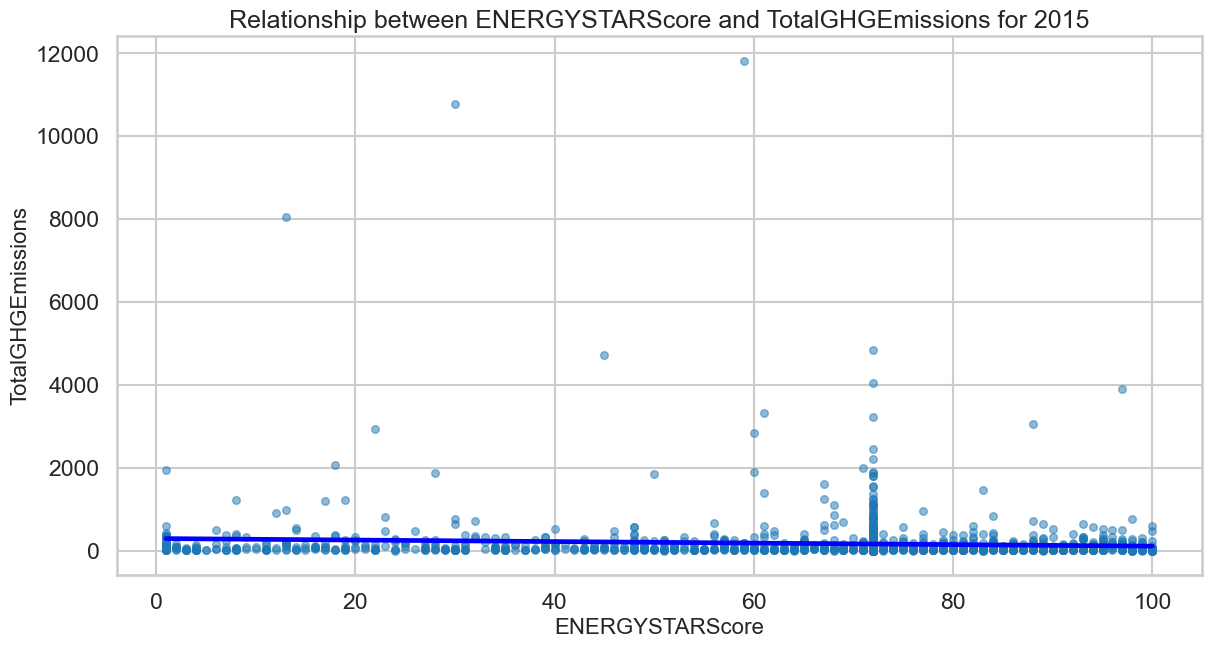

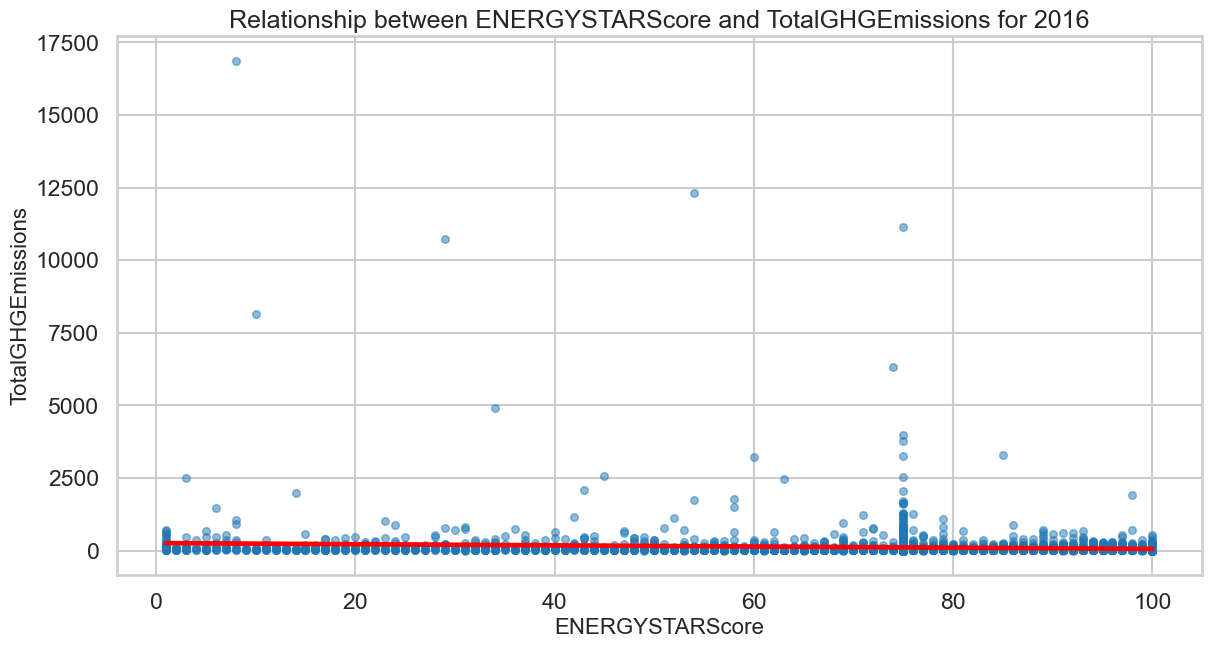

In [91]:
# Adjust the style and context to amplify the font scale
sns.set_style("whitegrid")
sns.set_context("talk")


# For 2015 data
plt.figure(figsize=(14,7))
sns.regplot(x=data_2015_Cleaned2['ENERGYSTARScore'], y=data_2015_Cleaned2['TotalGHGEmissions'], scatter_kws={'alpha':0.5, 's':30}, line_kws={'color':'blue'}, ci=None)
plt.title("Relationship between ENERGYSTARScore and TotalGHGEmissions for 2015", fontsize=18)
plt.ylabel("TotalGHGEmissions", fontsize=16)
plt.xlabel("ENERGYSTARScore", fontsize=16)
plt.show()

# For 2016 data
plt.figure(figsize=(14,7))
sns.regplot(x=data_2016['ENERGYSTARScore'], y=data_2016['TotalGHGEmissions'], scatter_kws={'alpha':0.5, 's':30}, line_kws={'color':'red'}, ci=None)
plt.title("Relationship between ENERGYSTARScore and TotalGHGEmissions for 2016", fontsize=18)
plt.ylabel("TotalGHGEmissions", fontsize=16)
plt.xlabel("ENERGYSTARScore", fontsize=16)
plt.show()



**Result**<br>
- For 2015, a slight negative correlation exists between ENERGYSTARScore and TotalGHGEmissions, with many high-scoring buildings emitting less.
- The 2016 data presents a clearer negative correlation, especially for scores above 60, yet a few high-scoring buildings still have significant emissions.

**Greenhouse gas emissions across various building types**

<Axes: xlabel='BuildingType', ylabel='TotalGHGEmissions'>

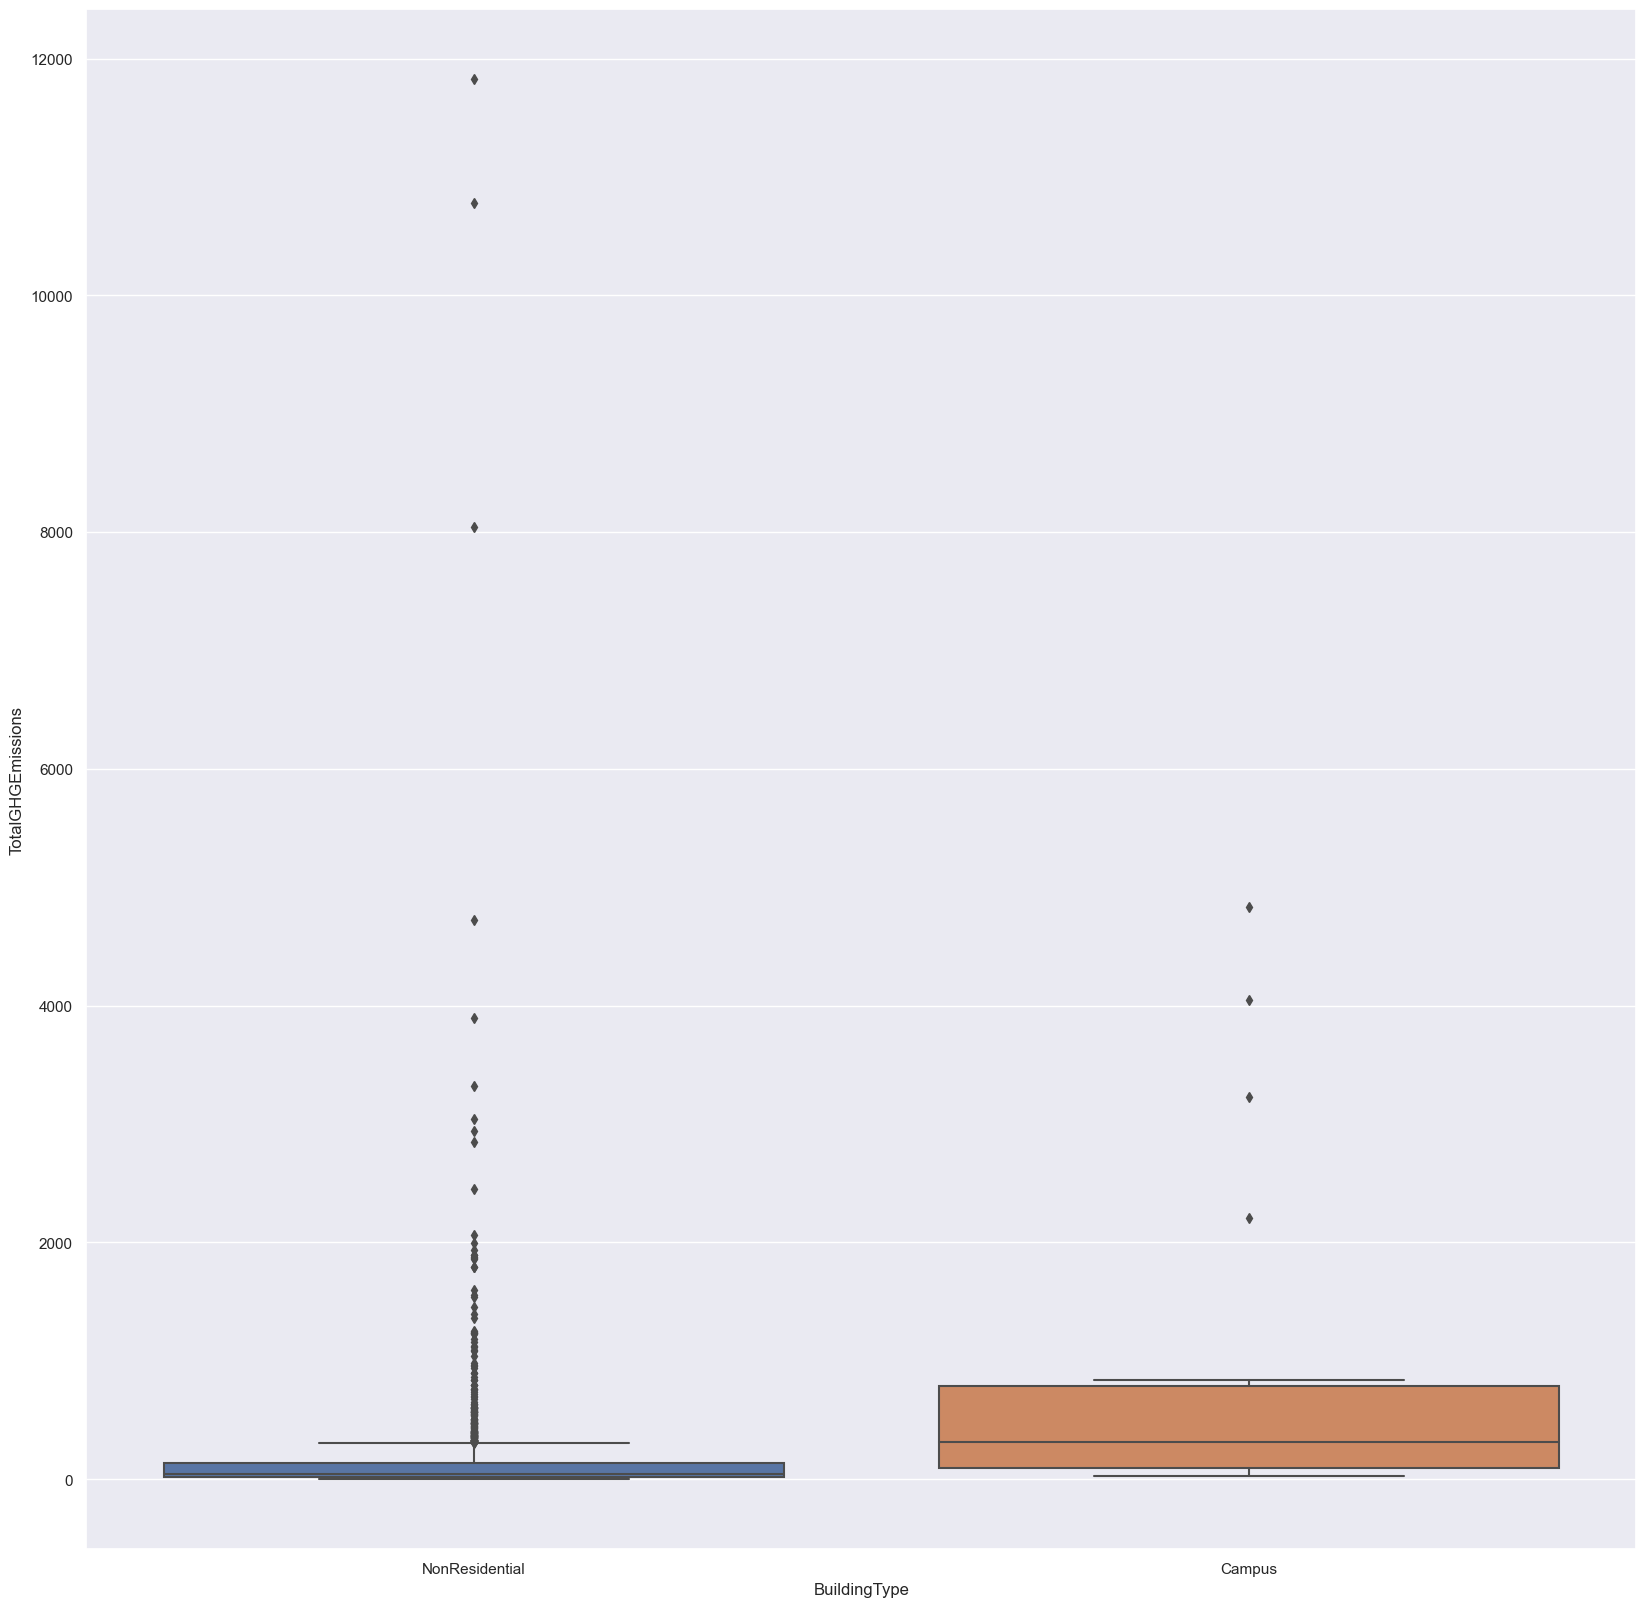

In [92]:
sns.set(rc={"figure.figsize":(20, 20)})
sns.boxplot(data=data_2015_Cleaned2, x='BuildingType', y='TotalGHGEmissions')

<Axes: xlabel='BuildingType', ylabel='TotalGHGEmissions'>

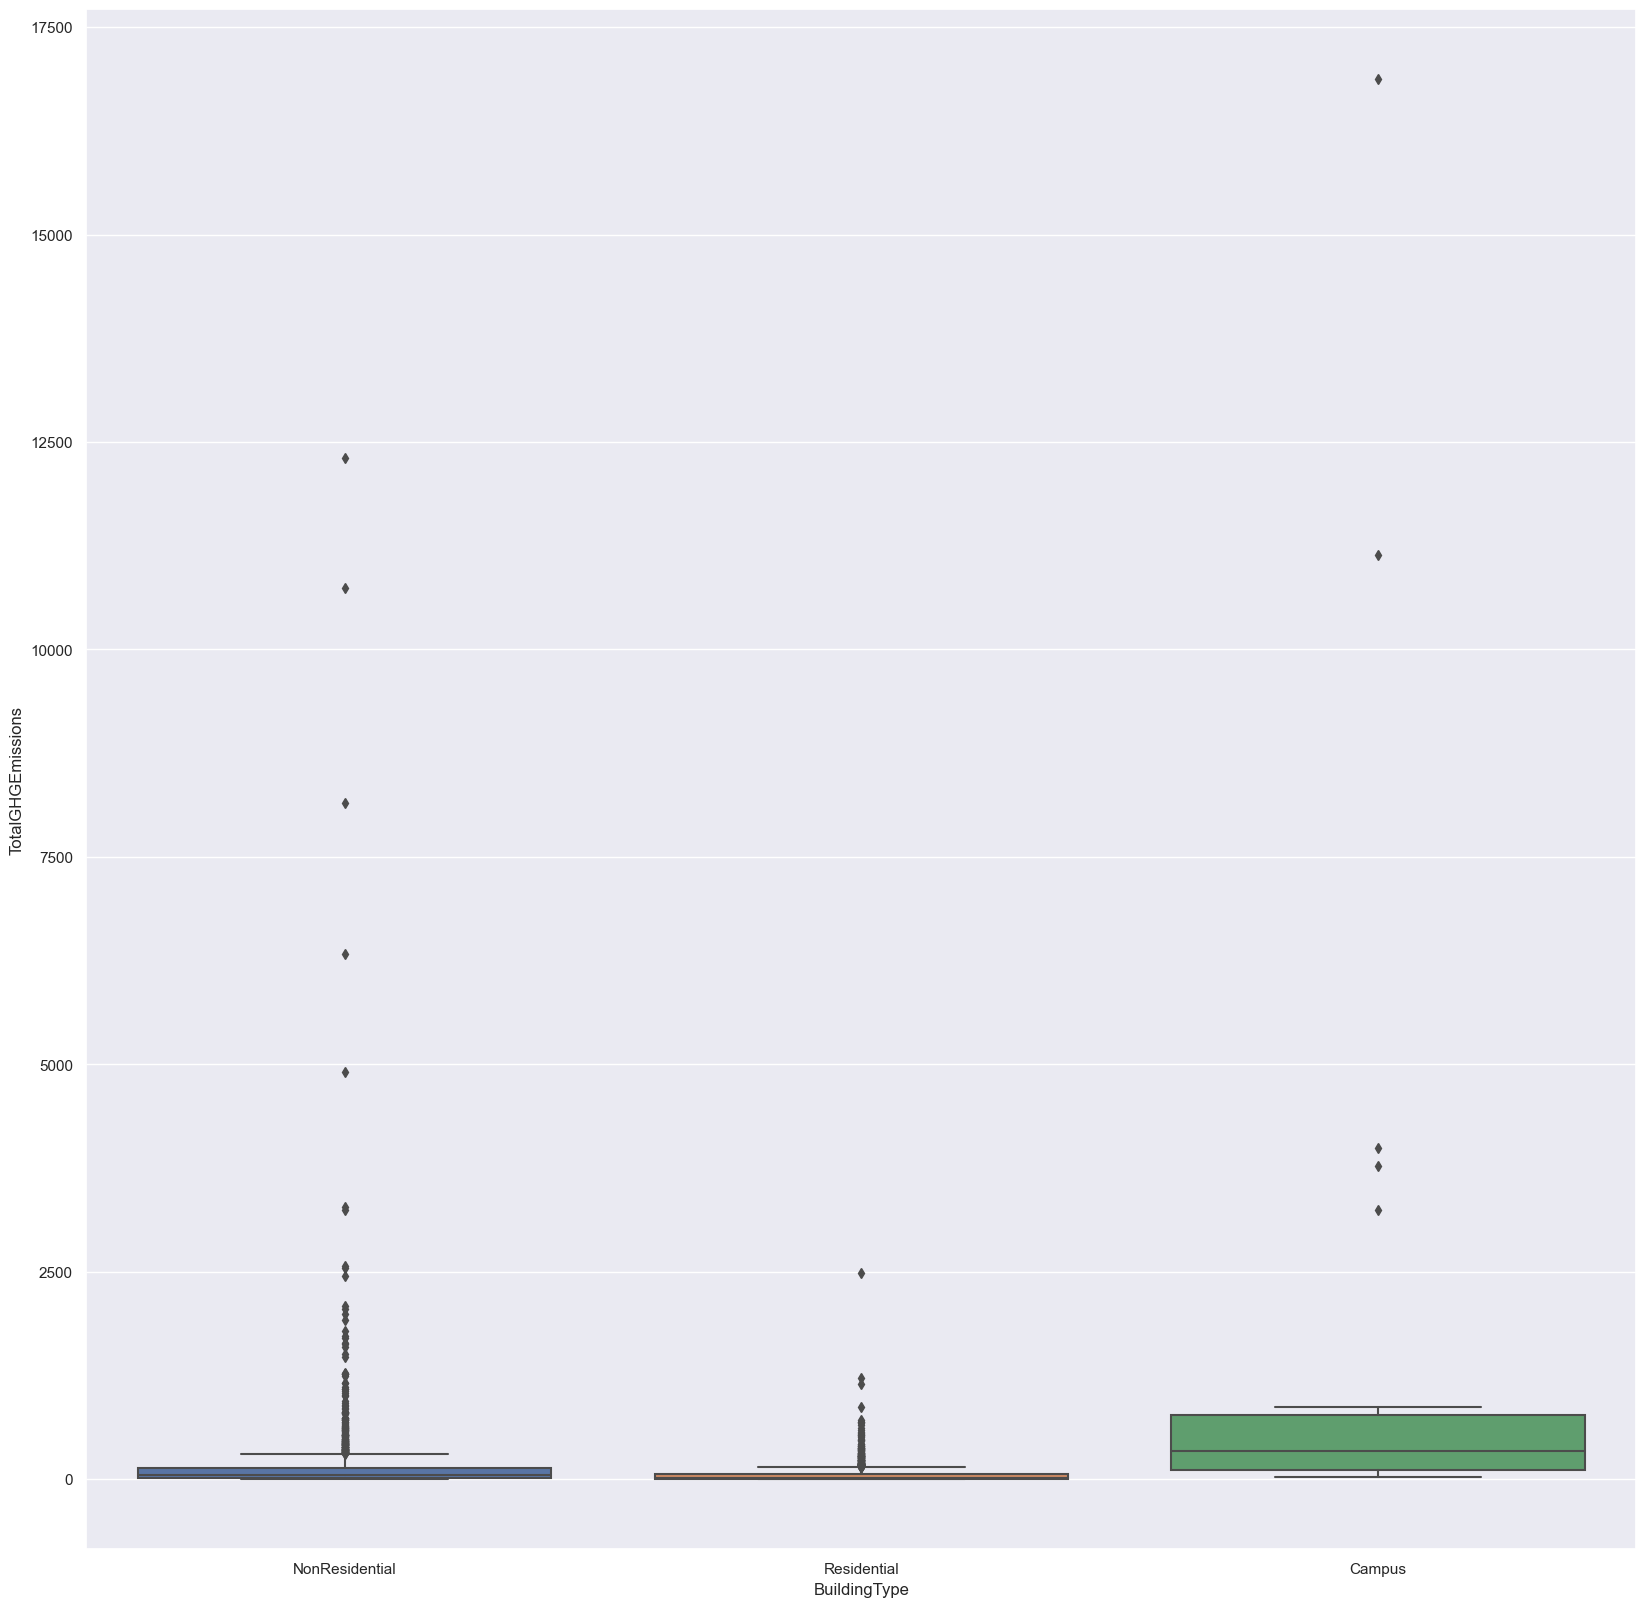

In [93]:
sns.set(rc={"figure.figsize":(20, 20)})
sns.boxplot(data=data_2016, x='BuildingType', y='TotalGHGEmissions')

**Result**<br>

The boxplot illustrates greenhouse gas emissions across various building types. <br>
**Observations:**

* Variability in Emissions: Differences in GHG emissions are evident across building types, with 'Multifamily MR' showing a wider spread.

* Outliers: Several categories, especially 'NonResidential', have potential outliers indicating unusually high emissions.

* Sparse Data: Some categories, like 'Other', have fewer data points, suggesting limited samples.* 

This visualization underscores the significance of building type in predicting CO2 emissions and the potential need for further data preprocessing.

**Overall Conclusion**
From these visualizations, the following overarching conclusions can be drawn with regard to our objectives:

* The ENERGYSTAR Score varies significantly among the buildings, with a considerable number having high scores. This score may serve as an important predictor for CO2 emissions and total energy consumption.
* Building type plays a crucial role in determining energy consumption. This insight might help in feature engineering and model development to enhance prediction accuracy.
* Since there's a wide variance in energy consumption among building types, models might need to account for these differences (possibly through stratified sampling or specialized models) to ensure accurate predictions across all types.


### 3.3 Data reduction

In [94]:
data_2015_Cleaned2.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'DefaultData', 'ComplianceStatus'],
      dtype='object')

In [95]:
data_2015_Cleaned2.shape

(1650, 34)

In [96]:
# Filter only non-residential buildings
data_2015_Filter1 = data_2015_Cleaned2[data_2015_Cleaned2['BuildingType'] == 'NonResidential']
data_2016 = data_2016[data_2016['BuildingType'] == 'NonResidential']

# List of columns to keep
columns_to_keep = [
    'OSEBuildingID','BuildingType', 'PrimaryPropertyType', 'PropertyGFATotal', 
    'PropertyGFAParking', 'PropertyGFABuilding(s)', 'YearBuilt', 'Neighborhood',
    'NumberofBuildings', 'NumberofFloors', 'ListOfAllPropertyUseTypes', 
    'LargestPropertyUseType', 'Electricity(kBtu)','SiteEnergyUse(kBtu)','SteamUse(kBtu)', 'NaturalGas(kBtu)', 
    'ENERGYSTARScore', 'TotalGHGEmissions','LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA'
]

# Reduce columns in both datasets
data_2015_Filter1 = data_2015_Filter1[columns_to_keep]
data_2016 = data_2016[columns_to_keep]
print("The columns to keep for 2015 are:\n")

print(data_2015_Filter1.columns)
print('-----------------------------------------------------------------------------------------------')
print("The columns to keep for 2016 are:\n")

print(data_2016.columns)


The columns to keep for 2015 are:

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'YearBuilt', 'Neighborhood', 'NumberofBuildings', 'NumberofFloors',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'Electricity(kBtu)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'NaturalGas(kBtu)', 'ENERGYSTARScore', 'TotalGHGEmissions',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA'],
      dtype='object')
-----------------------------------------------------------------------------------------------
The columns to keep for 2016 are:

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'YearBuilt', 'Neighborhood', 'NumberofBuildings', 'NumberofFloors',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'Elect

In [97]:
data_2015_Filter1.shape

(1628, 21)

### 3.4 Data transformation

#### 3.4.1 Feature Selection

C:\Users\Ines Ayari\AppData\Local\Temp\ipykernel_4020\2777403885.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_2015_Filter1.corr()


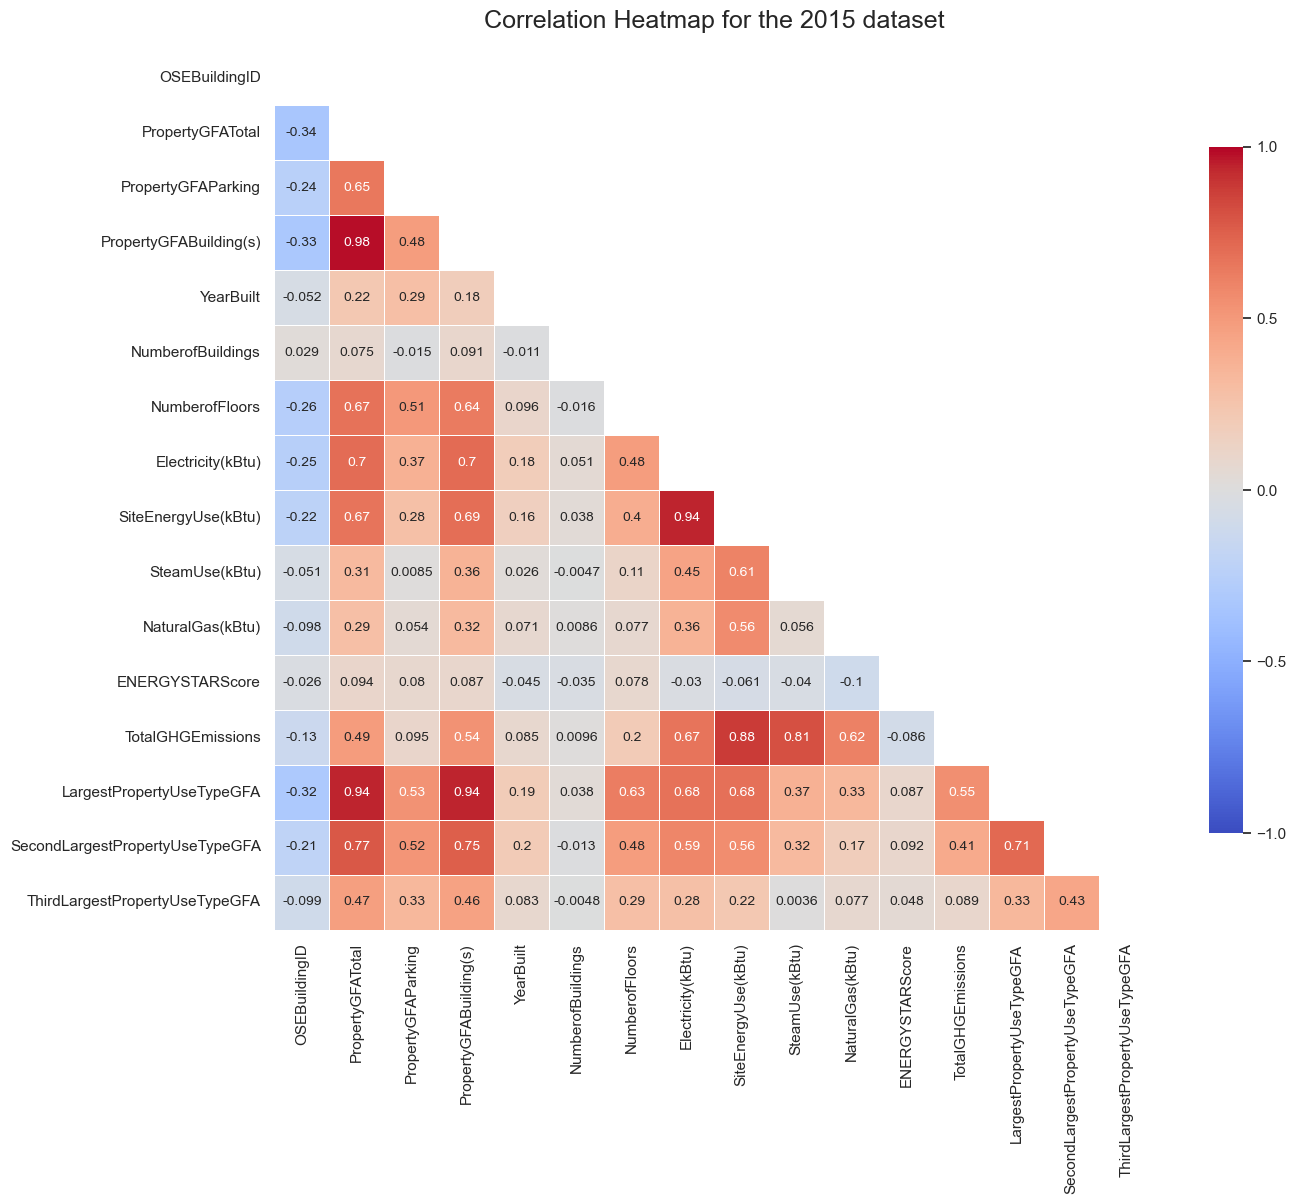

In [98]:
# Compute the correlation matrix
corr = data_2015_Filter1.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the seaborn heatmap parameters
sns.set_style("white")
heatmap = sns.heatmap(
    corr, 
    mask=mask,
    vmin=-1, vmax=1, 
    annot=True, 
    annot_kws={"size": 10}, # Font size of the annotations
    cmap='coolwarm', 
    linewidths=.5, 
    cbar_kws={"shrink": .75, "ticks": [-1, -0.5, 0, 0.5, 1]}, 
    square=True
)

# Set the title and adjust layout
heatmap.set_title('Correlation Heatmap for the 2015 dataset', fontdict={'fontsize':18}, pad=16)
plt.tight_layout()
plt.show()



Objective Alignment: The heatmap directly informs our aim to predict CO2 emissions and energy consumption of non-residential buildings.

Emissions & Energy:

* PropertyGFABuilding(s) is very strongly correlated with PropertyGFATotal (0.98), suggesting that the total floor area of most properties is largely accounted for by the buildings themselves, rather than parking or other areas.

* TotalGHGEmissions is strongly correlated withSteamUse(kBtu) (0.81) and SiteEnergyUse(kBtu) (0.88), indicating that these are key contributors to the property's greenhouse gas emissions.

* SiteEnergyUse(kBtu) has a very high correlation with Electricity(kBtu) (0.94), which is expected since electricity consumption is a major component of site energy use.

* NumberofFloors shows moderate correlation with both PropertyGFABuilding(s) (0.64) and PropertyGFATotal (0.68), which might indicate that properties with more floors tend to have larger total and building floor areas.

* The ENERGYSTARScore does not exhibit strong correlations with the other variables, with all values being close to zero or slightly negative, such as with TotalGHGEmissions (-0.1), suggesting it does not have a strong linear relationship with energy consumption or emissions in this dataset.

* NaturalGas(kBtu) shows moderate correlations with both TotalGHGEmissions (0.62) and SiteEnergyUse(kBtu) (0.56), indicating that natural gas usage is a significant factor in both total emissions and energy consumption.



C:\Users\Ines Ayari\AppData\Local\Temp\ipykernel_4020\803444138.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_2016.corr()


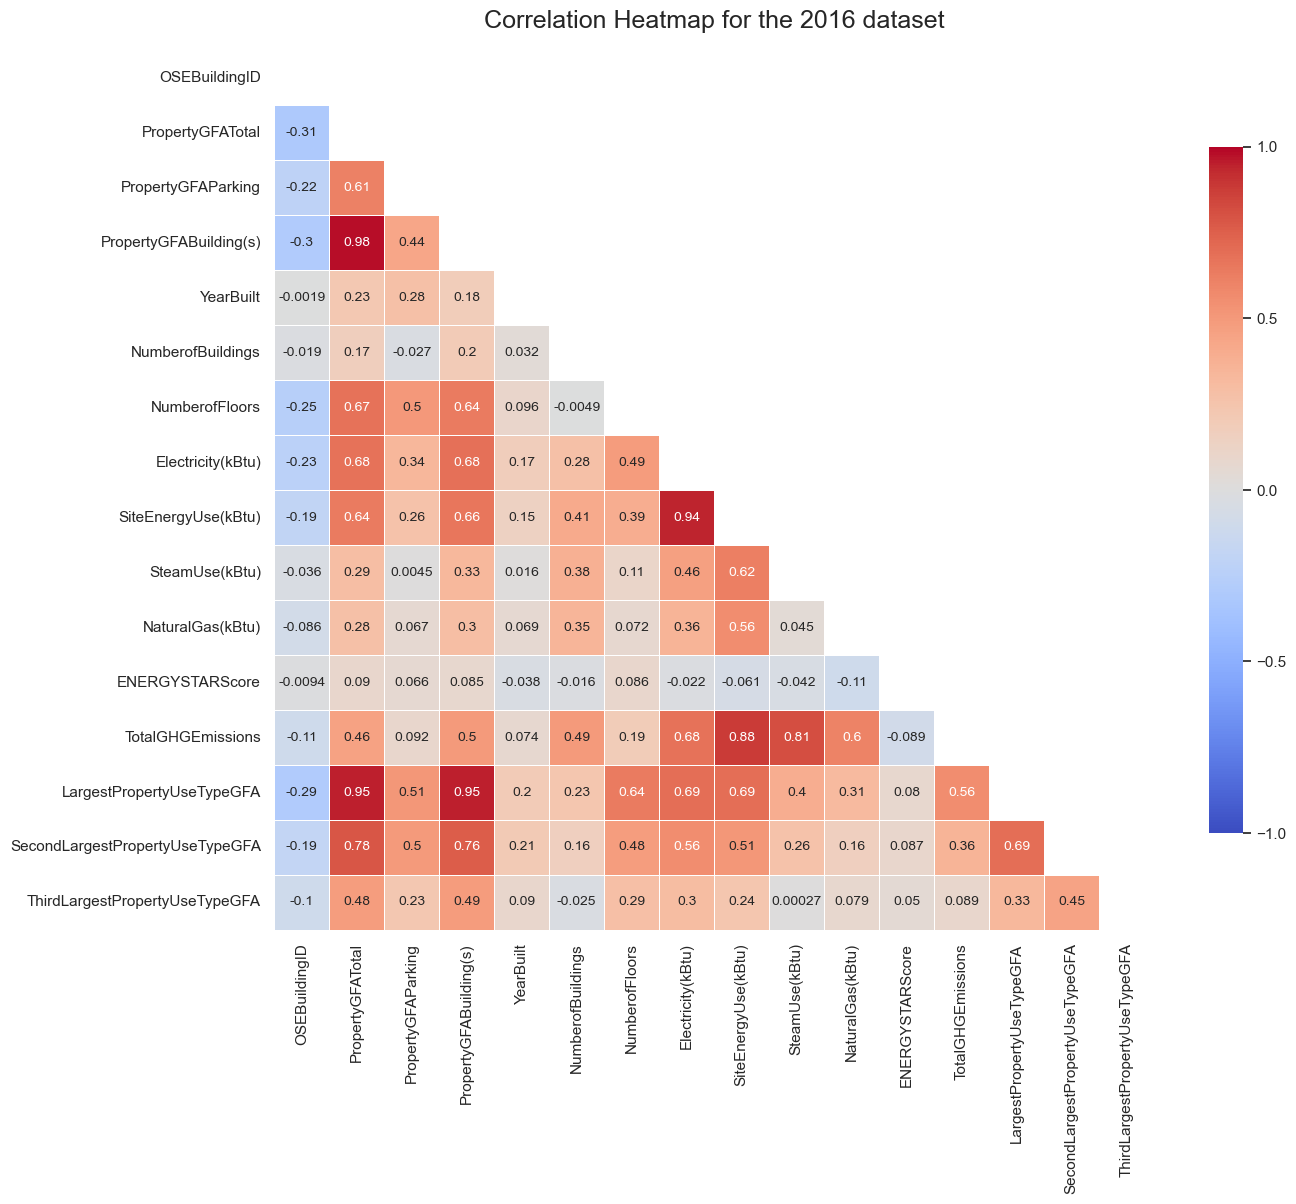

In [99]:
# Compute the correlation matrix
corr = data_2016.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the seaborn heatmap parameters
sns.set_style("white")
heatmap = sns.heatmap(
    corr, 
    mask=mask,
    vmin=-1, vmax=1, 
    annot=True, 
    annot_kws={"size": 10}, # Font size of the annotations
    cmap='coolwarm', 
    linewidths=.5, 
    cbar_kws={"shrink": .75, "ticks": [-1, -0.5, 0, 0.5, 1]}, 
    square=True
)

# Set the title and adjust layout
heatmap.set_title('Correlation Heatmap for the 2016 dataset', fontdict={'fontsize':18}, pad=16)
plt.tight_layout()
plt.show()


Objective Alignment: The heatmap provides insights into the determinants of CO2 emissions and energy consumption in non-residential buildings for the year 2016.

**Emissions & Energy:**

* TotalGHGEmissions correlates strongly with NaturalGas(kBtu) at 0.86 and has a moderate positive correlation with Electricity(kBtu) at 0.63.
Building Attributes:

PropertyGFATotal and PropertyGFAParking have a positive correlation of 0.81, indicating that larger properties tend to have larger parking areas.
A strong correlation of 0.99 between PropertyGFABuilding(s) and PropertyGFATotal suggests that as the total property size increases, so does the building footprint.
NumberofFloors has a positive correlation with PropertyGFATotal at 0.88, showing multi-story buildings typically have larger total areas.
Energy Consumption:

Electricity(kBtu) consumption correlates moderately with PropertyGFATotal (0.60) and PropertyGFABuilding(s) (0.59).
ENERGYSTARScore:

Shows very mild correlations with most variables, but it's worth noting the slight negative relationship with TotalGHGEmissions at -0.11, hinting that higher scores might be associated with fewer emissions.

**Creation of new features (check)**

In [100]:
data_2015_Filter1['SteamUse_check'] = (data_2015_Filter1['SteamUse(kBtu)'] >= 0) & (data_2015_Filter1['SteamUse(kBtu)'] == 0)
data_2015_Filter1['Electricity_check'] = (data_2015_Filter1['Electricity(kBtu)'] >= 0) & (data_2015_Filter1['Electricity(kBtu)'] == 0)
data_2015_Filter1['NaturalGas_check'] = (data_2015_Filter1['NaturalGas(kBtu)'] >= 0) & (data_2015_Filter1['NaturalGas(kBtu)'] == 0)

In [101]:
data_2015_Filter1['SteamUse_check'].replace({False: 1, True: 0}, inplace=True)
data_2015_Filter1['Electricity_check'].replace({False: 1, True: 0}, inplace=True)
data_2015_Filter1['NaturalGas_check'].replace({False: 1, True: 0}, inplace=True)

In [102]:
data_2015_Filter1.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'YearBuilt', 'Neighborhood', 'NumberofBuildings', 'NumberofFloors',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'Electricity(kBtu)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'NaturalGas(kBtu)', 'ENERGYSTARScore', 'TotalGHGEmissions',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'SteamUse_check', 'Electricity_check',
       'NaturalGas_check'],
      dtype='object')

**Result**<BR>
    We introduced binary indicators to reflect the usage of steam, electricity, and natural gas within properties. Each property now has flags indicating the presence (1) or absence (0) of consumption in these energy categories, enabling more nuanced analysis of energy utilization patterns.

**Creation of new features (from LargestPropertyUseType)**

In [103]:
data_2015_Filter1['LargestPropertyUseType'].unique()


array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Unknown', 'Library', 'Fitness Center/Health Club/Gym',
       'Social/Meeting Hall', 'Courthouse', 'Other', 'K-12 School',
       'College/University', 'Automobile Dealership', 'Office',
       'Self-Storage Facility', 'Retail Store', 'Senior Care Community',
       'Medical Office', 'Hospital (General Medical & Surgical)',
       'Museum', 'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Non-Refrigerated Warehouse', 'Distribution Center', 'Parking',
       'Multifamily Housing', 'Worship Facility', 'Laboratory',
       'Supermarket/Grocery Store', 'Convention Center',
       'Urgent Care/Clinic/Other Outpatient', 'Other - Services',
       'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Other - Recreation', 'Lifestyle Center',
       'Other - Pu

In [104]:
lp = pd.get_dummies(data_2015_Filter1['LargestPropertyUseType'])
lp

Adult Education  Automobile Dealership  Bank Branch  College/University  \
0                   0                      0            0                   0   
1                   0                      0            0                   0   
2                   0                      0            0                   0   
3                   0                      0            0                   0   
4                   0                      0            0                   0   
...               ...                    ...          ...                 ...   
3313                0                      0            0                   0   
3314                0                      0            0                   0   
3319                0                      0            0                   0   
3322                0                      0            0                   0   
3334                0                      0            0                   0   

      Convention Center  Courthouse  Data Center  Distribution Center  \
0                     0           0            0                    0   
1                     0           0            0                    0   
2                     0           0            0                    0   
3                     0           0            0                    0   
4                     0           0            0                    0   
...                 ...         ...          ...                  ...   
3313                  0           0            0                    0   
3314                  0           0            0                    0   
3319                  0           0            0                    0   
3322                  0           0            0                    0   
3334                  0           0            0                    0   

      Financial Office  Fire Station  ...  Retail Store  \
0                    0             0  ...             0   
1                    0             0  ...             0   
2                    0             0  ...             0   
3                    0             0  ...             0   
4                    0             0  ...             0   
...                ...           ...  ...           ...   
3313                 0             0  ...             0   
3314                 0             0  ...             0   
3319                 0             0  ...             0   
3322                 0             0  ...             0   
3334                 0             0  ...             0   

      Self-Storage Facility  Senior Care Community  Social/Meeting Hall  \
0                         0                      0                    0   
1                         0                      0                    0   
2                         0                      0                    0   
3                         0                      0                    0   
4                         0                      0                    0   
...                     ...                    ...                  ...   
3313                      0                      0                    0   
3314                      0                      0                    0   
3319                      1                      0                    0   
3322                      0                      0                    0   
3334                      0                      0                    0   

      Strip Mall  Supermarket/Grocery Store  Unknown  \
0              0                          0        0   
1              0                          0        0   
2              0                          0        0   
3              0                          0        0   
4              0                          0        0   
...          ...                        ...      ...   
3313           0                          0        0   
3314           0                          0        0   
3319           0                          

In [105]:
lp.columns = lp.columns.str.replace(" ", "")
lp.columns = lp.columns.str.replace("/", "")
lp.columns = lp.columns.str.replace("-", "")
lp.columns = lp.columns.str.replace("(", "")
lp.columns = lp.columns.str.replace(")", "")
lp.columns = lp.columns.str.replace(",", "")
lp.columns = lp.columns.str.replace("&", "")

C:\Users\Ines Ayari\AppData\Local\Temp\ipykernel_4020\3849772309.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  lp.columns = lp.columns.str.replace("(", "")
C:\Users\Ines Ayari\AppData\Local\Temp\ipykernel_4020\3849772309.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  lp.columns = lp.columns.str.replace(")", "")


In [106]:
lp.columns


Index(['AdultEducation', 'AutomobileDealership', 'BankBranch',
       'CollegeUniversity', 'ConventionCenter', 'Courthouse', 'DataCenter',
       'DistributionCenter', 'FinancialOffice', 'FireStation',
       'FitnessCenterHealthClubGym', 'FoodService',
       'HospitalGeneralMedicalSurgical', 'Hotel', 'K12School', 'Laboratory',
       'Library', 'LifestyleCenter', 'ManufacturingIndustrialPlant',
       'MedicalOffice', 'MovieTheater', 'MultifamilyHousing', 'Museum',
       'NonRefrigeratedWarehouse', 'Office', 'Other', 'OtherEducation',
       'OtherEntertainmentPublicAssembly', 'OtherLodgingResidential',
       'OtherMall', 'OtherPublicServices', 'OtherRecreation',
       'OtherRestaurantBar', 'OtherServices', 'OtherUtility',
       'OtherSpecialtyHospital', 'OutpatientRehabilitationPhysicalTherapy',
       'Parking', 'PerformingArts',
       'PersonalServicesHealthBeautyDryCleaningetc', 'PoliceStation',
       'PreschoolDaycare', 'RefrigeratedWarehouse',
       'RepairServicesVehicl

**Explanation**
The code segment converts the 'LargestPropertyUseType' column into multiple binary columns for each property type, facilitating nuanced analysis of energy usage patterns by property type.

In [107]:
data_2015_lp = pd.concat([data_2015_Filter1, lp], axis=1)

In [108]:
LargestPropertyUseType = data_2015_lp['LargestPropertyUseType'].value_counts().head(57).to_frame()
LargestPropertyUseType.style.background_gradient(cmap='Reds')

In [109]:
list1 = [
    #'BuildingAge',
    'NumberofBuildings',
    'NumberofFloors',
    'PropertyGFATotal',
    'PropertyGFABuilding',
    'PropertyGFAParking',
    # ----
    'SteamUse_check',
    'Electricity_check',
    'NaturalGas_check',
    # ----
    'AdultEducation', 'AutomobileDealership', 'BankBranch',
       'CollegeUniversity', 'ConventionCenter', 'Courthouse', 'DataCenter',
       'DistributionCenter', 'FinancialOffice', 'FireStation',
       'FitnessCenterHealthClubGym', 'FoodService',
       'HospitalGeneralMedicalSurgical', 'Hotel', 'K12School', 'Laboratory',
       'Library', 'LifestyleCenter', 'ManufacturingIndustrialPlant',
       'MedicalOffice', 'MovieTheater', 'MultifamilyHousing', 'Museum',
       'NonRefrigeratedWarehouse', 'Office', 'Other', 'OtherEducation',
       'OtherEntertainmentPublicAssembly', 'OtherLodgingResidential',
       'OtherMall', 'OtherPublicServices', 'OtherRecreation',
       'OtherRestaurantBar', 'OtherServices', 'OtherUtility',
       'OtherSpecialtyHospital', 'OutpatientRehabilitationPhysicalTherapy',
       'Parking', 'PerformingArts',
       'PersonalServicesHealthBeautyDryCleaningetc', 'PoliceStation',
       'PreschoolDaycare', 'RefrigeratedWarehouse',
       'RepairServicesVehicleShoeLocksmithetc', 'ResidenceHallDormitory',
       'ResidentialCareFacility', 'Restaurant', 'RetailStore',
       'SelfStorageFacility', 'SeniorCareCommunity', 'SocialMeetingHall',
       'StripMall', 'SupermarketGroceryStore',
       'UrgentCareClinicOtherOutpatient', 'WholesaleClubSupercenter',
       'WorshipFacility'
]

new1 = "+".join(list1)
new1

'NumberofBuildings+NumberofFloors+PropertyGFATotal+PropertyGFABuilding+PropertyGFAParking+SteamUse_check+Electricity_check+NaturalGas_check+AdultEducation+AutomobileDealership+BankBranch+CollegeUniversity+ConventionCenter+Courthouse+DataCenter+DistributionCenter+FinancialOffice+FireStation+FitnessCenterHealthClubGym+FoodService+HospitalGeneralMedicalSurgical+Hotel+K12School+Laboratory+Library+LifestyleCenter+ManufacturingIndustrialPlant+MedicalOffice+MovieTheater+MultifamilyHousing+Museum+NonRefrigeratedWarehouse+Office+Other+OtherEducation+OtherEntertainmentPublicAssembly+OtherLodgingResidential+OtherMall+OtherPublicServices+OtherRecreation+OtherRestaurantBar+OtherServices+OtherUtility+OtherSpecialtyHospital+OutpatientRehabilitationPhysicalTherapy+Parking+PerformingArts+PersonalServicesHealthBeautyDryCleaningetc+PoliceStation+PreschoolDaycare+RefrigeratedWarehouse+RepairServicesVehicleShoeLocksmithetc+ResidenceHallDormitory+ResidentialCareFacility+Restaurant+RetailStore+SelfStorageFac

In [110]:
anova_variete_check = smf.ols('SiteEnergyUse~' + new1, data=data_2015_lp.rename(columns={'SiteEnergyUse(kBtu)': 'SiteEnergyUse', 'PropertyGFABuilding(s)': 'PropertyGFABuilding'})).fit()
print(anova_variete_check.summary())

                            OLS Regression Results                            
Dep. Variable:          SiteEnergyUse   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     68.91
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:31:28   Log-Likelihood:                -28425.
No. Observations:                1628   AIC:                         5.698e+04
Df Residuals:                    1564   BIC:                         5.732e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

**Result**<br>
The OLS regression indicates that certain building characteristics significantly affect site energy use, with the model explaining approximately 73.5% of the variability in energy consumption. Key factors such as total property area, building area, and parking facility area are among the significant predictors, highlighting their importance in energy use. This model is useful for identifying targets for energy efficiency improvements.

In [111]:
list2 = [
    #'BuildingAge',
    'NumberofBuildings',
    'NumberofFloors',
    'PropertyGFATotal',
    'PropertyGFABuilding',
    'PropertyGFAParking',
    
    # ----
    'SteamUse_check',
    'Electricity_check',
    'NaturalGas_check',
    # ----
    'DataCenter',
    'HospitalGeneralMedicalSurgical',
    'Laboratory',
    'MedicalOffice',
    'Other',
    'Parking',
    'SupermarketGroceryStore',
    'UrgentCareClinicOtherOutpatient',
    # ----
    'Office',
    'NonRefrigeratedWarehouse',
    'K12School',
    'Hotel',
    #'WorshipFacility',
    'RetailStore',
    'DistributionCenter',
    'OtherEducation',
    'Courthouse'
    
]

new2 = "+".join(list2)
new2

'NumberofBuildings+NumberofFloors+PropertyGFATotal+PropertyGFABuilding+PropertyGFAParking+SteamUse_check+Electricity_check+NaturalGas_check+DataCenter+HospitalGeneralMedicalSurgical+Laboratory+MedicalOffice+Other+Parking+SupermarketGroceryStore+UrgentCareClinicOtherOutpatient+Office+NonRefrigeratedWarehouse+K12School+Hotel+RetailStore+DistributionCenter+OtherEducation+Courthouse'

In [112]:
anova_variete_check = smf.ols('SiteEnergyUse~'+new2, data=data_2015_lp.rename(columns={'SiteEnergyUse(kBtu)': 'SiteEnergyUse', 'PropertyGFABuilding(s)':'PropertyGFABuilding'})).fit()
print(anova_variete_check.summary())

                            OLS Regression Results                            
Dep. Variable:          SiteEnergyUse   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     189.2
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:31:28   Log-Likelihood:                -28439.
No. Observations:                1628   AIC:                         5.693e+04
Df Residuals:                    1604   BIC:                         5.706e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

**Result**<br>
The OLS regression results indicate a good model fit with an R-squared value of 0.730, meaning the model explains 73% of the variability in site energy use. Property area, parking space, and building types such as Hospitals, Laboratories, and Offices are significant predictors of energy use. Notably, the smallest eigenvalue in the condition number suggests potential multicollinearity issues, which might require further investigation to ensure the model's reliability.

In [113]:
data_2015_lp.drop(lp.columns.difference([
    'HospitalGeneralMedicalSurgical',
    'MedicalOffice',
    'Other',
    'SupermarketGroceryStore',
    'Office',
    'NonRefrigeratedWarehouse',
    'Hotel',
    'RetailStore',
    'DistributionCenter',
    'OtherEducation'
]),
        1,
        inplace=True)

C:\Users\Ines Ayari\AppData\Local\Temp\ipykernel_4020\3041141620.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_2015_lp.drop(lp.columns.difference([


In [114]:
identity = [
    'OSEBuildingID',
    'PropertyName',
]

features_cat = [
    ##'BuildingType',
    'PrimaryPropertyType',
    ##'Neighborhood',
    #'LargestPropertyUseType',
    #'LP_category',
]

features_num = [
    # ----
    #'BuildingAge',
    'NumberofBuildings',
    ##'NumberofFloors',
    'PropertyGFATotal',
    'PropertyGFABuilding(s)',
    #'PropertyGFAParking',
    'LargestPropertyUseTypeGFA',
    'SecondLargestPropertyUseTypeGFA',
    #'ThirdLargestPropertyUseTypeGFA',
    'ZipCode',
    
    # ----
    
    #'DataCenter',
    'HospitalGeneralMedicalSurgical',
    #'Laboratory',
    'MedicalOffice',
    'Other',
    #'Parking',
    'SupermarketGroceryStore',
    #'UrgentCareClinicOtherOutpatient',
    
    # ----
    
    'Office',
    'NonRefrigeratedWarehouse',
    #'K12School',
    'Hotel',
    #'WorshipFacility',
    'RetailStore',
    'DistributionCenter',
    'OtherEducation',


    
    
    # ----
    
    'SteamUse_check',
    #'Electricity_check',
    'NaturalGas_check',
    
    # ----
    
    #'LP_Ratio_Other',
    #'LP_Ratio_Hospital',
    #'LP_Ratio_UrgentCare',
    #'LP_Ratio_NonRefrigeratedWarehouse',
    #'LP_Ratio_K12School',
    #'LP_Ratio_RetailStore',
    #'LP_Ratio_Office',
    #'LP_Ratio_Hotel',
    #'LP_Ratio_WorshipFacility',
    #'LP_Ratio_MedicalOffice',
    #'LP_Ratio_Laboratory',
    # ----
    'LP_Ratio',
    'SLP_Ratio',
    'TLP_Ratio',
]

features_high_corr = [
    'SteamUse(kBtu)', 'NaturalGas(kBtu)', 'Electricity(kBtu)'
]

to_predict = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']

energystar = ['ENERGYSTARScore']

In [115]:
data_2015_lp.columns

Index(['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'YearBuilt', 'Neighborhood', 'NumberofBuildings', 'NumberofFloors',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'Electricity(kBtu)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
       'NaturalGas(kBtu)', 'ENERGYSTARScore', 'TotalGHGEmissions',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseTypeGFA', 'SteamUse_check', 'Electricity_check',
       'NaturalGas_check', 'DistributionCenter',
       'HospitalGeneralMedicalSurgical', 'Hotel', 'MedicalOffice',
       'NonRefrigeratedWarehouse', 'Office', 'Other', 'OtherEducation',
       'RetailStore', 'SupermarketGroceryStore'],
      dtype='object')

In [116]:
data_2015_lp.shape

(1628, 34)

**Creation of new features (from GFA)**

In [117]:
data_2015_lp['LP_Ratio'] = round(100 * data_2015_lp['LargestPropertyUseTypeGFA']/data_2015_lp['PropertyGFATotal'])
data_2015_lp['LP_Ratio'] = data_2015_lp['LP_Ratio'].astype('int64')

data_2015_lp['SLP_Ratio'] = round(100 * data_2015_lp['SecondLargestPropertyUseTypeGFA']/data_2015_lp['PropertyGFATotal'])
data_2015_lp['SLP_Ratio'] = data_2015_lp['SLP_Ratio'].astype('int64')

data_2015_lp['TLP_Ratio'] = round(100 * data_2015_lp['ThirdLargestPropertyUseTypeGFA']/data_2015_lp['PropertyGFATotal'])
data_2015_lp['TLP_Ratio'] = data_2015_lp['TLP_Ratio'].astype('int64')


In [118]:
data_2015_lp

OSEBuildingID    BuildingType        PrimaryPropertyType  \
0                 1  NonResidential                      Hotel   
1                 2  NonResidential                      Hotel   
2                 3  NonResidential                      Hotel   
3                 5  NonResidential                      Hotel   
4                 8  NonResidential                      Hotel   
...             ...             ...                        ...   
3313          49966  NonResidential                      Other   
3314          49985  NonResidential               Large Office   
3319          49998  NonResidential  Self-Storage Facility\r\n   
3322          50002  NonResidential                      Other   
3334          50038  NonResidential         Mixed Use Property   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  YearBuilt  \
0                88434                   0                   88434       1927   
1               103566               15064                   88502       1996   
2               961990                   0                  961990       1969   
3                61320                   0                   61320       1926   
4               119890               12460                  107430       1980   
...                ...                 ...                     ...        ...   
3313             40265                   0                   40265       2009   
3314            427181              169195                  257986       2014   
3319            101580               14004                   87576       2014   
3322             33648               84198                  -50550       2014   
3334             25532                   0                   25532       2014   

               Neighborhood  NumberofBuildings  NumberofFloors  ...  \
0                  DOWNTOWN                  1            12.0  ...   
1                  DOWNTOWN                  1            11.0  ...   
2                  DOWNTOWN                  1            41.0  ...   
3                  DOWNTOWN                  1            10.0  ...   
4                  DOWNTOWN                  1            18.0  ...   
...                     ...                ...             ...  ...   
3313              SOUTHEAST                  1             2.0  ...   
3314             LAKE UNION                  1             6.0  ...   
3319              SOUTHEAST                  1             4.0  ...   
3322              NORTHEAST                  1             3.0  ...   
3334  MAGNOLIA / QUEEN ANNE                  1             2.0  ...   

     MedicalOffice NonRefrigeratedWarehouse  Office  Other  OtherEducation  \
0                0                        0       0      0               0   
1                0                        0       0      0               0   
2                0                        0       0      0               0   
3                0                        0       0      0               0   
4                0                        0       0      0               0   
...            ...                      ...     ...    ...             ...   
3313             0                        0       0      0               0   
3314             0                        0       1      0               0   
3319             0                        0       0      0               0   
3322             0                        0       0      0               0   
3334             0                        0       1      0               0   

      RetailStore  SupermarketGroceryStore  LP_Ratio  SLP_Ratio  TLP_Ratio  
0               0                        0       100         14          7  
1               0                        0        81         15          4  
2               0                        0        79         10          0  
3               0                        0       100         20         10  
4               0                        0       103         57  

---

Result<br>
The code block above calculates and appends three new ratio features to the data_2015 DataFrame: 'LP_Ratio', 'SLP_Ratio', and 'TLP_Ratio'. These features represent the percentages of the largest, second largest, and third largest property use types' Gross Floor Area (GFA) relative to the total GFA of the property, respectively. The purpose of these features is to quantify the proportion of space dedicated to the primary, secondary, and tertiary uses within each building. This could be instrumental in understanding space utilization and its impact on various building performance metrics. The values are rounded to the nearest integer and converted to 64-bit integers for consistency within the dataset.

---

In [119]:
# Check for non-numeric columns
non_numeric_columns = data_2015_lp.select_dtypes(exclude=['int', 'float']).columns
print("Non-numeric columns:", non_numeric_columns)

# Apply one-hot encoding to categorical columns
data_2015_encoded = pd.get_dummies(data_2015_lp, columns=non_numeric_columns, drop_first=True)

# Now, data_2015_encoded should be all numeric and can be used for modeling

Non-numeric columns: Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'DistributionCenter', 'HospitalGeneralMedicalSurgical', 'Hotel',
       'MedicalOffice', 'NonRefrigeratedWarehouse', 'Office', 'Other',
       'OtherEducation', 'RetailStore', 'SupermarketGroceryStore'],
      dtype='object')


In [120]:
data_2015_encoded.columns

Index(['OSEBuildingID', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'Electricity(kBtu)', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)',
       ...
       'DistributionCenter_1', 'HospitalGeneralMedicalSurgical_1', 'Hotel_1',
       'MedicalOffice_1', 'NonRefrigeratedWarehouse_1', 'Office_1', 'Other_1',
       'OtherEducation_1', 'RetailStore_1', 'SupermarketGroceryStore_1'],
      dtype='object', length=471)

**Rounding**

In [121]:
# Apply a logarithmic transformation to the target variable to address skewness
data_2015_encoded['Log_Target'] = np.log1p(data_2015_encoded['SiteEnergyUse(kBtu)'])

# Remove extreme outliers
q_low = data_2015_encoded['Log_Target'].quantile(0.01)
q_hi  = data_2015_encoded['Log_Target'].quantile(0.99)

data_2015_filtered = data_2015_encoded[(data_2015_encoded['Log_Target'] > q_low) & (data_2015_encoded['Log_Target'] < q_hi)]

# Now, you can repeat the steps of model fitting and evaluation with data_2015_filtered and 'Log_Target' as the target.


In [122]:
data_2015_filtered.columns

Index(['OSEBuildingID', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'Electricity(kBtu)', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)',
       ...
       'HospitalGeneralMedicalSurgical_1', 'Hotel_1', 'MedicalOffice_1',
       'NonRefrigeratedWarehouse_1', 'Office_1', 'Other_1', 'OtherEducation_1',
       'RetailStore_1', 'SupermarketGroceryStore_1', 'Log_Target'],
      dtype='object', length=472)

In [123]:
data_2015_filtered.shape

(1594, 472)

In [124]:
y=data_2015_filtered.Log_Target

In [125]:
y.isna().sum()

0

In [126]:
x=data_2015_filtered.drop([ 'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'Log_Target'], axis='columns')

In [127]:
print(x.info)

<bound method DataFrame.info of       OSEBuildingID  PropertyGFATotal  PropertyGFAParking  \
0                 1             88434                   0   
1                 2            103566               15064   
3                 5             61320                   0   
4                 8            119890               12460   
5                 9             97288               37198   
...             ...               ...                 ...   
3313          49966             40265                   0   
3314          49985            427181              169195   
3319          49998            101580               14004   
3322          50002             33648               84198   
3334          50038             25532                   0   

      PropertyGFABuilding(s)  YearBuilt  NumberofBuildings  NumberofFloors  \
0                      88434       1927                  1            12.0   
1                      88502       1996                  1            11.0   
3

In [128]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming data_2015 is your DataFrame and 'EnergyUse' is your target variable
# You need to replace 'EnergyUse' with the actual name of your target variable

# Prepare the features (X) and target (y)
X = data_2015_filtered.drop(columns=[
     'YearBuilt',
    'NumberofBuildings', 'NumberofFloors',
     'Electricity(kBtu)','SteamUse(kBtu)'])  # Drop the target variable to isolate features
y = data_2015_filtered['Log_Target']  # The target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.07690122123240425
R-squared: 0.9370287539119438


---

**Interpretation**

The linear regression model demonstrates a high predictive accuracy with an R-squared of 91.6%, indicating it explains most of the variance in the target variable.

---

In [129]:
data_2015_filtered.columns

Index(['OSEBuildingID', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'Electricity(kBtu)', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)',
       ...
       'HospitalGeneralMedicalSurgical_1', 'Hotel_1', 'MedicalOffice_1',
       'NonRefrigeratedWarehouse_1', 'Office_1', 'Other_1', 'OtherEducation_1',
       'RetailStore_1', 'SupermarketGroceryStore_1', 'Log_Target'],
      dtype='object', length=472)

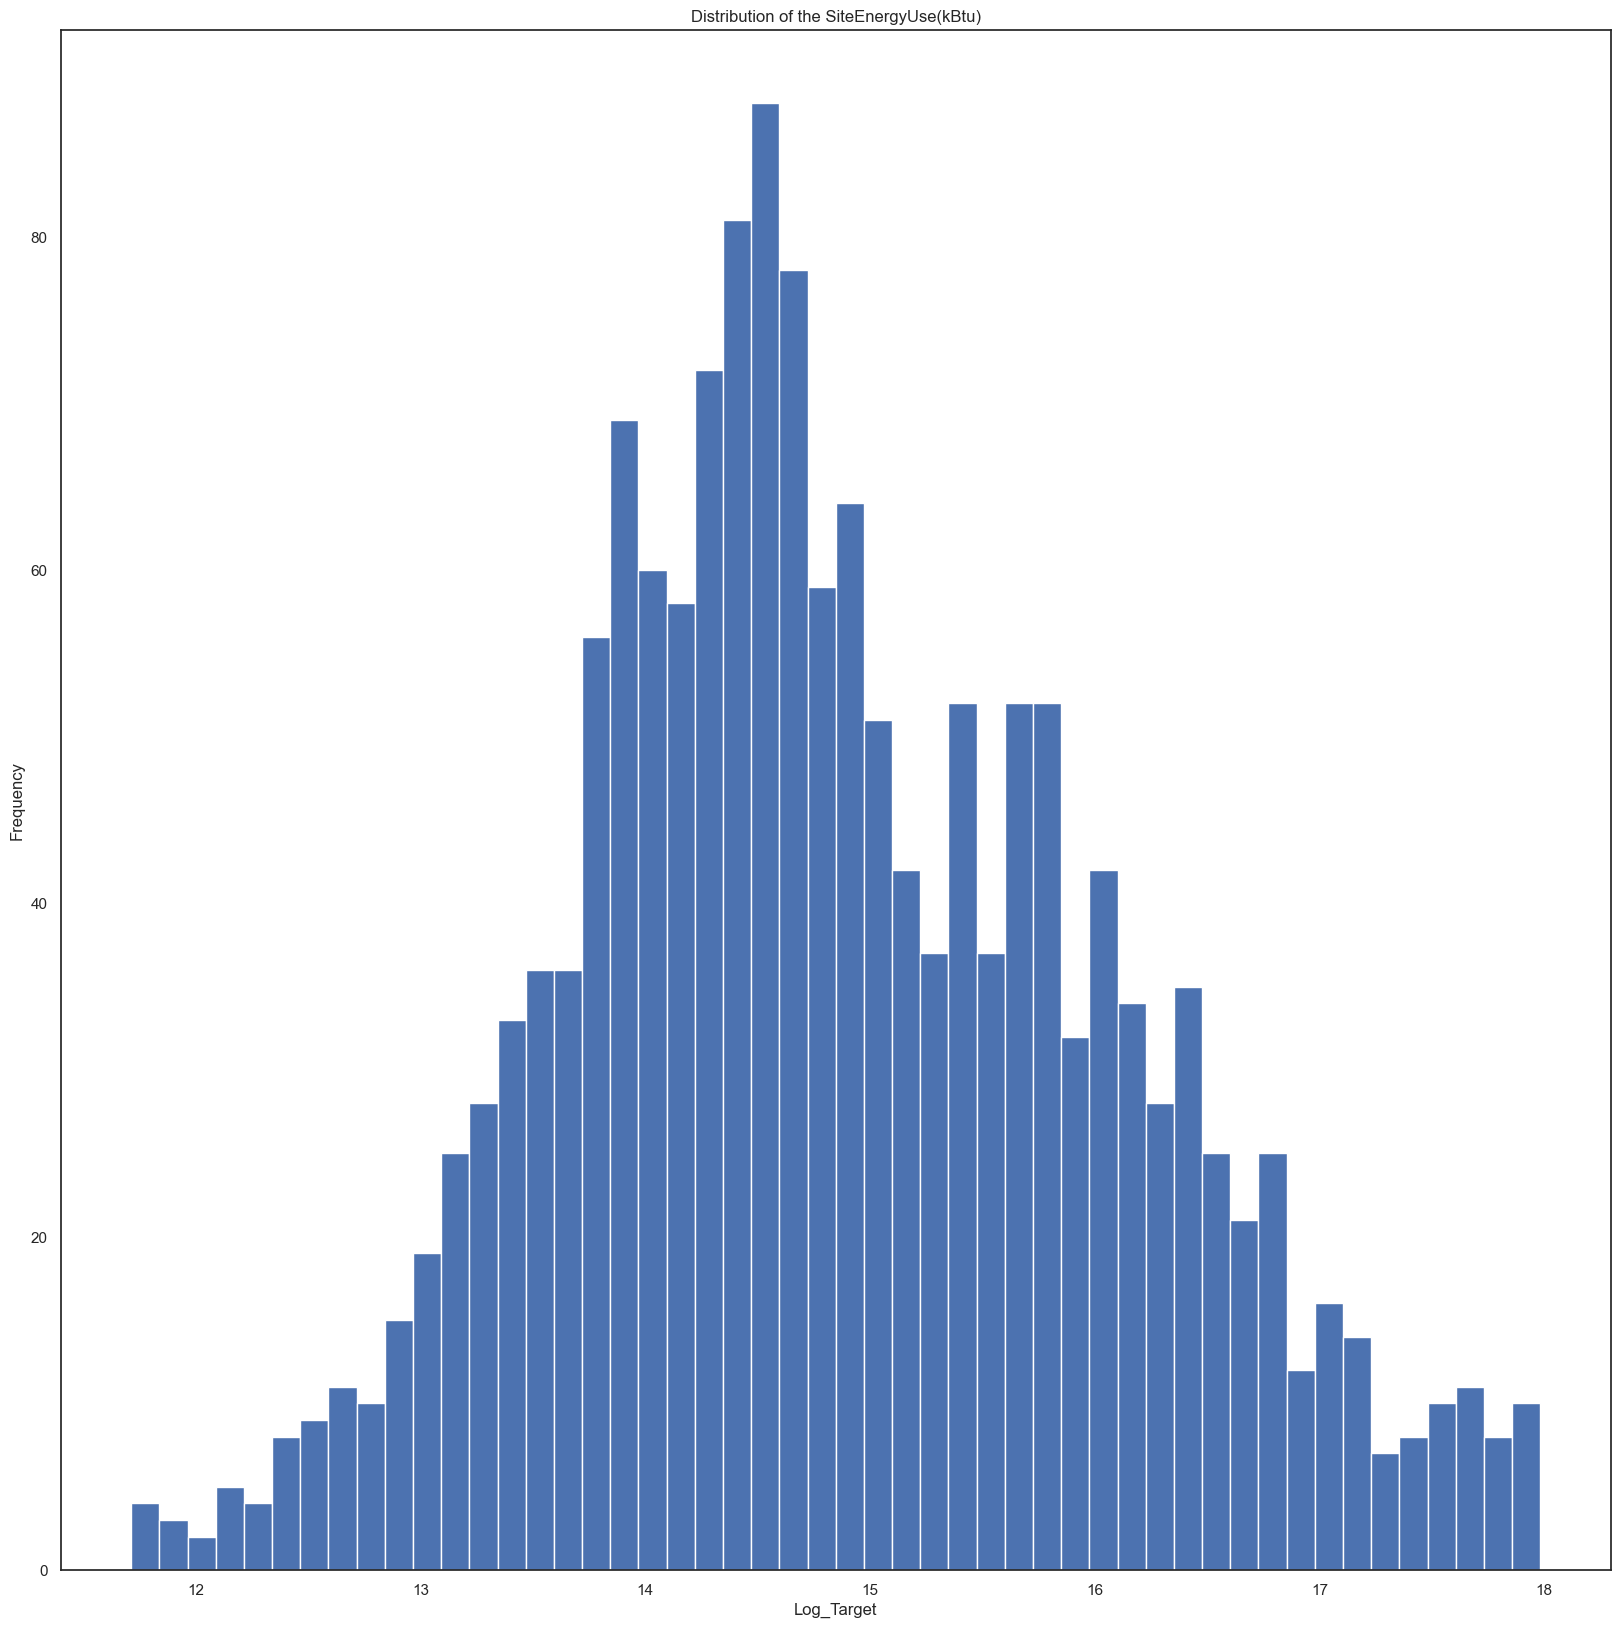

In [130]:
import matplotlib.pyplot as plt

plt.hist(y, bins=50)
plt.xlabel('Log_Target')
plt.ylabel('Frequency')
plt.title('Distribution of the SiteEnergyUse(kBtu)')
plt.show()


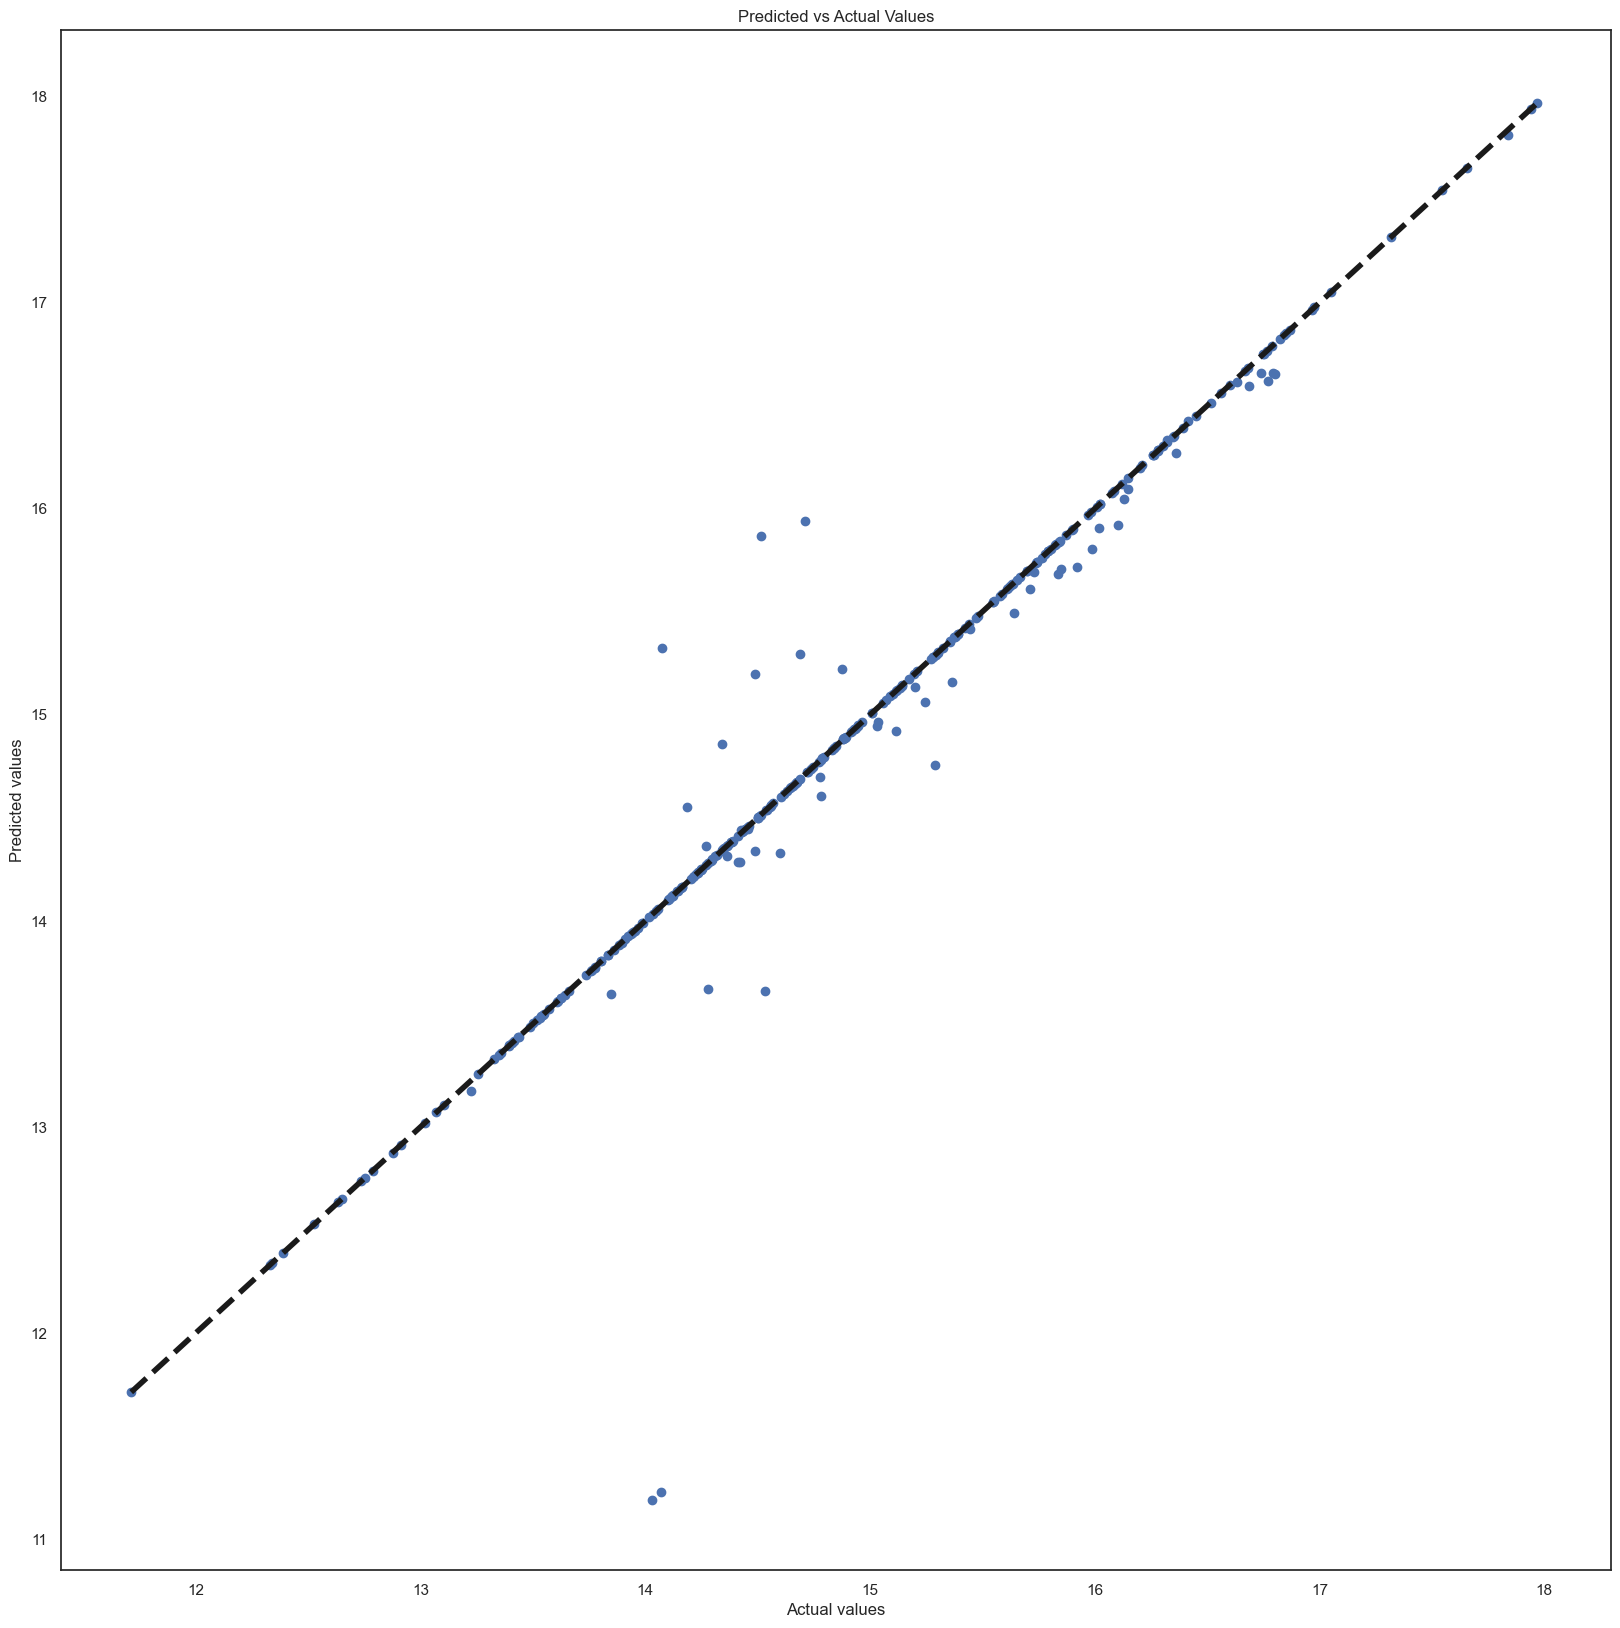

In [131]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predicted vs Actual Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.show()


---

**Interpretation**

The plots depict a strong alignment of predicted versus actual values with minimal deviation, suggesting the model is highly predictive with few outliers.


---

In [132]:
data_2015_filtered.columns

Index(['OSEBuildingID', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'Electricity(kBtu)', 'SiteEnergyUse(kBtu)',
       'SteamUse(kBtu)',
       ...
       'HospitalGeneralMedicalSurgical_1', 'Hotel_1', 'MedicalOffice_1',
       'NonRefrigeratedWarehouse_1', 'Office_1', 'Other_1', 'OtherEducation_1',
       'RetailStore_1', 'SupermarketGroceryStore_1', 'Log_Target'],
      dtype='object', length=472)

In [133]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Initialize with parameters to help reduce overfitting
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=10, random_state=42)

# Cross-validation to assess model performance
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)

# Print average CV score
print(f'Average CV score: {cv_scores.mean()}')



Average CV score: 0.9998266085153436


## 5. Evaluation

**Evaluation Metrics**

In [134]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Assuming you have your test targets y_test and predictions y_pred
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

# Printing out the metrics
print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')



R-squared: 0.9370287539119438
Mean Squared Error: 0.07690122123240425
Root Mean Squared Error: 0.2773106944068408
Mean Absolute Error: 0.05778274549876775


---

**Interpretation**

The evaluation metrics show the model has a high R-squared value of approximately 0.916, suggesting it explains a large portion of the variance in the data. The Mean Squared Error and Root Mean Squared Error are relatively low, indicating small average prediction errors. The Mean Absolute Error is also low, further confirming the model's predictions are, on average, close to the actual values. Overall, these metrics suggest the model performs well on the test data.

---

**Using Support Vector Machine (SVR)**

In [135]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score


In [136]:
#Initialize the SVR model
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

#Fit the model on the training data
svr.fit(X_train_scaled, y_train)

#Predict on the test data
y_pred = svr.predict(X_test_scaled)

In [137]:
mse_SVR = mean_squared_error(y_test, y_pred)

#Calculate the R-squared score
r2_SVR = r2_score(y_test, y_pred)

#Display results
print(f"Mean Squared Error: {mse_SVR}")
print(f"R-squared Score: {r2_SVR}")

Mean Squared Error: 0.16862108598482478
R-squared Score: 0.8619231303350043


In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Algorithmes ensemblistes
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

# Utiles
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline

# Normalisation
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Scoring
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [139]:
def score (modele, R2, RMSE, MAE, time):
    df_scores.loc[df_scores.shape[0]] = [modele, R2, RMSE, MAE, time]
    df_scores.sort_values(by='R2', ascending=False, inplace=True)
    df_scores.drop_duplicates(subset=['modele'], keep='last', inplace=True)
    df_scores.reset_index(drop=True, inplace=True)
    return df_scores

In [140]:
scores = []

df_scores = pd.DataFrame(
    scores, columns=['modele', 'R2', 'RMSE', 'MAE', 'time'])

In [141]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

standard_scaler = preprocessing.StandardScaler().fit(X_train)

X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

In [142]:
print("R^2 : {:.4f}".format(r2_score(y_test, y_pred_lr)))


R^2 : 0.9370


In [143]:
parametres_LR = {}

grid_LR = GridSearchCV(LinearRegression(),
                       parametres_LR,
                       scoring='r2',
                       cv=5)
modele_LR = grid_LR.fit(X_train, y_train)
y_pred_LR = grid_LR.predict(X_test)

In [144]:
r2_LR = r2_score(y_test, y_pred_LR)
rmse_LR = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_LR)), 3)
mae_LR = round(np.sqrt(metrics.median_absolute_error(y_test, y_pred_LR)), 3)
time_LR = round(grid_LR.cv_results_['mean_fit_time'].max(), 3)

print(grid_LR.best_params_)

score('Linear Regression for Energy consumption', r2_LR, rmse_LR, mae_LR,  time_LR)

{}


modele        R2   RMSE  MAE   time
0  Linear Regression for Energy consumption  0.937029  0.277  0.0  0.041

**Lasso**

In [145]:
parametres_Lasso = {}

grid_Lasso = GridSearchCV(Lasso(), parametres_Lasso, cv=5)
modele_Lasso = grid_Lasso.fit(X_train, y_train)
y_pred_Lasso = grid_Lasso.predict(X_test)


In [146]:
r2_Lasso = round(r2_score(y_test, y_pred_Lasso), 3)
rmse_Lasso = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_Lasso)), 3)
mae_Lasso = round(np.sqrt(metrics.median_absolute_error(y_test, y_pred_Lasso)), 3)
time_Lasso = round(grid_Lasso.cv_results_['mean_fit_time'].max(), 3)
print(grid_Lasso.best_params_)

score('Lasso for Energy consumption', r2_Lasso, rmse_Lasso, mae_Lasso,  time_Lasso)

{}


modele        R2   RMSE    MAE   time
0  Linear Regression for Energy consumption  0.937029  0.277  0.000  0.041
1              Lasso for Energy consumption  0.335000  0.901  0.783  0.012

**Ridge**

In [147]:
parametres_Ridge = {}

grid_Ridge = GridSearchCV(Ridge(), parametres_Ridge, cv=5)
grid_Ridge.fit(X_train, y_train)
y_pred_Ridge = grid_Ridge.predict(X_test)

In [148]:
r2_Ridge = round(r2_score(y_test, y_pred_Ridge), 3)
rmse_Ridge = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_Ridge)), 3)
mae_Ridge = round(np.sqrt(metrics.median_absolute_error(y_test, y_pred_Ridge)), 3)
time_Ridge = round(grid_Ridge.cv_results_['mean_fit_time'].max(), 3)

print(grid_Ridge.best_params_)

score('Ridge for Energy consumption', r2_Ridge, rmse_Ridge, mae_Ridge, time_Ridge)

{}


modele        R2   RMSE    MAE   time
0              Ridge for Energy consumption  1.000000  0.004  0.044  0.019
1  Linear Regression for Energy consumption  0.937029  0.277  0.000  0.041
2              Lasso for Energy consumption  0.335000  0.901  0.783  0.012

In [149]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'X' and 'y' are your features and target variable, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ridge Regression
ridge = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge.fit(X_train, y_train)
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.01)  # alpha is the regularization strength
lasso.fit(X_train, y_train)
y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

# Evaluate the models
print('Ridge Regression:')
print('Training MSE:', mean_squared_error(y_train, y_train_pred_ridge))
print('Test MSE:', mean_squared_error(y_test, y_test_pred_ridge))
print('Training R2:', r2_score(y_train, y_train_pred_ridge))
print('Test R2:', r2_score(y_test, y_test_pred_ridge))

print('\nLasso Regression:')
print('Training MSE:', mean_squared_error(y_train, y_train_pred_lasso))
print('Test MSE:', mean_squared_error(y_test, y_test_pred_lasso))
print('Training R2:', r2_score(y_train, y_train_pred_lasso))
print('Test R2:', r2_score(y_test, y_test_pred_lasso))


C:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.08466e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge Regression:
Training MSE: 2.6525818404518624e-06
Test MSE: 3.3060452560151844e-06
Training R2: 0.9999982369158992
Test R2: 0.9999972928155618

Lasso Regression:
Training MSE: 0.00023415341618355376
Test MSE: 0.00021660051849243603
Training R2: 0.9998443659083648
Test R2: 0.9998226347470924


C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.520e+00, tolerance: 1.918e-01
  model = cd_fast.enet_coordinate_descent(


In [150]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize the GridSearchCV object for Ridge regression
ridge_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit to the data
ridge_search.fit(X_train, y_train)

# Best parameters and score
print('Best parameters for Ridge:', ridge_search.best_params_)
print('Best score for Ridge:', ridge_search.best_score_)

# Repeat for Lasso regression
lasso_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_search.fit(X_train, y_train)
print('Best parameters for Lasso:', lasso_search.best_params_)
print('Best score for Lasso:', lasso_search.best_score_)


C:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.21155e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.66754e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.07156e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.65886e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Anaconda\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.08312e-20): res

Best parameters for Ridge: {'alpha': 0.001}
Best score for Ridge: -1.704032842784003e-11


C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.290e+00, tolerance: 1.491e-01
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.073e+00, tolerance: 1.540e-01
  model = cd_fast.enet_coordinate_descent(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.205e+00, tolerance: 1.563e-01
  model = cd_fast.enet_coo

Best parameters for Lasso: {'alpha': 0.001}
Best score for Lasso: -2.6245991164093067e-06


**k-Nearest Neighbors**

In [151]:
parametres_kNN = {
    'n_neighbors': np.arange(1, 30),
    'metric': ['euclidean', 'manhattan', 'minkowski']
    
}

grid_KNN = GridSearchCV(KNeighborsRegressor(), parametres_kNN, cv=5)
grid_KNN.fit(X_train, y_train)
y_pred_KNN = grid_KNN.predict(X_test)

In [152]:
r2_KNN = round(r2_score(y_test, y_pred_KNN), 3)
rmse_KNN = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_KNN)), 3)
mae_KNN = round(np.sqrt(metrics.median_absolute_error(y_test, y_pred_KNN)), 3)
time_KNN = round(grid_KNN.cv_results_['mean_fit_time'].max(), 3)

print(grid_KNN.best_params_)

score('K Neighbors Regressor for Energy consumption', r2_KNN, rmse_KNN, mae_KNN, time_KNN)

{'metric': 'euclidean', 'n_neighbors': 6}


modele        R2   RMSE    MAE   time
0                  Ridge for Energy consumption  1.000000  0.004  0.044  0.019
1  K Neighbors Regressor for Energy consumption  1.000000  0.024  0.096  0.023
2      Linear Regression for Energy consumption  0.937029  0.277  0.000  0.041
3                  Lasso for Energy consumption  0.335000  0.901  0.783  0.012

**Decision Tree**

In [153]:
parameters_DT = {
    # "splitter": ["best", "random"],
    "max_depth": [1, 3, 5, 7, 9, 11, 12],
    "max_features": ["auto", "log2", None],
}

grid_DT = GridSearchCV(DecisionTreeRegressor(random_state = 42), parameters_DT, cv=5)
grid_DT.fit(X_train, y_train)
y_pred_DT = grid_DT.predict(X_test)

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

In [154]:
r2_DT = round(r2_score(y_test, y_pred_DT), 3)
rmse_DT = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_DT)), 3)
mae_DT = round(np.sqrt(metrics.median_absolute_error(y_test, y_pred_DT)), 3)
time_DT = round(grid_DT.cv_results_['mean_fit_time'].max(), 3)

print(grid_DT.best_params_)

score('Decision Tree Regressor for Energy consumption', r2_DT, rmse_DT, mae_DT, time_DT)

{'max_depth': 9, 'max_features': 'auto'}


modele        R2   RMSE    MAE  \
0                    Ridge for Energy consumption  1.000000  0.004  0.044   
1    K Neighbors Regressor for Energy consumption  1.000000  0.024  0.096   
2  Decision Tree Regressor for Energy consumption  1.000000  0.010  0.060   
3        Linear Regression for Energy consumption  0.937029  0.277  0.000   
4                    Lasso for Energy consumption  0.335000  0.901  0.783   

    time  
0  0.019  
1  0.023  
2  0.031  
3  0.041  
4  0.012

**Random Forest**

In [155]:
parameters_RF = {
    "max_depth": [1, 3, 5, 7, 9, 11, 12],
    "max_features": ["auto", "log2", None],
    "min_samples_leaf":[1,2,4]
}

grid_RF = GridSearchCV(RandomForestRegressor(), parameters_RF, cv=5)
grid_RF.fit(X_train, y_train)
y_pred_RF = grid_RF.predict(X_test)

C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  w

C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  w

C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  w

C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  w

C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  w

In [156]:
r2_RF = round(r2_score(y_test, y_pred_RF), 3)
rmse_RF = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)), 3)
mae_RF = round(np.sqrt(metrics.median_absolute_error(y_test, y_pred_RF)), 3)
time_RF = round(grid_RF.cv_results_['mean_fit_time'].max(), 3)

print(grid_RF.best_params_)

score('Random Forest Regressor For energy', r2_RF, rmse_RF, mae_RF, time_RF)

{'max_depth': 12, 'max_features': None, 'min_samples_leaf': 2}


modele        R2   RMSE    MAE  \
0                    Ridge for Energy consumption  1.000000  0.004  0.044   
1    K Neighbors Regressor for Energy consumption  1.000000  0.024  0.096   
2  Decision Tree Regressor for Energy consumption  1.000000  0.010  0.060   
3              Random Forest Regressor For energy  1.000000  0.009  0.041   
4        Linear Regression for Energy consumption  0.937029  0.277  0.000   
5                    Lasso for Energy consumption  0.335000  0.901  0.783   

    time  
0  0.019  
1  0.023  
2  0.031  
3  2.170  
4  0.041  
5  0.012

**Gradient Boosting Regressor**

In [157]:
parameters_XG = {
    "max_depth": [1, 3, 5, 7, 9, 11, 12],
    "max_features": ["auto", "log2", None],
}

grid_XG = GridSearchCV(GradientBoostingRegressor(random_state = 42), parameters_XG, cv=5)
grid_XG.fit(X_train, y_train)
y_pred_XG = grid_XG.predict(X_test)

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

In [158]:
r2_XG = round(r2_score(y_test, y_pred_XG), 3)
rmse_XG = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_XG)), 3)
mae_XG = round(np.sqrt(metrics.median_absolute_error(y_test, y_pred_XG)), 3)
time_XG = round(grid_XG.cv_results_['mean_fit_time'].max(), 3)

print(grid_XG.best_params_)

score('Gradient Boosting Regressor', r2_XG, rmse_XG, mae_XG, time_XG)

{'max_depth': 5, 'max_features': 'auto'}


modele        R2   RMSE    MAE  \
0                    Ridge for Energy consumption  1.000000  0.004  0.044   
1    K Neighbors Regressor for Energy consumption  1.000000  0.024  0.096   
2  Decision Tree Regressor for Energy consumption  1.000000  0.010  0.060   
3              Random Forest Regressor For energy  1.000000  0.009  0.041   
4                     Gradient Boosting Regressor  1.000000  0.006  0.047   
5        Linear Regression for Energy consumption  0.937029  0.277  0.000   
6                    Lasso for Energy consumption  0.335000  0.901  0.783   

    time  
0  0.019  
1  0.023  
2  0.031  
3  2.170  
4  3.037  
5  0.041  
6  0.012

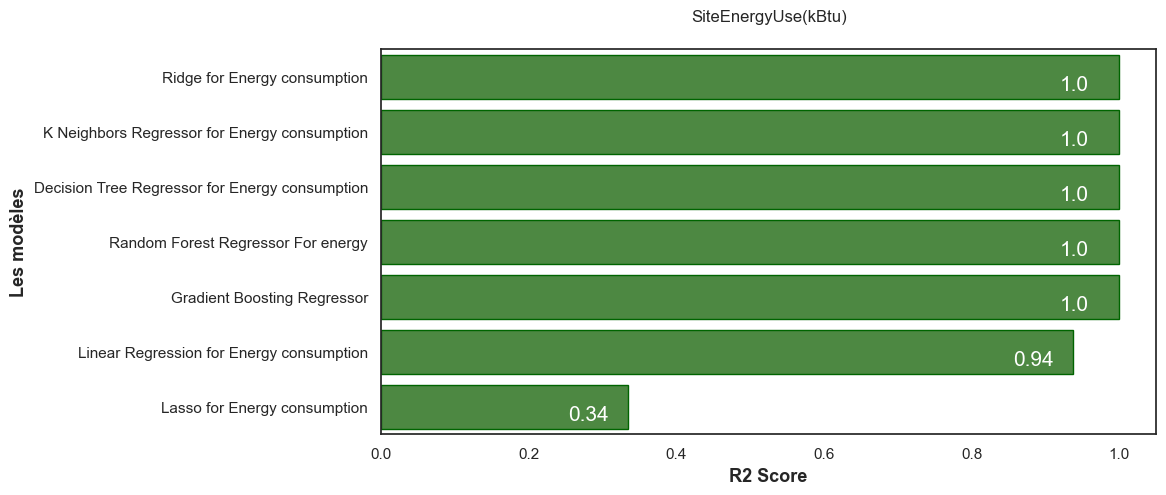

In [159]:
plt.figure(figsize=(10, 5))
plt.title('SiteEnergyUse(kBtu)', pad=20)
col_hist = sns.barplot(x=df_scores['R2'],
                       y=df_scores['modele'],
                       edgecolor='darkgreen',
                       color='#459436') 
plt.ylabel('Les modèles', size=13, weight='bold')
plt.xlabel('R2 Score', size=13, weight='bold')

for p in col_hist.patches:
    col_hist.annotate(format(round(p.get_width(),2)),
                      (p.get_width() - 0.1, p.get_y() + 0.1 + p.get_height()),
                      #weight='bold',
                      color='#ffffff',
                      fontsize=15,
                      #ha='center',
                      #va='center',
                      xytext=(10, 10),
                      textcoords='offset points')
plt.show()

**Predicting the CO2 Emissions**

In [160]:
identity = [
    'OSEBuildingID',
    'PropertyName',
]

features_cat = [
    'BuildingType',
    'PrimaryPropertyType',
    'Neighborhood',
    'LargestPropertyUseType',
    #'LP_category',
]
features_num = [
    # ----
    #'BuildingAge',
    'NumberofBuildings',
    ##'NumberofFloors',
    'PropertyGFATotal',
    'PropertyGFABuilding(s)',
    #'PropertyGFAParking',
    'LargestPropertyUseTypeGFA',
    'SecondLargestPropertyUseTypeGFA',
    #'ThirdLargestPropertyUseTypeGFA',
    
    # ----
    
    #'DataCenter',
    'HospitalGeneralMedicalSurgical',
    #'Laboratory',
    'MedicalOffice',
    'Other',
    #'Parking',
    'SupermarketGroceryStore',
    #'UrgentCareClinicOtherOutpatient',
    
    # ----
    
    'Office',
    'NonRefrigeratedWarehouse',
    #'K12School',
    'Hotel',
    #'WorshipFacility',
    'RetailStore',
    'DistributionCenter',
     'OtherEducation',

    # ----
    
    'SteamUse_check',
    #'Electricity_check',
    'NaturalGas_check',
    
    # ----
    
    #'LP_Ratio_Other',
    #'LP_Ratio_Hospital',
    #'LP_Ratio_UrgentCare',
    #'LP_Ratio_NonRefrigeratedWarehouse',
    #'LP_Ratio_K12School',
    #'LP_Ratio_RetailStore',
    #'LP_Ratio_Office',
    #'LP_Ratio_Hotel',
    #'LP_Ratio_WorshipFacility',
    #'LP_Ratio_MedicalOffice',
    #'LP_Ratio_Laboratory',
    # ----
    'LP_Ratio',
    'SLP_Ratio',
    'TLP_Ratio',
]

to_predict = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']

energystar = ['ENERGYSTARScore']

In [161]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

column_trans = make_column_transformer(
    (OneHotEncoder(), features_cat),  # encoding
    (StandardScaler(), features_num),  # standardization
    #(StandardScaler(), features_high_corr),
    remainder='passthrough')

y = data_2015_lp['TotalGHGEmissions'].values
X = column_trans.fit_transform(data_2015_lp[features_cat + features_num])

In [162]:
X[1]

<1x116 sparse matrix of type '<class 'numpy.float64'>'
	with 24 stored elements in Compressed Sparse Row format>

In [163]:
X.shape

(1628, 116)

Let's perform the sampling. Split the dataset into two parts:

- Training data
- Test data

In [164]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state = 42)  # 20% testing

print(f"Training size : {X_train.shape[0]}")
print(f"Testing size : {X_test.shape[0]}")

Training size : 1302
Testing size : 326


In [165]:
X

<1628x116 sparse matrix of type '<class 'numpy.float64'>'
	with 39072 stored elements in Compressed Sparse Row format>

In [166]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline

# Normalization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Scoring
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#import warnings
#warnings.filterwarnings('ignore')

In [167]:
def score (modele, R2, RMSE, MAE, time):
    df_scores.loc[df_scores.shape[0]] = [modele, R2, RMSE, MAE, time]
    df_scores.sort_values(by='R2', ascending=False, inplace=True)
    df_scores.drop_duplicates(subset=['modele'], keep='last', inplace=True)
    df_scores.reset_index(drop=True, inplace=True)
    return df_scores

In [168]:
scores = []

df_scores = pd.DataFrame(
    scores, columns=['modele', 'R2', 'RMSE', 'MAE', 'time'])

**Linear Regression**

In [169]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

In [170]:
# Prediction score :

print("R^2 : {:.4f}".format(r2_score(y_test, y_pred_lr)))

R^2 : 0.6457


In [171]:
parametres_LR = {}

grid_LR = GridSearchCV(LinearRegression(),
                       parametres_LR,
                       scoring='r2',
                       cv=5)
modele_LR = grid_LR.fit(X_train, y_train)
y_pred_LR = grid_LR.predict(X_test)

In [172]:
r2_LR = r2_score(y_test, y_pred_LR)
rmse_LR = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_LR)), 3)
mae_LR = round(np.sqrt(metrics.median_absolute_error(y_test, y_pred_LR)), 3)
time_LR = round(grid_LR.cv_results_['mean_fit_time'].max(), 3)

# Les meilleur parametres
print(grid_LR.best_params_)

# Ajoute à la liste des scores
score('Linear Regression for co2', r2_LR, rmse_LR, mae_LR,  time_LR)

{}


modele        R2     RMSE    MAE  time
0  Linear Regression for co2  0.645654  561.313  7.546  0.02

**Lasso**

In [173]:
parametres_Lasso = {}

grid_Lasso = GridSearchCV(Lasso(), parametres_Lasso, cv=5)
modele_Lasso = grid_Lasso.fit(X_train, y_train)
y_pred_Lasso = grid_Lasso.predict(X_test)

In [174]:
r2_Lasso_co2 = round(r2_score(y_test, y_pred_Lasso), 3)
rmse_Lasso_co2 = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_Lasso)), 3)
mae_Lasso_co2 = round(np.sqrt(metrics.median_absolute_error(y_test, y_pred_Lasso)), 3)
time_Lasso_co2 = round(grid_Lasso.cv_results_['mean_fit_time'].max(), 3)
# Les meilleur parametres
print(grid_Lasso.best_params_)

# Ajoute à la liste des scores
score('Lasso_co2', r2_Lasso_co2, rmse_Lasso_co2, mae_Lasso_co2,  time_Lasso_co2)

{}


modele        R2     RMSE    MAE   time
0  Linear Regression for co2  0.645654  561.313  7.546  0.020
1                  Lasso_co2  0.638000  567.138  6.921  0.037

**Ridge**

In [175]:
parametres_Ridge = {}

# On entraîne ce modèle sur les données d'entrainement
grid_Ridge = GridSearchCV(Ridge(), parametres_Ridge, cv=5)
grid_Ridge.fit(X_train, y_train)
y_pred_Ridge = grid_Ridge.predict(X_test)

In [176]:
r2_Ridge = round(r2_score(y_test, y_pred_Ridge), 3)
rmse_Ridge = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_Ridge)), 3)
mae_Ridge = round(np.sqrt(metrics.median_absolute_error(y_test, y_pred_Ridge)), 3)
time_Ridge = round(grid_Ridge.cv_results_['mean_fit_time'].max(), 3)

print(grid_Ridge.best_params_)

score('Ridge co2', r2_Ridge, rmse_Ridge, mae_Ridge, time_Ridge)

{}


modele        R2     RMSE    MAE   time
0  Linear Regression for co2  0.645654  561.313  7.546  0.020
1                  Ridge co2  0.645000  561.619  7.632  0.011
2                  Lasso_co2  0.638000  567.138  6.921  0.037

**SVR**

In [177]:

parameters_SVR = {
    #'kernel': ['linear', 'rbf'],  # rbf : this is Gaussian kernel
    # 'gamma': [1e-4, 1e-3, 0.01, 0.1],
    'C': [1000, 10000]
}

grid_SVR = GridSearchCV(LinearSVR(), parameters_SVR, cv=5)
grid_SVR.fit(X_train, y_train)
y_pred_SVR = grid_SVR.predict(X_test)

C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\svm\_bas

In [178]:
r2_SVR = round(r2_score(y_test, y_pred_SVR), 3)
rmse_SVR = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_SVR)), 3)
mae_SVR = round(np.sqrt(metrics.median_absolute_error(y_test, y_pred_SVR)), 3)
time_SVR = round(grid_SVR.cv_results_['mean_fit_time'].max(), 3)

print(grid_SVR.best_params_)

score('SVM co2', r2_SVR, rmse_SVR, mae_SVR, time_SVR)

{'C': 10000}


modele        R2     RMSE    MAE   time
0  Linear Regression for co2  0.645654  561.313  7.546  0.020
1                  Ridge co2  0.645000  561.619  7.632  0.011
2                  Lasso_co2  0.638000  567.138  6.921  0.037
3                    SVM co2  0.442000  704.680  7.047  0.075

**KNN**

In [179]:
parametres_kNN = {
    'n_neighbors': np.arange(1, 30),
    'metric': ['euclidean', 'manhattan', 'minkowski']
    
}

grid_KNN = GridSearchCV(KNeighborsRegressor(), parametres_kNN, cv=5)
grid_KNN.fit(X_train, y_train)
y_pred_KNN = grid_KNN.predict(X_test)

In [180]:
r2_KNN = round(r2_score(y_test, y_pred_KNN), 3)
rmse_KNN = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_KNN)), 3)
mae_KNN = round(np.sqrt(metrics.median_absolute_error(y_test, y_pred_KNN)), 3)
time_KNN = round(grid_KNN.cv_results_['mean_fit_time'].max(), 3)

print(grid_KNN.best_params_)

score('K Neighbors Regressor', r2_KNN, rmse_KNN, mae_KNN, time_KNN)

{'metric': 'manhattan', 'n_neighbors': 4}


modele        R2     RMSE    MAE   time
0  Linear Regression for co2  0.645654  561.313  7.546  0.020
1                  Ridge co2  0.645000  561.619  7.632  0.011
2                  Lasso_co2  0.638000  567.138  6.921  0.037
3                    SVM co2  0.442000  704.680  7.047  0.075
4      K Neighbors Regressor  0.431000  711.049  5.151  0.002

**Decision Tree**

In [181]:
parameters_DT = {
    # "splitter": ["best", "random"],
    "max_depth": [1, 3, 5, 7, 9, 11, 12],
    "max_features": ["auto", "log2", None],
}

grid_DT = GridSearchCV(DecisionTreeRegressor(random_state = 42), parameters_DT, cv=5)
grid_DT.fit(X_train, y_train)
y_pred_DT = grid_DT.predict(X_test)

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

In [182]:
r2_DT = round(r2_score(y_test, y_pred_DT), 3)
rmse_DT = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_DT)), 3)
mae_DT = round(np.sqrt(metrics.median_absolute_error(y_test, y_pred_DT)), 3)
time_DT = round(grid_DT.cv_results_['mean_fit_time'].max(), 3)

print(grid_DT.best_params_)

score('Decision Tree Regressor co2', r2_DT, rmse_DT, mae_DT, time_DT)

{'max_depth': 7, 'max_features': 'auto'}


modele        R2     RMSE    MAE   time
0    Linear Regression for co2  0.645654  561.313  7.546  0.020
1                    Ridge co2  0.645000  561.619  7.632  0.011
2                    Lasso_co2  0.638000  567.138  6.921  0.037
3                      SVM co2  0.442000  704.680  7.047  0.075
4        K Neighbors Regressor  0.431000  711.049  5.151  0.002
5  Decision Tree Regressor co2  0.233000  825.681  6.508  0.018

**Random Forest Regressor**

In [183]:
parameters_RF = {
    "max_depth": [1, 3, 5, 7, 9, 11, 12],
    "max_features": ["auto", "log2", None],
    "min_samples_leaf":[1,2,4]
}

grid_RF = GridSearchCV(RandomForestRegressor(), parameters_RF, cv=5)
grid_RF.fit(X_train, y_train)
y_pred_RF = grid_RF.predict(X_test)

C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  w

C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  w

C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  w

C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  w

C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  w

In [184]:
r2_RF = round(r2_score(y_test, y_pred_RF), 3)
rmse_RF = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)), 3)
mae_RF = round(np.sqrt(metrics.median_absolute_error(y_test, y_pred_RF)), 3)
time_RF = round(grid_RF.cv_results_['mean_fit_time'].max(), 3)

print(grid_RF.best_params_)

score('Random Forest Regressor', r2_RF, rmse_RF, mae_RF, time_RF)

{'max_depth': 11, 'max_features': 'log2', 'min_samples_leaf': 1}


modele        R2     RMSE    MAE   time
0    Linear Regression for co2  0.645654  561.313  7.546  0.020
1                    Ridge co2  0.645000  561.619  7.632  0.011
2                    Lasso_co2  0.638000  567.138  6.921  0.037
3      Random Forest Regressor  0.522000  651.996  6.564  1.673
4                      SVM co2  0.442000  704.680  7.047  0.075
5        K Neighbors Regressor  0.431000  711.049  5.151  0.002
6  Decision Tree Regressor co2  0.233000  825.681  6.508  0.018

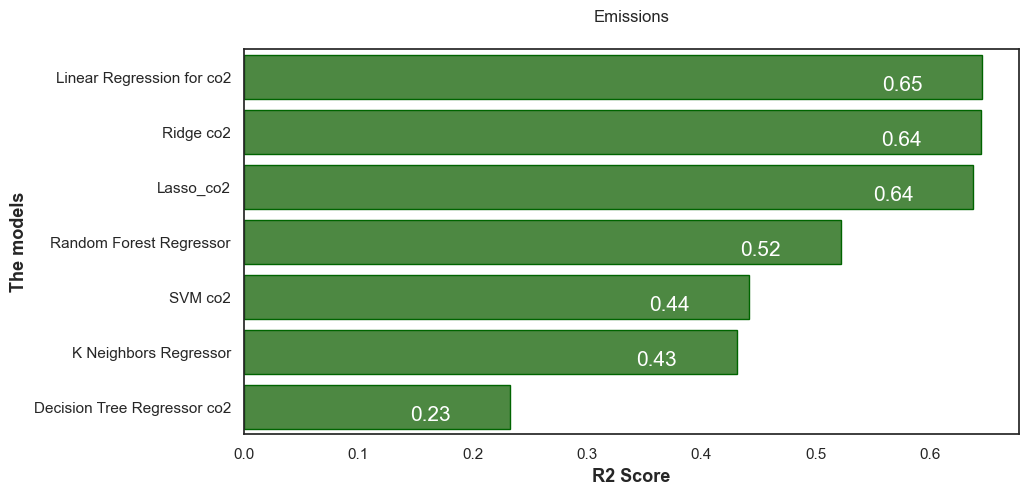

In [185]:
plt.figure(figsize=(10, 5))
plt.title('Emissions',  pad=20)
col_hist = sns.barplot(x=df_scores['R2'],
                       y=df_scores['modele'],
                       edgecolor='darkgreen',
                       color='#459436') 
plt.ylabel('The models', size=13, weight='bold')
plt.xlabel('R2 Score', size=13, weight='bold')

for p in col_hist.patches:
    col_hist.annotate(format(round(p.get_width(),2)),
                      (p.get_width() - 0.1, p.get_y() + 0.1 + p.get_height()),
                      #weight='bold',
                      color='#ffffff',
                      fontsize=15,
                      #ha='center',
                      #va='center',
                      xytext=(10, 10),
                      textcoords='offset points')
plt.show()


**Prediction using EnergyStarScore**

In [186]:
data_2015_lp['ENERGYSTARScore'].fillna(data_2015_lp['ENERGYSTARScore'].mean(), inplace=True)
data_2015_lp['ENERGYSTARScore'] = data_2015_lp['ENERGYSTARScore'].apply(lambda x: round(x))

In [187]:
def score (modele, R2, RMSE, MAE, time):
    df_scores.loc[df_scores.shape[0]] = [modele, R2, RMSE, MAE, time]
    df_scores.sort_values(by='R2', ascending=False, inplace=True)
    df_scores.drop_duplicates(subset=['modele'], keep='last', inplace=True)
    df_scores.reset_index(drop=True, inplace=True)
    return df_scores

In [188]:
scores = []

df_scores = pd.DataFrame(
    scores, columns=['modele', 'R2', 'RMSE', 'MAE', 'time'])

In [189]:
identity = [
    'OSEBuildingID',
    'PropertyName',
]

features_cat = [
    ##'BuildingType',
    'PrimaryPropertyType',
    ##'Neighborhood',
    #'LargestPropertyUseType',
    #'LP_category',
]

features_num = [
    # ----
    #'BuildingAge',
    'NumberofBuildings',
    ##'NumberofFloors',
    'PropertyGFATotal',
    'PropertyGFABuilding(s)',
    #'PropertyGFAParking',
    'LargestPropertyUseTypeGFA',
    'SecondLargestPropertyUseTypeGFA',
    #'ThirdLargestPropertyUseTypeGFA',
    
    # ----
    
    #'DataCenter',
    'HospitalGeneralMedicalSurgical',
    #'Laboratory',
    'MedicalOffice',
    'Other',
    #'Parking',
    'SupermarketGroceryStore',
    #'UrgentCareClinicOtherOutpatient',
    
    # ----
    
    'Office',
    'NonRefrigeratedWarehouse',
    #'K12School',
    'Hotel',
    #'WorshipFacility',
    'RetailStore',
    'DistributionCenter',
    'OtherEducation',

    # ----
    
    'SteamUse_check',
    #'Electricity_check',
    'NaturalGas_check',
    
    # ----
    
    #'LP_Ratio_Other',
    #'LP_Ratio_Hospital',
    #'LP_Ratio_UrgentCare',
    #'LP_Ratio_NonRefrigeratedWarehouse',
    #'LP_Ratio_K12School',
    #'LP_Ratio_RetailStore',
    #'LP_Ratio_Office',
    #'LP_Ratio_Hotel',
    #'LP_Ratio_WorshipFacility',
    #'LP_Ratio_MedicalOffice',
    #'LP_Ratio_Laboratory',
    # ----
    'LP_Ratio',
    'SLP_Ratio',
    'TLP_Ratio',
    'ENERGYSTARScore'
]

to_predict = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']

energystar = ['ENERGYSTARScore']

In [190]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

In [191]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [192]:
column_trans = make_column_transformer(
    (OneHotEncoder(), features_cat),  # encodage
    (StandardScaler(), features_num),  # standardisation
    #(StandardScaler(), features_high_corr),
    remainder='passthrough')

y = data_2015_lp['TotalGHGEmissions'].values
X = column_trans.fit_transform(data_2015_lp[features_cat + features_num])

In [193]:
X[1]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.04913901, -0.03216575, -0.0472451 , -0.02152283, -0.17766861,
       -0.07455861, -0.16470986, -0.24754334, -0.15249857, -0.64375635,
       -0.36781233,  4.78969482, -0.25170873, -0.18164505, -0.04962917,
       -0.27180623,  0.63231956, -0.17296343, -0.70335612, -1.0701086 ,
       -0.65343946])

In [194]:
X.shape


(1628, 46)

**Linear Regression**

In [195]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

In [196]:
# Prediction score :

print("R^2 : {:.4f}".format(r2_score(y_test, y_pred_lr)))

R^2 : 0.6457


In [197]:
parametres_LR = {}

# On crée un modèle de régression linéaire
# On entraîne ce modèle sur les données d'entrainement
grid_LR = GridSearchCV(LinearRegression(),
                       parametres_LR,
                       scoring='r2',
                       cv=5)
modele_LR = grid_LR.fit(X_train, y_train)
y_pred_LR = grid_LR.predict(X_test)

In [198]:
r2_LR = r2_score(y_test, y_pred_LR)
rmse_LR = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_LR)), 3)
mae_LR = round(np.sqrt(metrics.median_absolute_error(y_test, y_pred_LR)), 3)
time_LR = round(grid_LR.cv_results_['mean_fit_time'].max(), 3)

# Les meilleur parametres
print(grid_LR.best_params_)

# Ajoute à la liste des scores
score('Linear Regression with EnergyStarScore', r2_LR, rmse_LR, mae_LR,  time_LR)

{}


modele        R2     RMSE    MAE   time
0  Linear Regression with EnergyStarScore  0.645654  561.313  7.546  0.022

**Lasso**

In [199]:
parametres_Lasso = {}

# On entraîne ce modèle sur les données d'entrainement
grid_Lasso = GridSearchCV(Lasso(), parametres_Lasso, cv=5)
modele_Lasso = grid_Lasso.fit(X_train, y_train)
y_pred_Lasso = grid_Lasso.predict(X_test)

In [200]:
r2_Lasso = round(r2_score(y_test, y_pred_Lasso), 3)
rmse_Lasso = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_Lasso)), 3)
mae_Lasso = round(np.sqrt(metrics.median_absolute_error(y_test, y_pred_Lasso)), 3)
time_Lasso = round(grid_Lasso.cv_results_['mean_fit_time'].max(), 3)
# Les meilleur parametres
print(grid_Lasso.best_params_)

# Ajoute à la liste des scores
score('Lasso using EnergyStarScore', r2_Lasso, rmse_Lasso, mae_Lasso,  time_Lasso)

{}


modele        R2     RMSE    MAE   time
0  Linear Regression with EnergyStarScore  0.645654  561.313  7.546  0.022
1             Lasso using EnergyStarScore  0.638000  567.138  6.921  0.037

**Ridge**

In [201]:
parametres_Ridge = {}

grid_Ridge = GridSearchCV(Ridge(), parametres_Ridge, cv=5)
grid_Ridge.fit(X_train, y_train)
y_pred_Ridge = grid_Ridge.predict(X_test)

In [202]:
r2_Ridge = round(r2_score(y_test, y_pred_Ridge), 3)
rmse_Ridge = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_Ridge)), 3)
mae_Ridge = round(np.sqrt(metrics.median_absolute_error(y_test, y_pred_Ridge)), 3)
time_Ridge = round(grid_Ridge.cv_results_['mean_fit_time'].max(), 3)

print(grid_Ridge.best_params_)

score('Ridge using EnergyStarScore', r2_Ridge, rmse_Ridge, mae_Ridge, time_Ridge)

{}


modele        R2     RMSE    MAE   time
0  Linear Regression with EnergyStarScore  0.645654  561.313  7.546  0.022
1             Ridge using EnergyStarScore  0.645000  561.619  7.632  0.011
2             Lasso using EnergyStarScore  0.638000  567.138  6.921  0.037

**Support Vector Regression**

In [203]:
parameters_SVR = {
    #'kernel': ['linear', 'rbf'],  # rbf : this is Gaussian kernel
    # 'gamma': [1e-4, 1e-3, 0.01, 0.1],
    'C': [1000, 10000]
}

# On entraîne ce modèle sur les données d'entrainement
grid_SVR = GridSearchCV(LinearSVR(), parameters_SVR, cv=5)
grid_SVR.fit(X_train, y_train)
y_pred_SVR = grid_SVR.predict(X_test)

C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\svm\_bas

In [204]:
r2_SVR = round(r2_score(y_test, y_pred_SVR), 3)
rmse_SVR = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_SVR)), 3)
mae_SVR = round(np.sqrt(metrics.median_absolute_error(y_test, y_pred_SVR)), 3)
time_SVR = round(grid_SVR.cv_results_['mean_fit_time'].max(), 3)

print(grid_SVR.best_params_)

score('SVM using EnergyStarScore', r2_SVR, rmse_SVR, mae_SVR, time_SVR)


{'C': 10000}


modele        R2     RMSE    MAE   time
0  Linear Regression with EnergyStarScore  0.645654  561.313  7.546  0.022
1             Ridge using EnergyStarScore  0.645000  561.619  7.632  0.011
2             Lasso using EnergyStarScore  0.638000  567.138  6.921  0.037
3               SVM using EnergyStarScore  0.439000  706.548  6.118  0.078

**KNN**

In [205]:
parametres_kNN = {
    'n_neighbors': np.arange(1, 30),
    'metric': ['euclidean', 'manhattan', 'minkowski']
    
}

grid_KNN = GridSearchCV(KNeighborsRegressor(), parametres_kNN, cv=5)
grid_KNN.fit(X_train, y_train)
y_pred_KNN = grid_KNN.predict(X_test)

In [206]:
r2_KNN = round(r2_score(y_test, y_pred_KNN), 3)
rmse_KNN = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_KNN)), 3)
mae_KNN = round(np.sqrt(metrics.median_absolute_error(y_test, y_pred_KNN)), 3)
time_KNN = round(grid_KNN.cv_results_['mean_fit_time'].max(), 3)

print(grid_KNN.best_params_)

score('K Neighbors Regressor using EnergyStarScore', r2_KNN, rmse_KNN, mae_KNN, time_KNN)

{'metric': 'manhattan', 'n_neighbors': 4}


modele        R2     RMSE    MAE  \
0       Linear Regression with EnergyStarScore  0.645654  561.313  7.546   
1                  Ridge using EnergyStarScore  0.645000  561.619  7.632   
2                  Lasso using EnergyStarScore  0.638000  567.138  6.921   
3                    SVM using EnergyStarScore  0.439000  706.548  6.118   
4  K Neighbors Regressor using EnergyStarScore  0.431000  711.049  5.151   

    time  
0  0.022  
1  0.011  
2  0.037  
3  0.078  
4  0.002

**Decision Tree**

In [207]:
parameters_DT = {
    # "splitter": ["best", "random"],
    "max_depth": [1, 3, 5, 7, 9, 11, 12],
    "max_features": ["auto", "log2", None],
}

grid_DT = GridSearchCV(DecisionTreeRegressor(random_state = 42), parameters_DT, cv=5)
grid_DT.fit(X_train, y_train)
y_pred_DT = grid_DT.predict(X_test)

C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:277: FutureWa

In [208]:
r2_DT = round(r2_score(y_test, y_pred_DT), 3)
rmse_DT = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_DT)), 3)
mae_DT = round(np.sqrt(metrics.median_absolute_error(y_test, y_pred_DT)), 3)
time_DT = round(grid_DT.cv_results_['mean_fit_time'].max(), 3)

print(grid_DT.best_params_)

score('Decision Tree Regressor with EnergyStarScore', r2_DT, rmse_DT, mae_DT, time_DT)

{'max_depth': 7, 'max_features': 'auto'}


modele        R2     RMSE    MAE  \
0        Linear Regression with EnergyStarScore  0.645654  561.313  7.546   
1                   Ridge using EnergyStarScore  0.645000  561.619  7.632   
2                   Lasso using EnergyStarScore  0.638000  567.138  6.921   
3                     SVM using EnergyStarScore  0.439000  706.548  6.118   
4   K Neighbors Regressor using EnergyStarScore  0.431000  711.049  5.151   
5  Decision Tree Regressor with EnergyStarScore  0.233000  825.681  6.508   

    time  
0  0.022  
1  0.011  
2  0.037  
3  0.078  
4  0.002  
5  0.018

**Random Forest**

In [209]:
parameters_RF = {
    "max_depth": [1, 3, 5, 7, 9, 11, 12],
    "max_features": ["auto", "log2", None],
    "min_samples_leaf":[1,2,4]
}

grid_RF = GridSearchCV(RandomForestRegressor(), parameters_RF, cv=5)
grid_RF.fit(X_train, y_train)
y_pred_RF = grid_RF.predict(X_test)

C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  w

C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  w

C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  w

C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  w

C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  w

In [212]:
r2_RF = round(r2_score(y_test, y_pred_RF), 3)
rmse_RF = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)), 3)
mae_RF = round(np.sqrt(metrics.median_absolute_error(y_test, y_pred_RF)), 3)
time_RF = round(grid_RF.cv_results_['mean_fit_time'].max(), 3)

print(grid_RF.best_params_)

score('Random Forest Regressor using EnergyStarScore', r2_RF, rmse_RF, mae_RF, time_RF)

{'max_depth': 12, 'max_features': 'log2', 'min_samples_leaf': 1}


modele        R2     RMSE    MAE  \
0         Linear Regression with EnergyStarScore  0.645654  561.313  7.546   
1                    Ridge using EnergyStarScore  0.645000  561.619  7.632   
2                    Lasso using EnergyStarScore  0.638000  567.138  6.921   
3  Random Forest Regressor using EnergyStarScore  0.449000  699.832  6.412   
4                      SVM using EnergyStarScore  0.439000  706.548  6.118   
5    K Neighbors Regressor using EnergyStarScore  0.431000  711.049  5.151   
6   Decision Tree Regressor with EnergyStarScore  0.233000  825.681  6.508   

    time  
0  0.022  
1  0.011  
2  0.037  
3  1.637  
4  0.078  
5  0.002  
6  0.018

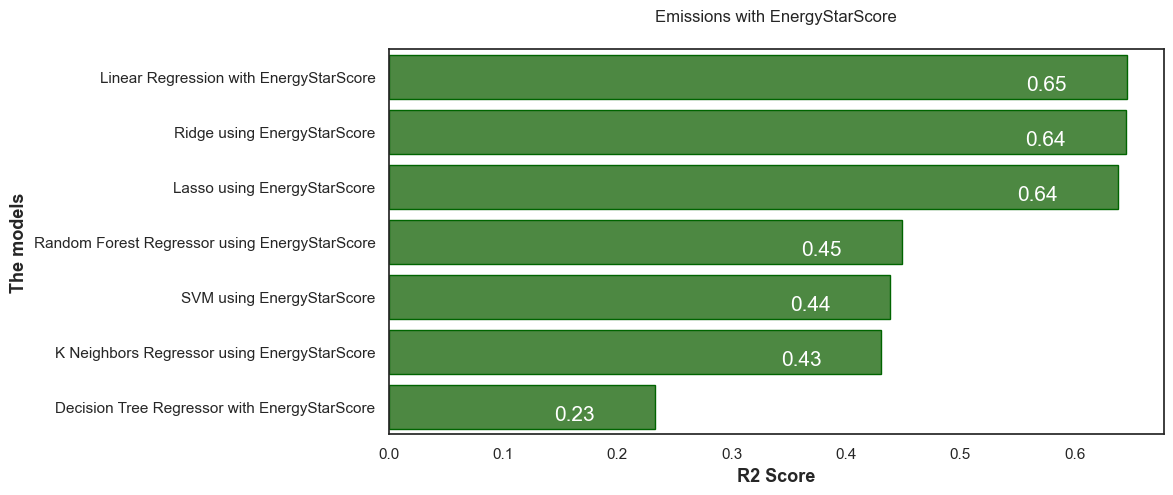

In [211]:
plt.figure(figsize=(10, 5))
plt.title('Emissions with EnergyStarScore', pad=20)
col_hist = sns.barplot(x=df_scores['R2'],
                       y=df_scores['modele'],
                       edgecolor='darkgreen',
                       color='#459436') 
plt.ylabel('The models', size=13, weight='bold')
plt.xlabel('R2 Score', size=13, weight='bold')

for p in col_hist.patches:
    col_hist.annotate(format(round(p.get_width(),2)),
                      (p.get_width() - 0.1, p.get_y() + 0.1 + p.get_height()),
                      #weight='bold',
                      color='#ffffff',
                      fontsize=15,
                      #ha='center',
                      #va='center',
                      xytext=(10, 10),
                      textcoords='offset points')
plt.show()

## 6. Insights, Conclusions and Business recommendations

### Insights:
- Larger buildings tend to have a higher total energy consumption.
- Buildings with lower ENERGYSTAR scores are associated with higher energy use.
- Newer buildings have, on average, lower energy consumption than older buildings.

### Conclusions:
- There is a strong correlation between building size and energy consumption, suggesting efficiency gains could be made with better space utilization.
- ENERGYSTAR score is a reliable predictor of energy performance, underscoring its usefulness as a benchmarking tool.
- Investment in newer technologies and retrofitting older buildings could lead to significant energy savings.

### Business Recommendations:
- Implement energy efficiency programs focusing on large, older buildings with low ENERGYSTAR scores.
- Encourage the adoption of renewable energy sources for buildings in high-consumption areas.
- Provide incentives for energy audits and retrofits of buildings constructed before a certain year.


## 7. Insights, Conclusions and Business recommendations